# Experiment 01: Influence of number of centers

In [1]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

## Loading data 2D

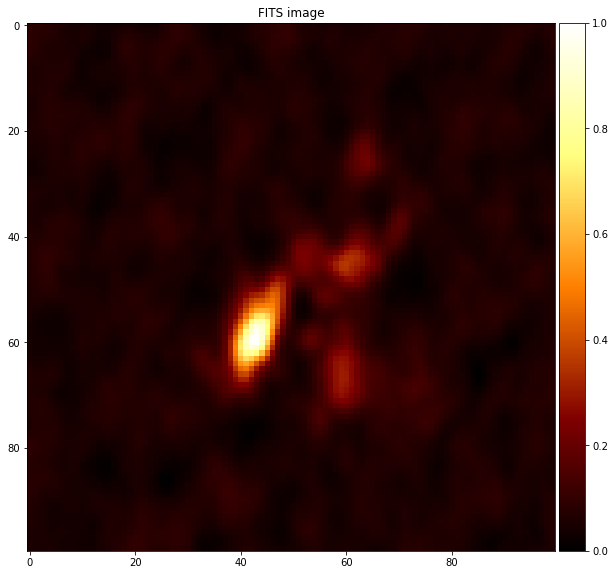

In [2]:
"""
Loading data
"""

fits_path = '../data/images/Orion.cont.image.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

In [3]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

/home/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)
Widget Javascript not detected.  It may not be installed or enabled properly.


<function graph.thresholded_image_plot>

In [4]:
# max and min sigma allowed
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

method = 1
elm_list = list()

for Nc in range(50, 501, 25):
    # number of points of each type
    Nb = int(0.2*Nc)
    Ne = 4*Nc - Nb
    
    if method==1:
        # points generation
        center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
        collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
        boundary_points = boundary_points_generation(data, base_level, Nb)
        
    elif method==2:    
        # points generation
        points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
        center_points = points[0:Nc]
        collocation_points = points[0:Ne]
        boundary_points = boundary_points_generation(data, base_level, Nb)
    
    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]
    
#    # visualizing the choosen points
#    points_plot(data, center_points=center_points, title="Center Points")
#    points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


#    solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#    params_plot(c0, sig0, xc, yc)
#    params_distribution_plot(c0, sig0)
    elm_list.append(ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0., b=0., d1psi1=d1psi, 
                    d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1., minsig=minsig, maxsig=maxsig))

##########################################################################################
Processing 50 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 20100.
nfev: 20112

Residual stats:
Residual RMS: 0.024098777171579343
Residual Variance: 0.0005807243297827195
Flux Lost: 0.039937199148213774
Flux Addition: 0.03917201491960358
psi1(u-f): 0.150112967685046
Exceeded Pixels: 474
Sharpness: 42.84271494549538
psi2(grad u): 3.638291100764372
Total elapsed time: 6.304420471191406 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.18338810475773748
Mean min distance between collocation and center points

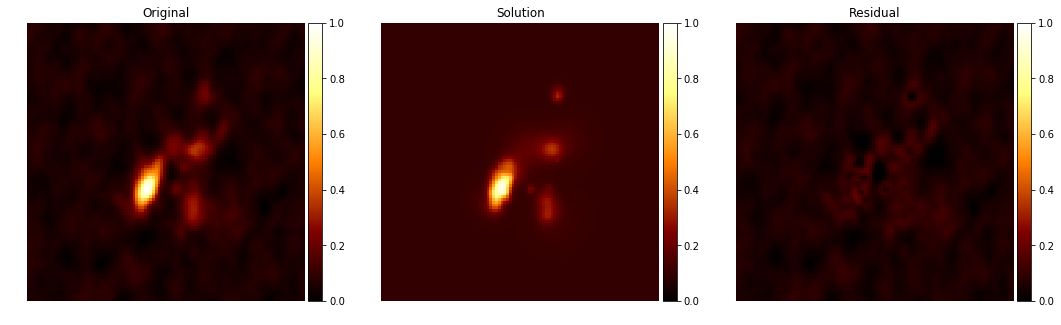

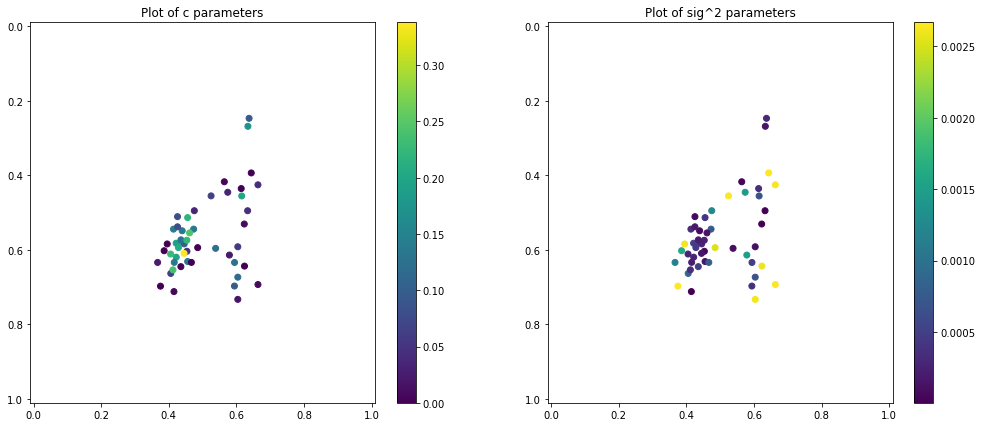

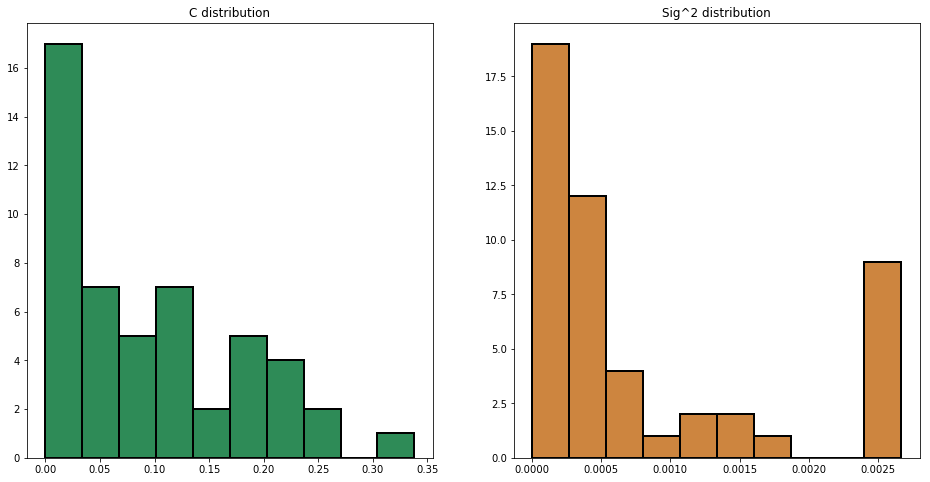

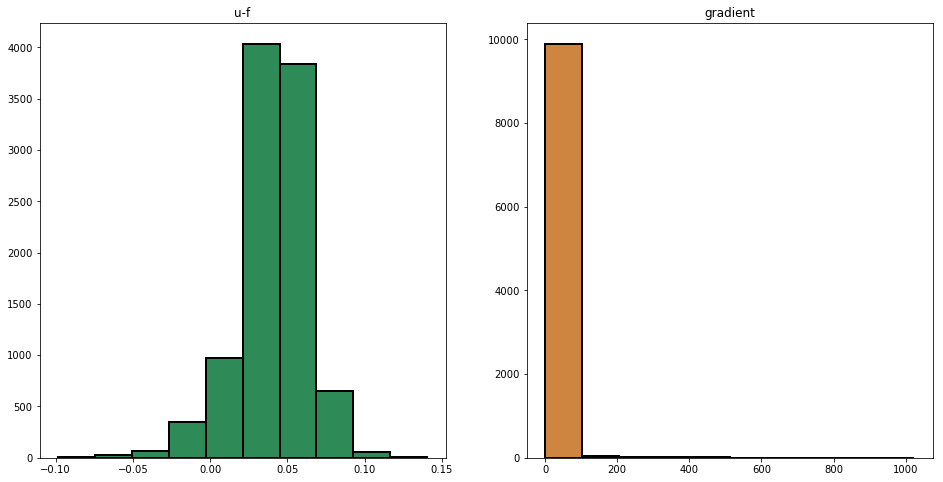

##########################################################################################
Processing 75 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 30100.
nfev: 30112

Residual stats:
Residual RMS: 0.010732365379232752
Residual Variance: 0.00011513035909316935
Flux Lost: 0.01938701214579542
Flux Addition: 0.01830645032241159
psi1(u-f): 0.012430079301769916
Exceeded Pixels: 489
Sharpness: 45.115440392688704
psi2(grad u): 3.8947655401322425
Total elapsed time: 13.906591176986694 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2122188563513982
Mean min distance between collocation and center p

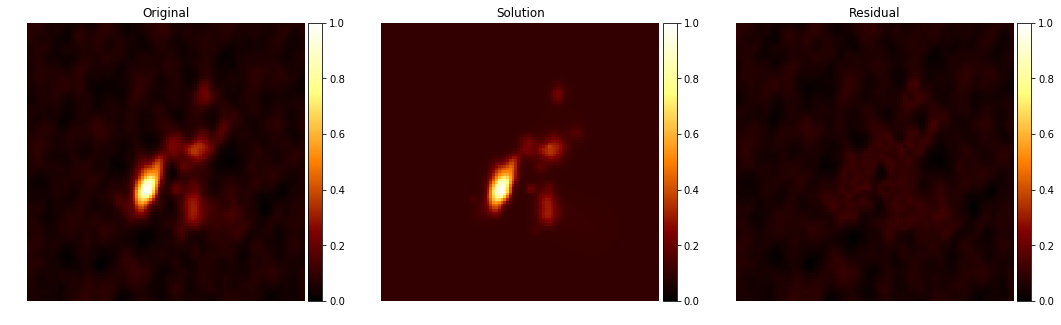

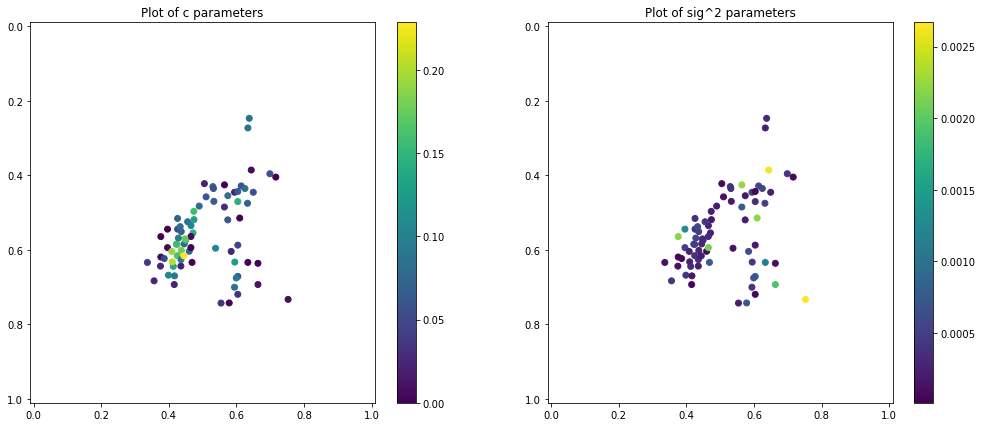

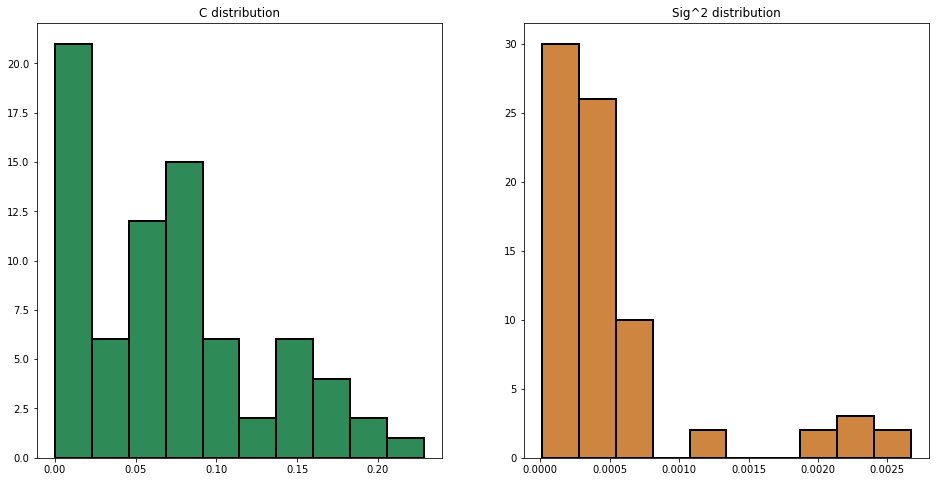

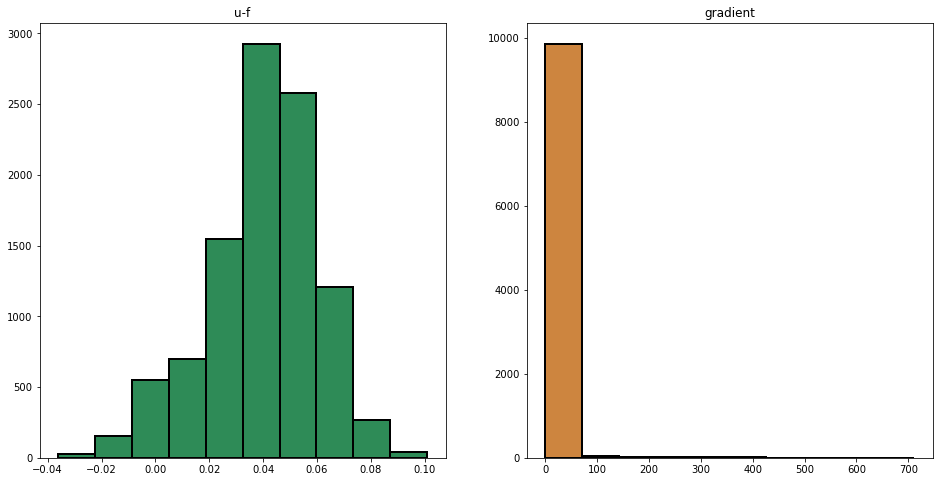

##########################################################################################
Processing 100 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 40100.
nfev: 40112

Residual stats:
Residual RMS: 0.007889148211363014
Residual Variance: 6.215697424676777e-05
Flux Lost: 0.014163738375896682
Flux Addition: 0.012826135695542957
psi1(u-f): 0.004510378603582977
Exceeded Pixels: 476
Sharpness: 45.17364896431074
psi2(grad u): 3.8584698718775314
Total elapsed time: 25.528302431106567 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2122193202250539
Mean min distance between collocation and center 

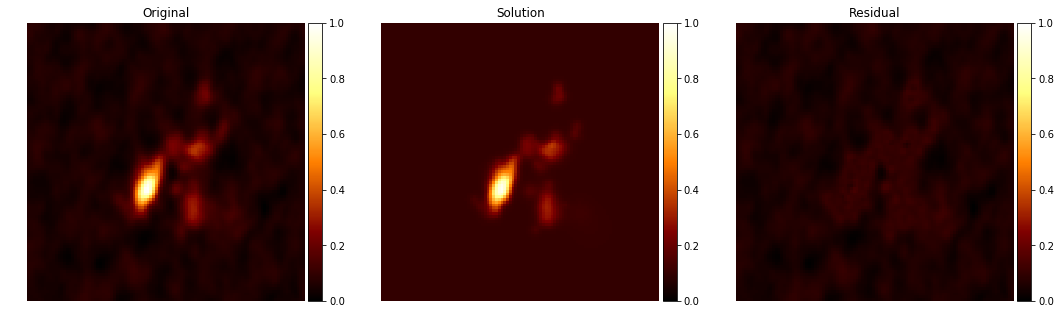

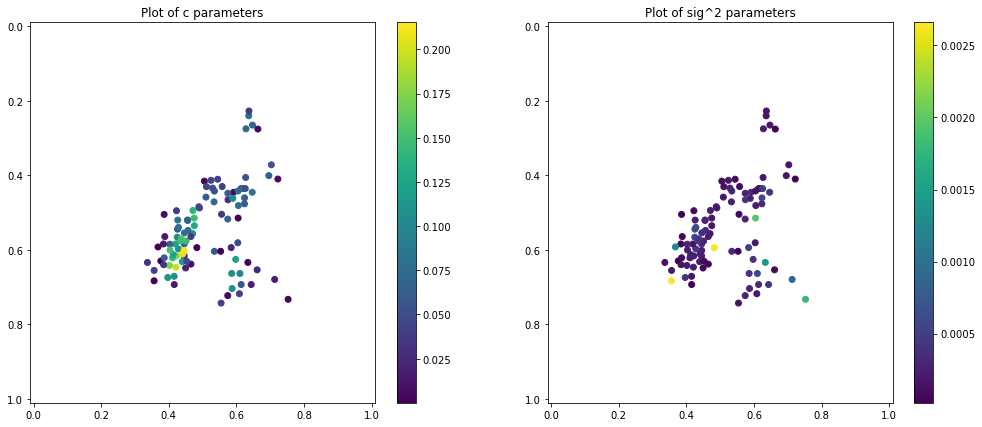

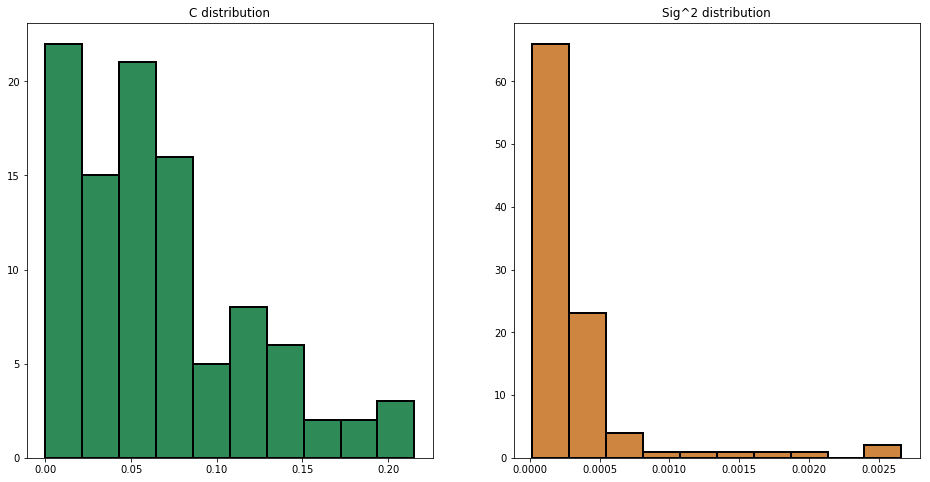

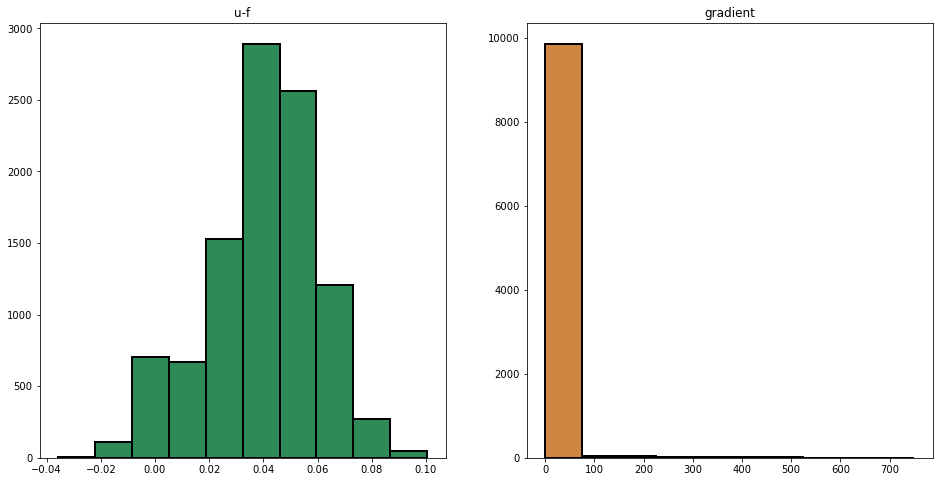

##########################################################################################
Processing 125 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 50100.
nfev: 50112

Residual stats:
Residual RMS: 0.006870556970350827
Residual Variance: 4.7021364784923306e-05
Flux Lost: 0.01262116385074718
Flux Addition: 0.010618056789342405
psi1(u-f): 0.0026697500774315276
Exceeded Pixels: 454
Sharpness: 45.31317492403621
psi2(grad u): 3.8436493307802557
Total elapsed time: 43.29782199859619 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2032550171627258
Mean min distance between collocation and center 

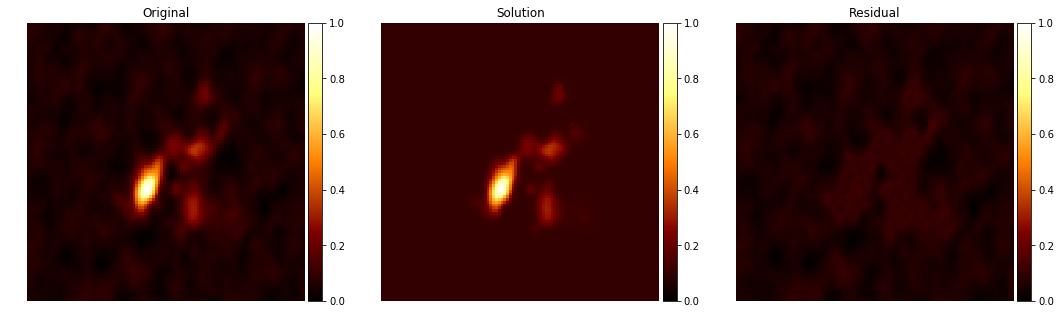

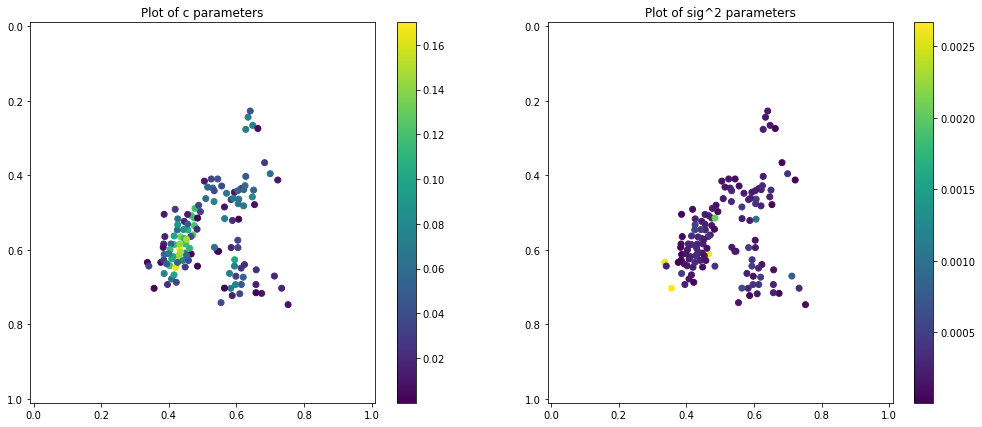

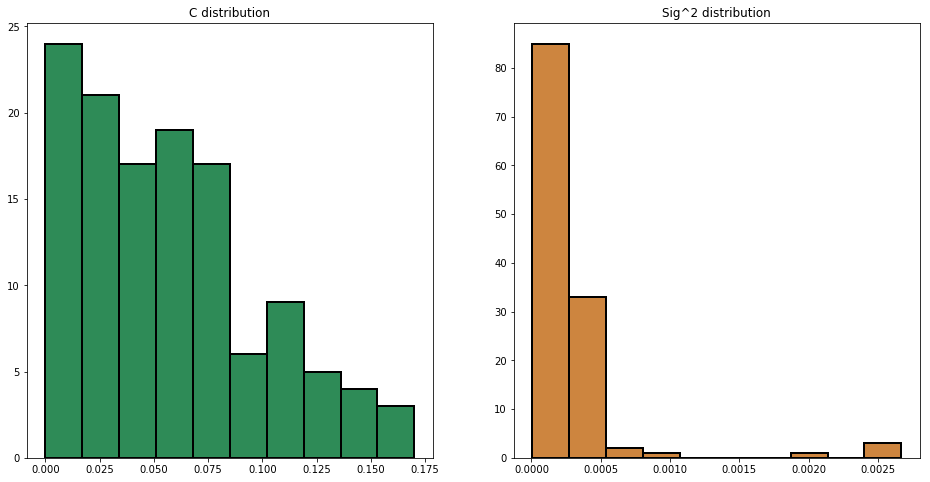

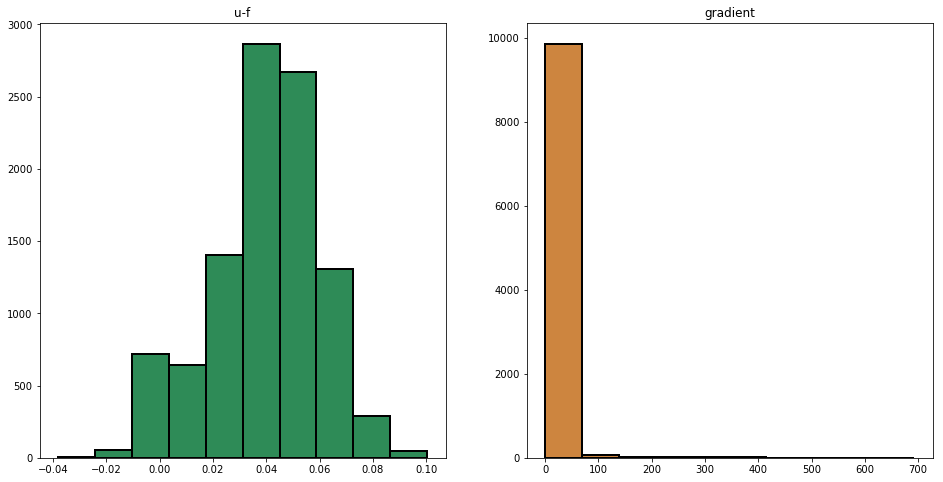

##########################################################################################
Processing 150 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 60100.
nfev: 60114

Residual stats:
Residual RMS: 0.005807495202433731
Residual Variance: 3.3563843990267536e-05
Flux Lost: 0.010919311804057256
Flux Addition: 0.009028895142682432
psi1(u-f): 0.0020532739002079303
Exceeded Pixels: 443
Sharpness: 45.65276489984775
psi2(grad u): 3.8370446728915475
Total elapsed time: 69.89986443519592 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03580120712772431
Mean min distance between collocation and cente

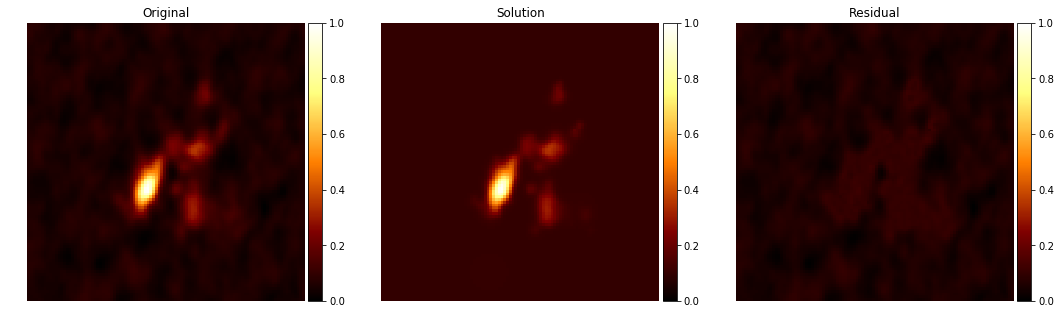

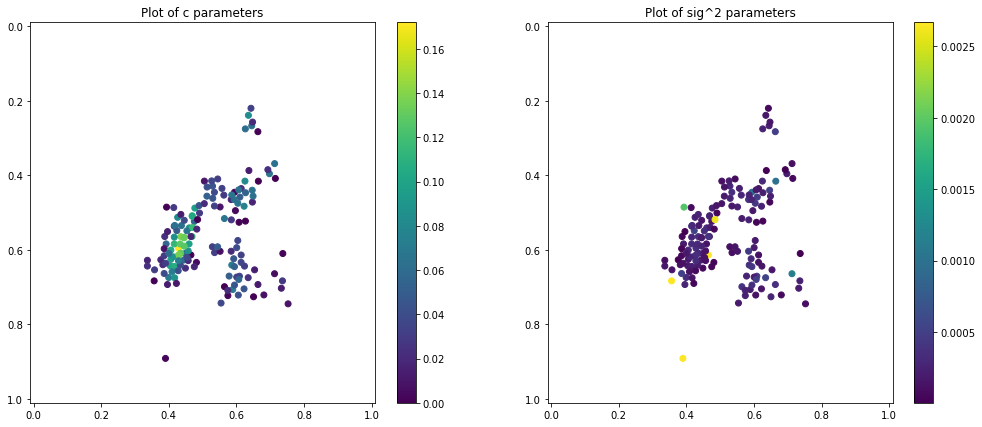

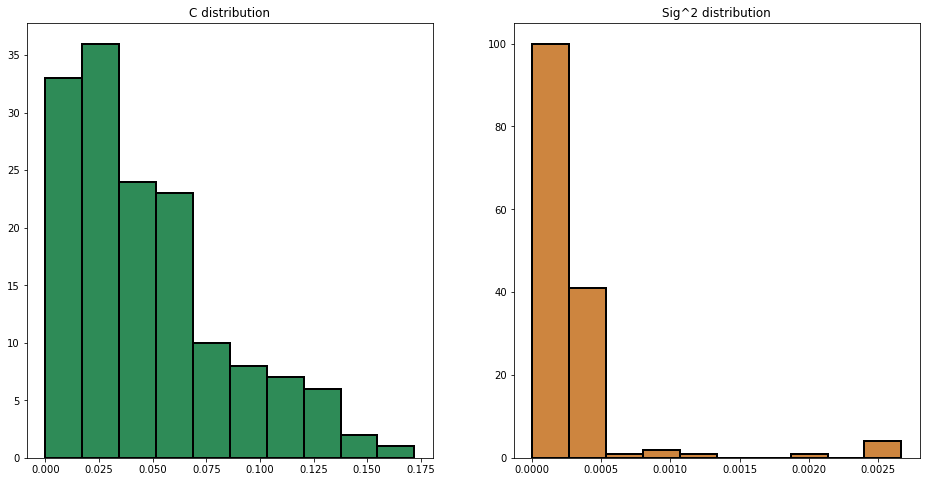

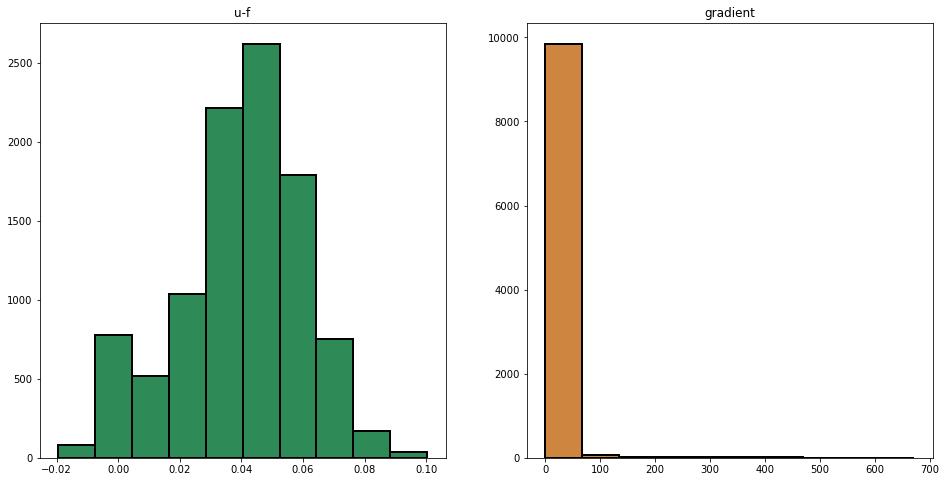

##########################################################################################
Processing 175 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 70100.
nfev: 70115

Residual stats:
Residual RMS: 0.005907932731672807
Residual Variance: 3.456006357774262e-05
Flux Lost: 0.010658954262237195
Flux Addition: 0.007915577820592818
psi1(u-f): 0.0019292485217727922
Exceeded Pixels: 431
Sharpness: 45.543662276295855
psi2(grad u): 3.8587293718824243
Total elapsed time: 103.06208801269531 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03559455614417168
Mean min distance between collocation and cent

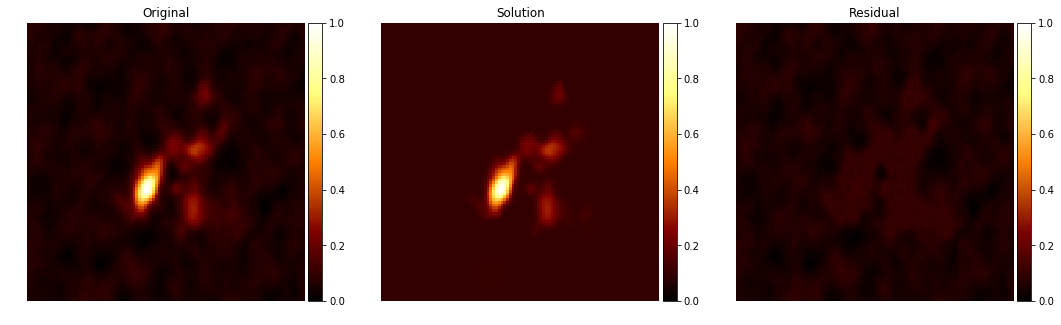

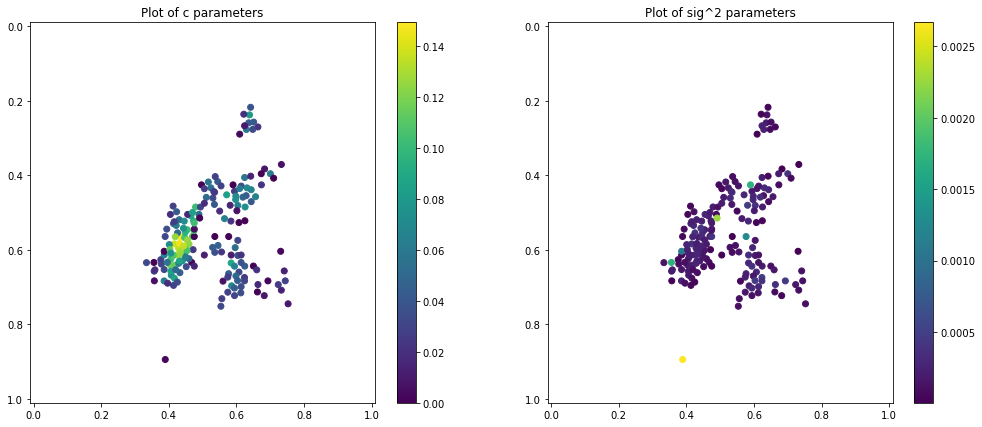

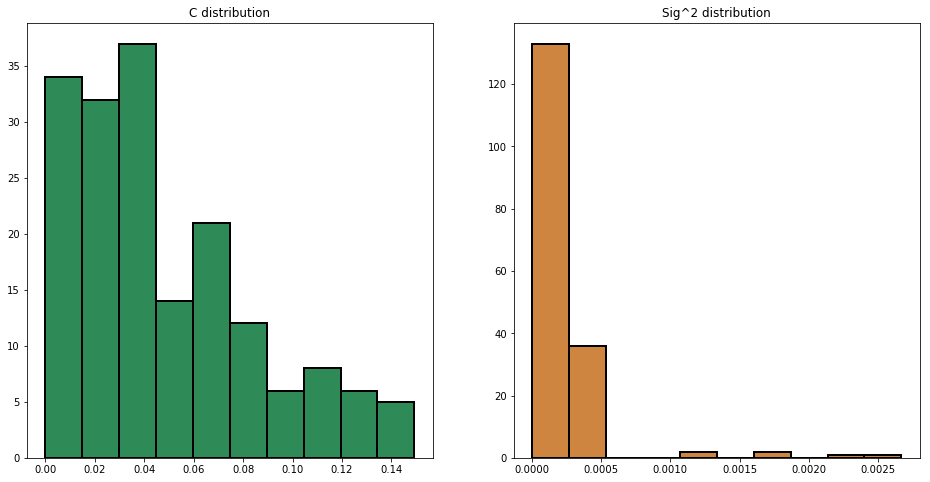

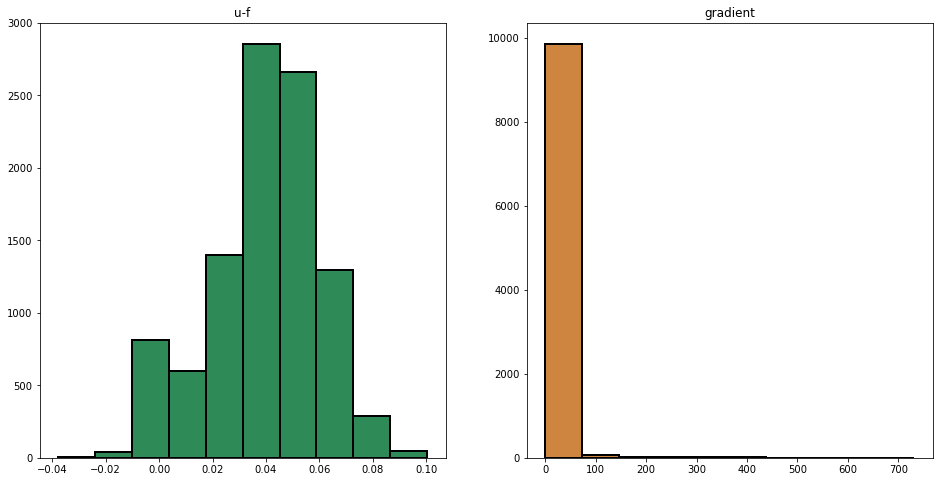

##########################################################################################
Processing 200 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80109

Residual stats:
Residual RMS: 0.0047148256944966
Residual Variance: 2.1970971849436973e-05
Flux Lost: 0.008844833970909441
Flux Addition: 0.006464830892611542
psi1(u-f): 0.0013863180757914873
Exceeded Pixels: 438
Sharpness: 45.80348251392151
psi2(grad u): 3.8700383222977166
Total elapsed time: 146.67069149017334 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03403571146484242
Mean min distance between collocation and center

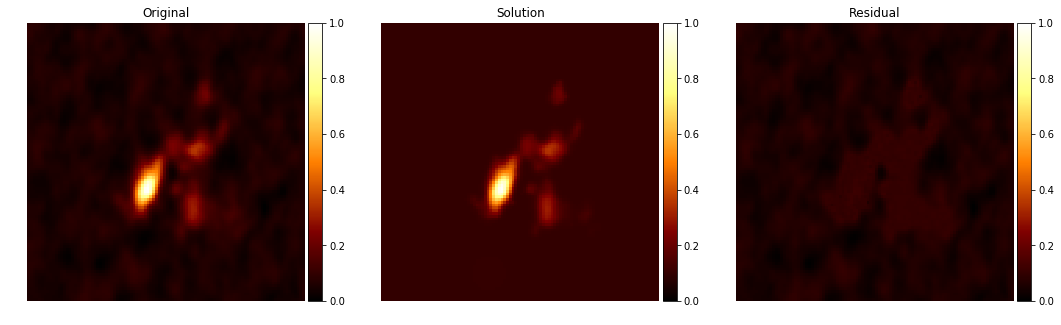

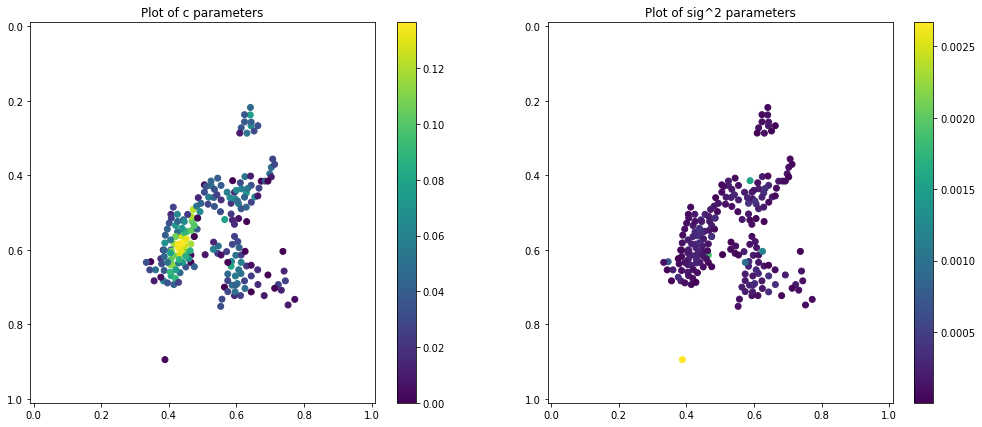

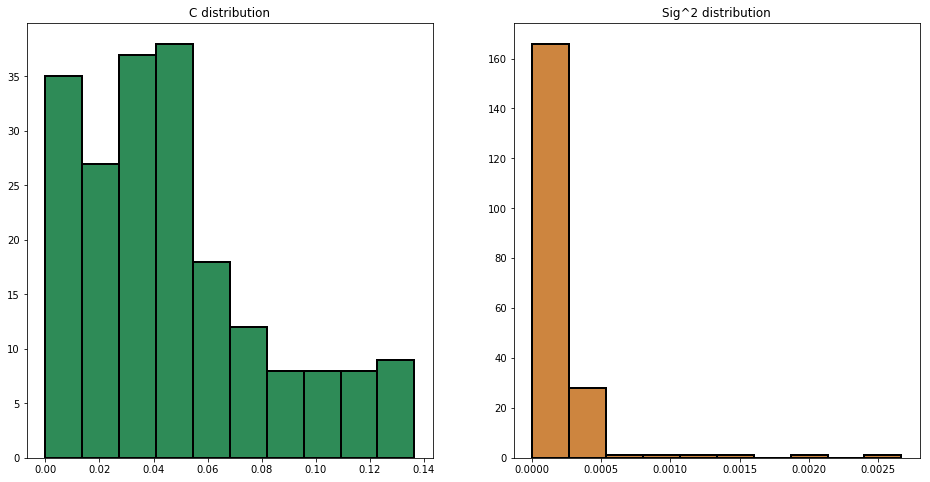

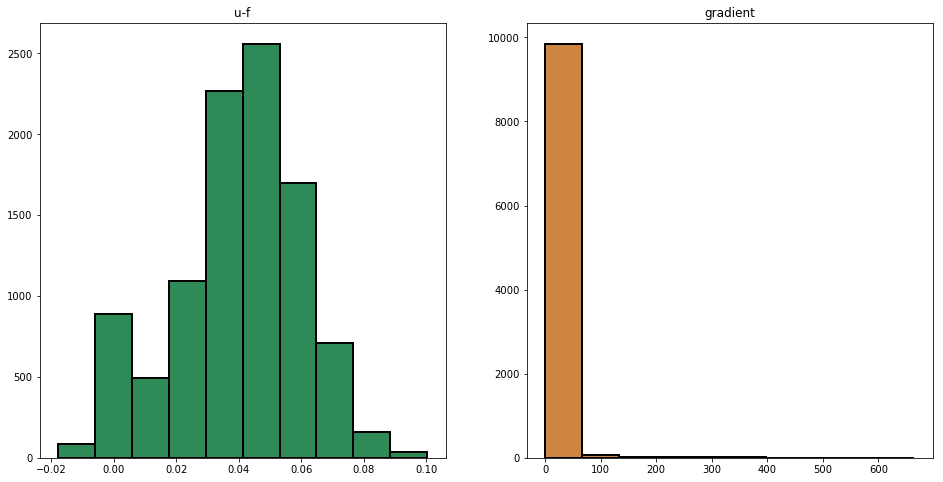

##########################################################################################
Processing 225 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 90100.
nfev: 90112

Residual stats:
Residual RMS: 0.004835513149767711
Residual Variance: 2.3292737183643522e-05
Flux Lost: 0.007899899548045708
Flux Addition: 0.006500163819266575
psi1(u-f): 0.0032629919858231686
Exceeded Pixels: 449
Sharpness: 46.14366865905259
psi2(grad u): 3.876097272301443
Total elapsed time: 207.72044157981873 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03548569209662088
Mean min distance between collocation and cente

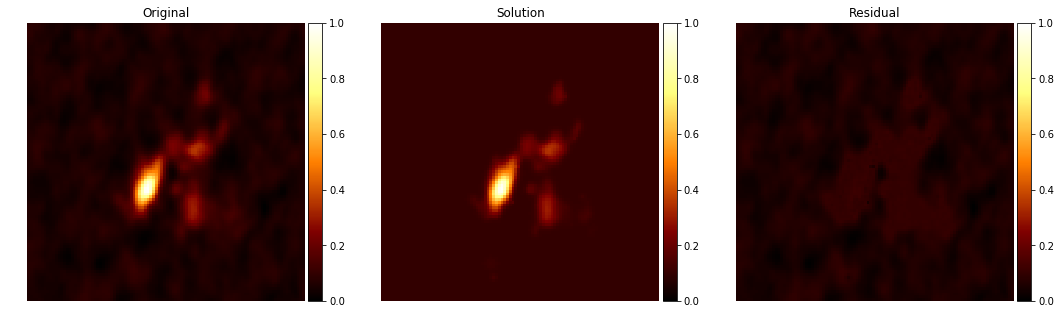

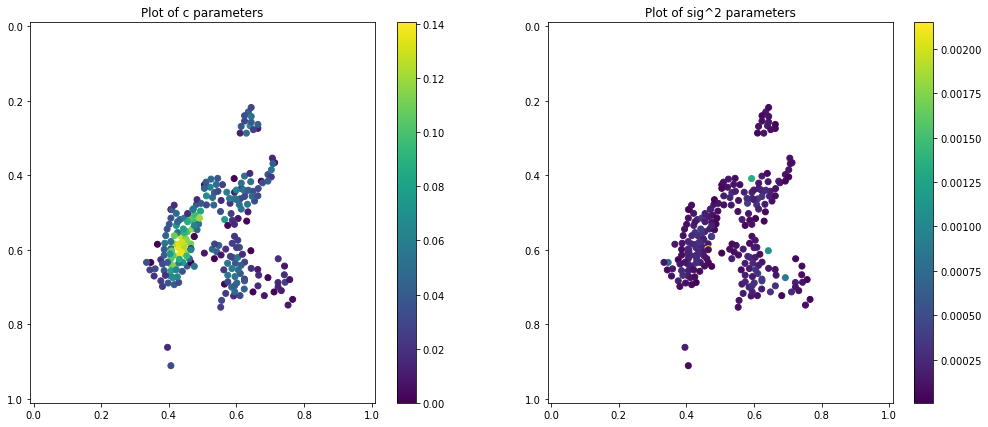

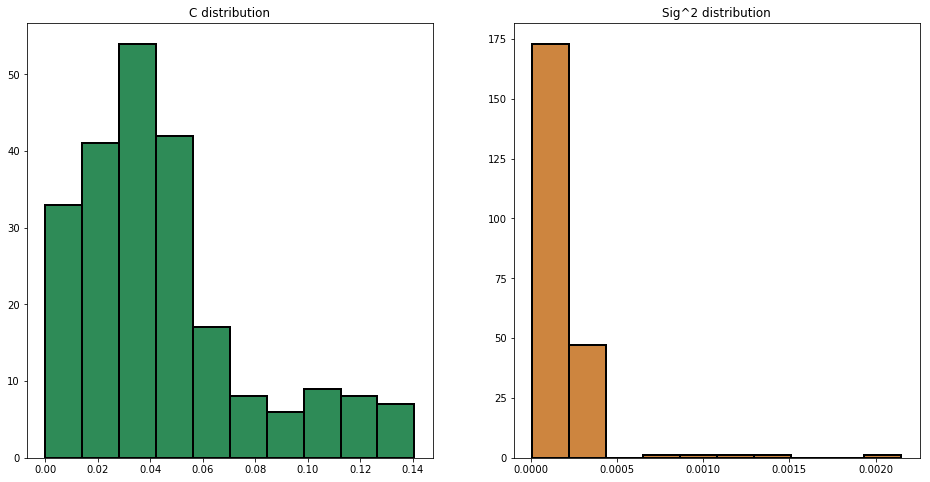

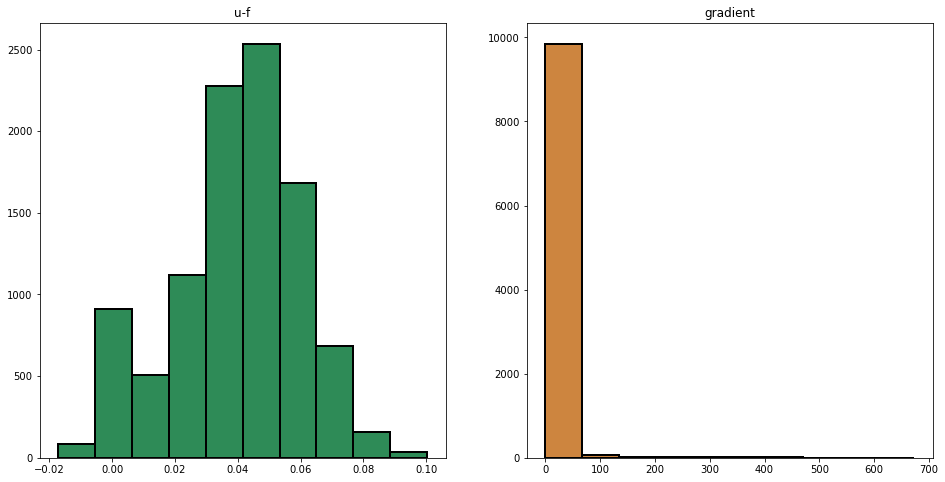

##########################################################################################
Processing 250 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100110

Residual stats:
Residual RMS: 0.004147901157894867
Residual Variance: 1.704035135522995e-05
Flux Lost: 0.007632813436726206
Flux Addition: 0.0057332878216042596
psi1(u-f): 0.0007722276325307399
Exceeded Pixels: 439
Sharpness: 46.1055117482082
psi2(grad u): 3.8648970809439134
Total elapsed time: 288.01450181007385 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.033982385183827284
Mean min distance between collocation and ce

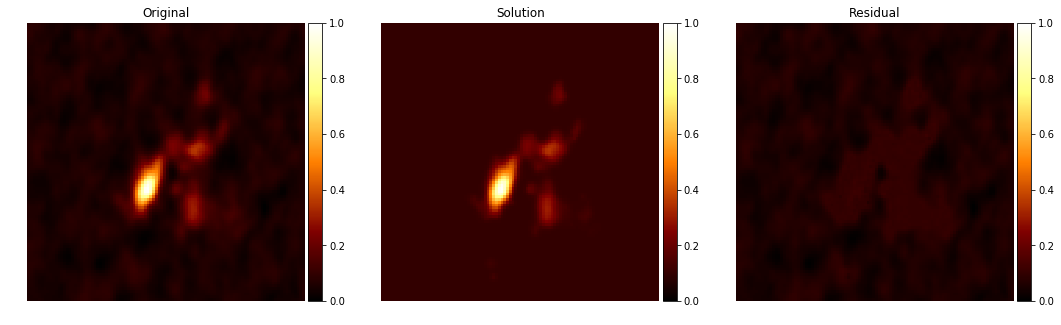

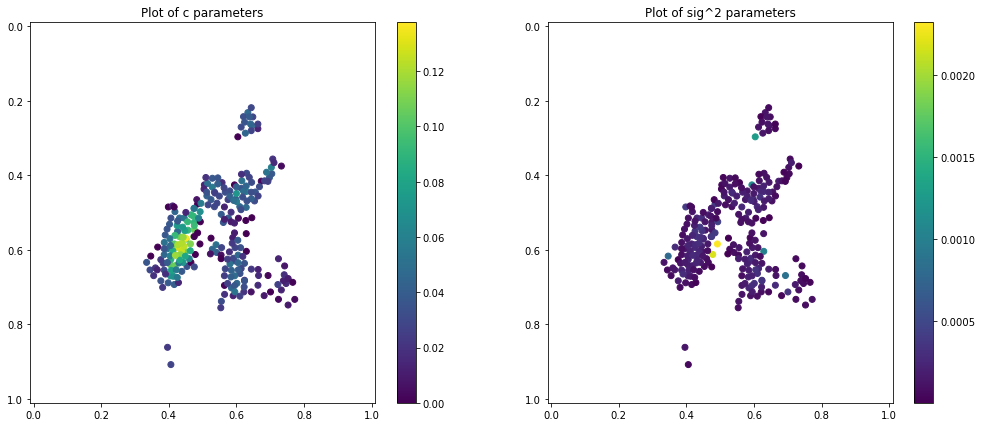

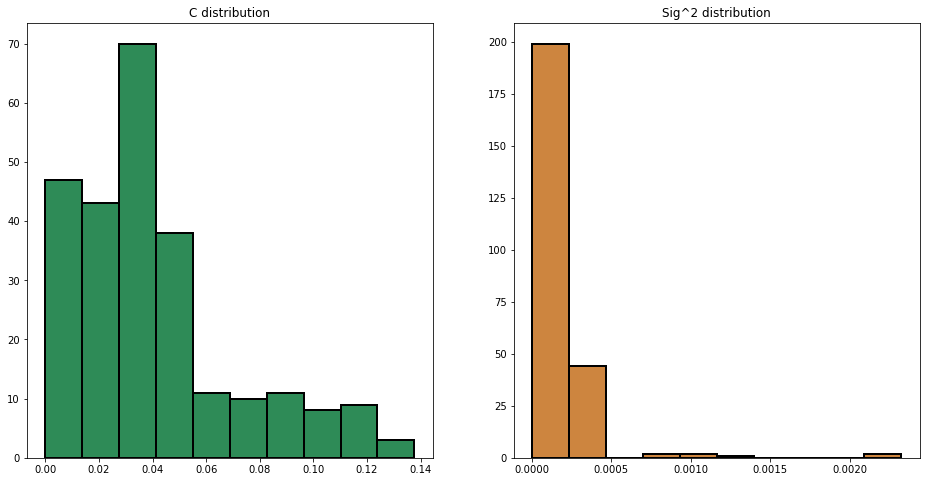

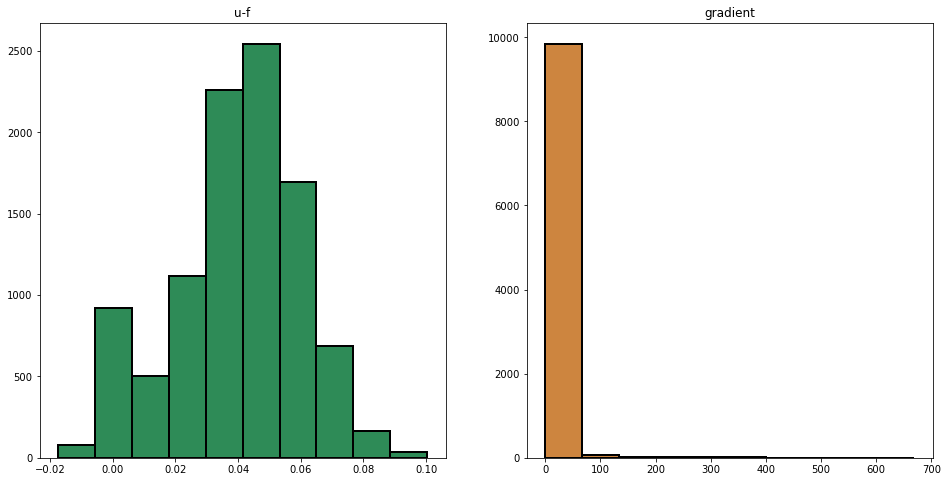

##########################################################################################
Processing 275 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 110100.
nfev: 110111

Residual stats:
Residual RMS: 0.003928920150736924
Residual Variance: 1.5224425750456412e-05
Flux Lost: 0.007508442373619882
Flux Addition: 0.005353623689787953
psi1(u-f): 0.00046020267285241885
Exceeded Pixels: 445
Sharpness: 46.11331463815151
psi2(grad u): 3.860877347297352
Total elapsed time: 377.935355424881 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.035744939256099416
Mean min distance between collocation and cen

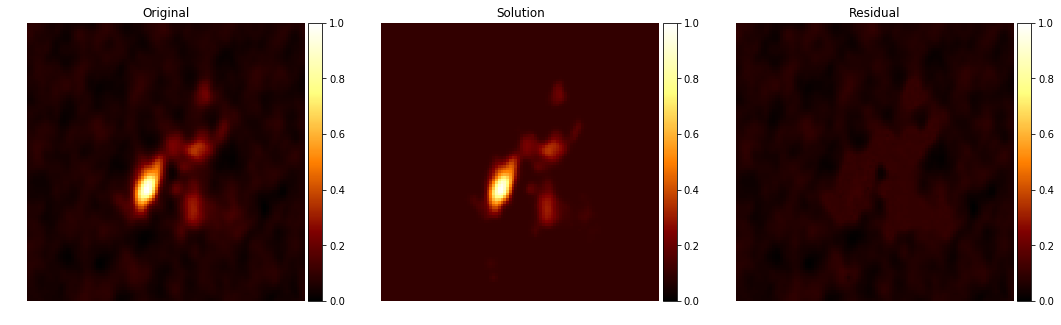

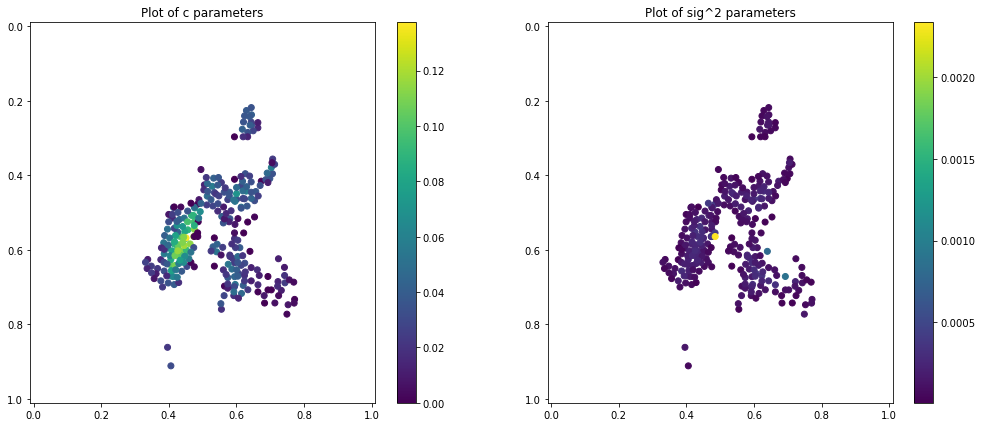

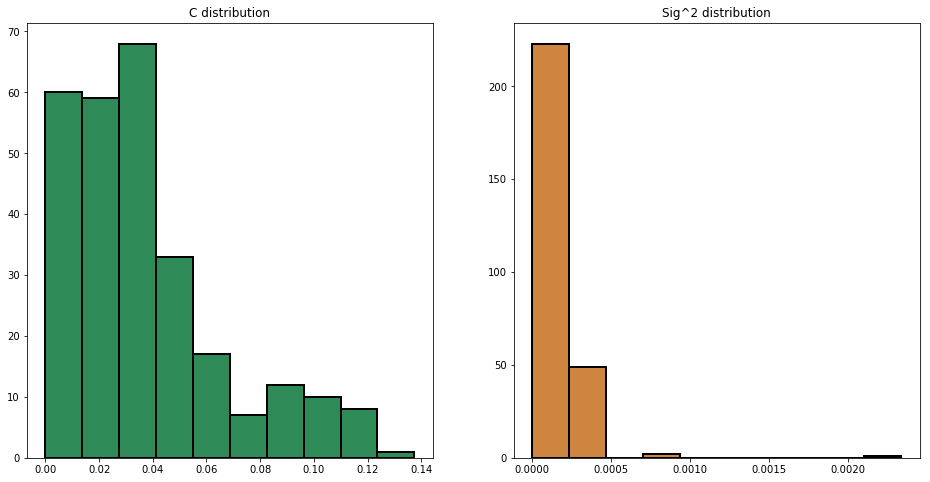

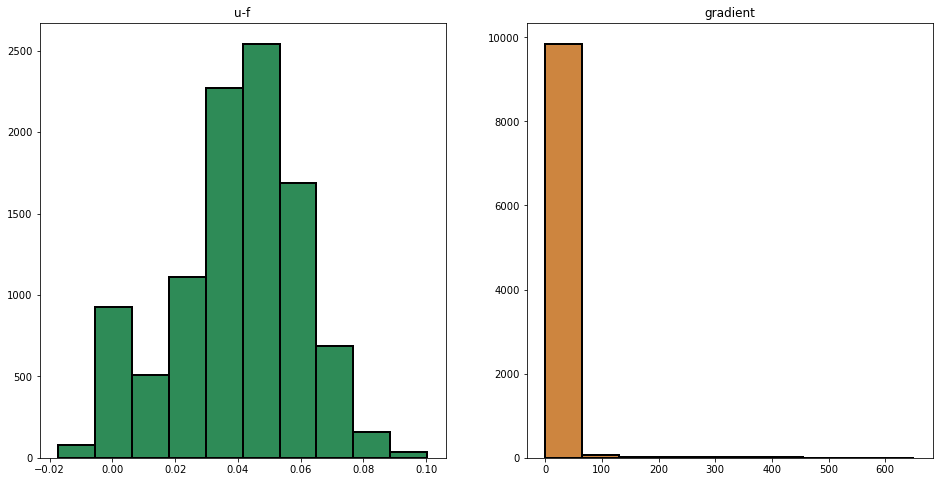

##########################################################################################
Processing 300 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120113

Residual stats:
Residual RMS: 0.004071382641537378
Residual Variance: 1.6333654477901698e-05
Flux Lost: 0.0076581010612776935
Flux Addition: 0.0053534080637158464
psi1(u-f): 0.0005513630965234786
Exceeded Pixels: 435
Sharpness: 46.06268536416967
psi2(grad u): 3.866288733127192
Total elapsed time: 483.91053795814514 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0357580544413144
Mean min distance between collocation and ce

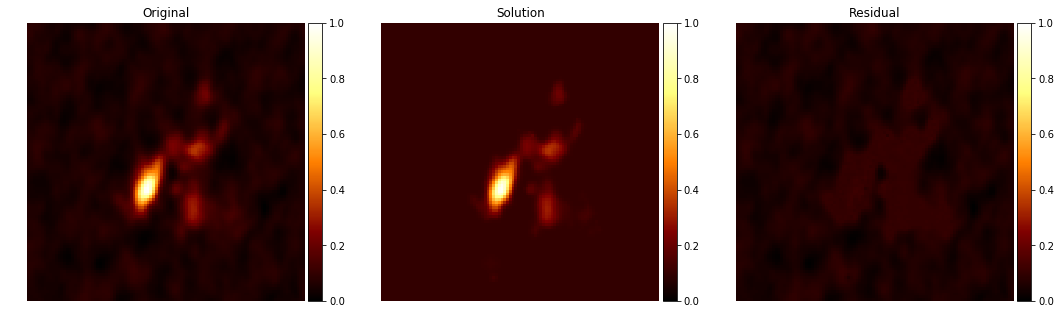

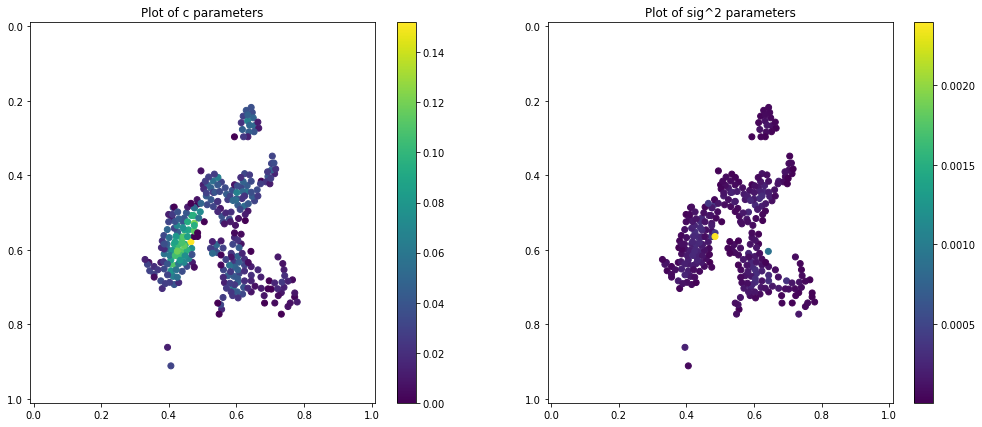

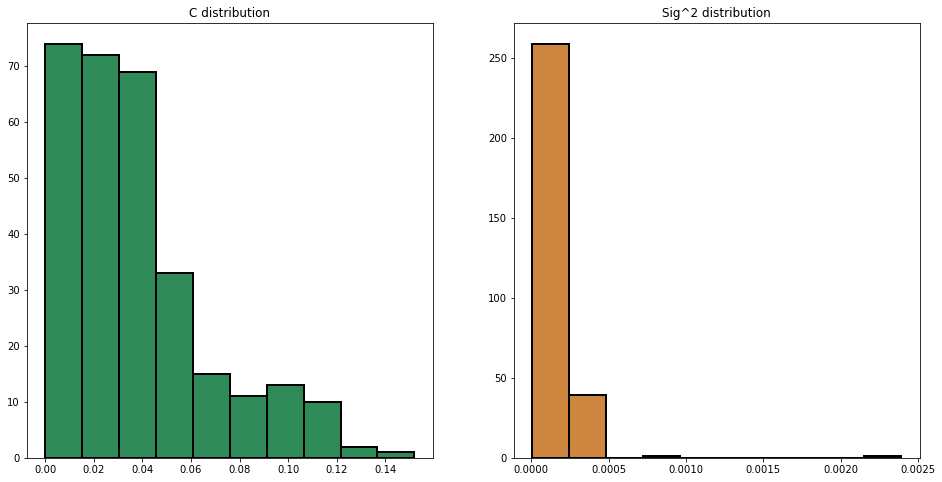

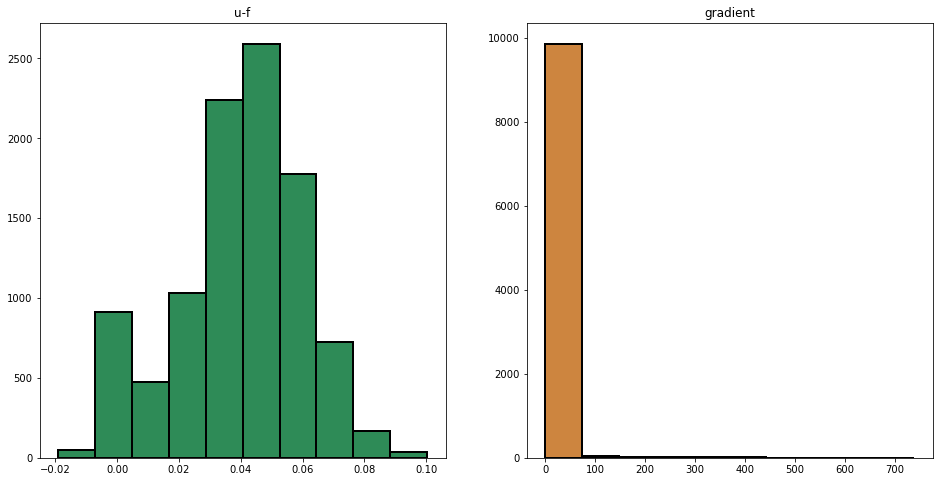

##########################################################################################
Processing 325 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 130100.
nfev: 130116

Residual stats:
Residual RMS: 0.003978469284411748
Residual Variance: 1.565835932330996e-05
Flux Lost: 0.007247529486719922
Flux Addition: 0.005318677197554214
psi1(u-f): 0.0006353394877594286
Exceeded Pixels: 434
Sharpness: 45.985463058893075
psi2(grad u): 3.880735658145433
Total elapsed time: 608.7913150787354 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.035751701779068196
Mean min distance between collocation and cen

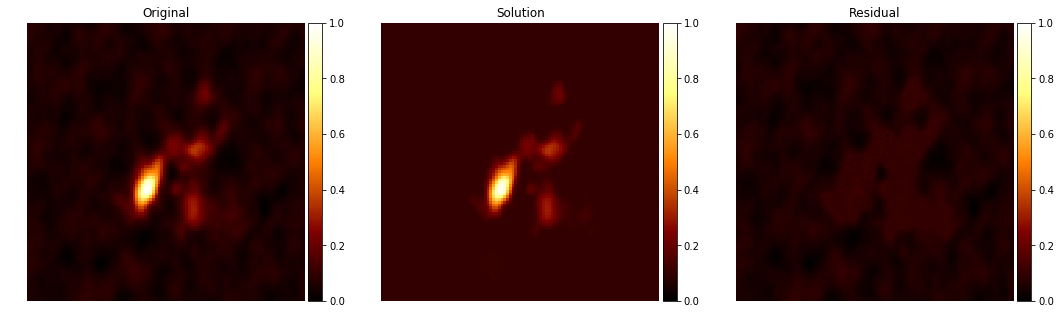

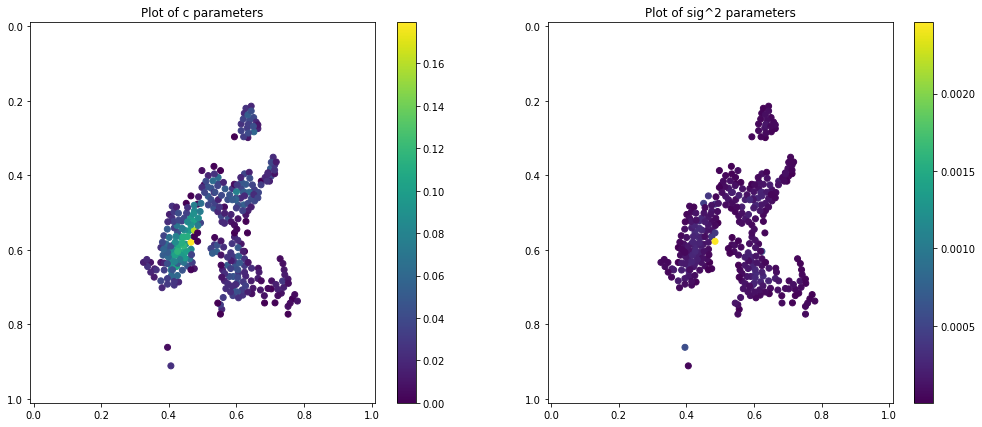

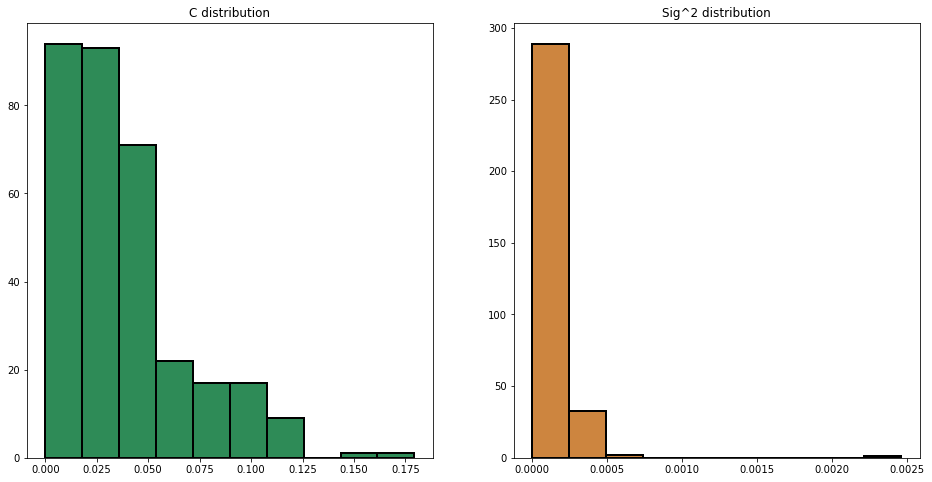

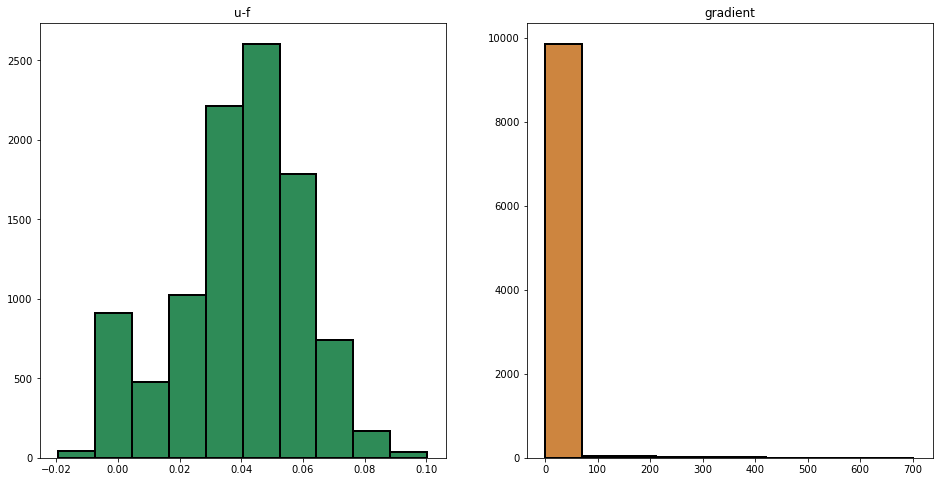

##########################################################################################
Processing 350 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 140100.
nfev: 140111

Residual stats:
Residual RMS: 0.0038517068512690772
Residual Variance: 1.4688165621775123e-05
Flux Lost: 0.007092681807376586
Flux Addition: 0.0052953761931441735
psi1(u-f): 0.0004658575256805374
Exceeded Pixels: 450
Sharpness: 46.037780511486076
psi2(grad u): 3.881374649881909
Total elapsed time: 769.3774728775024 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03574037586212874
Mean min distance between collocation and c

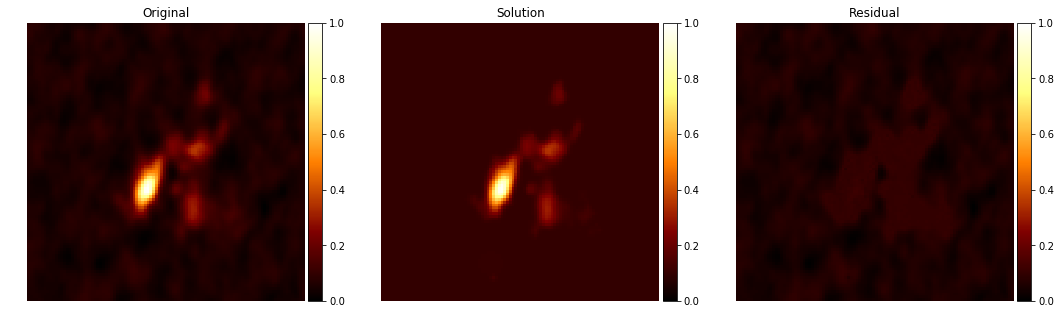

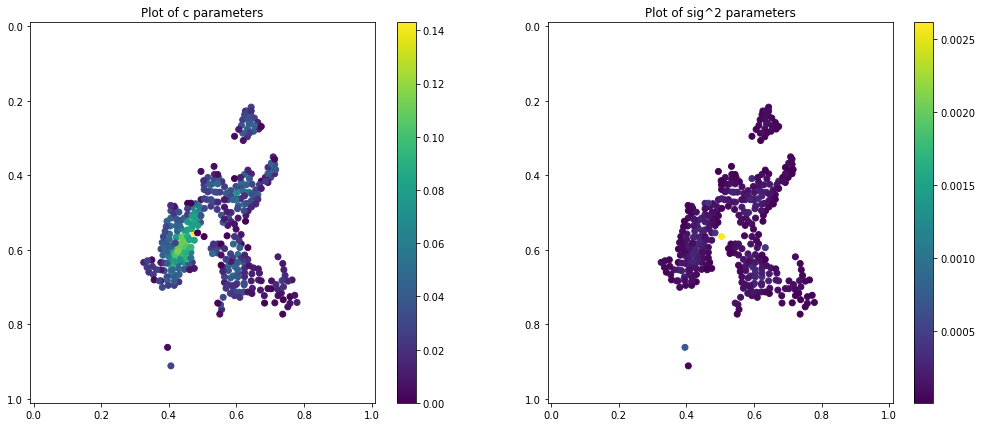

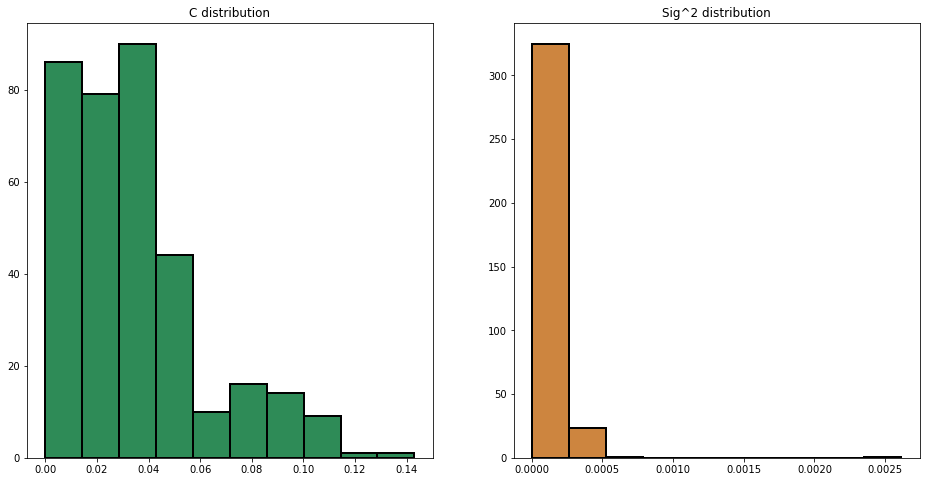

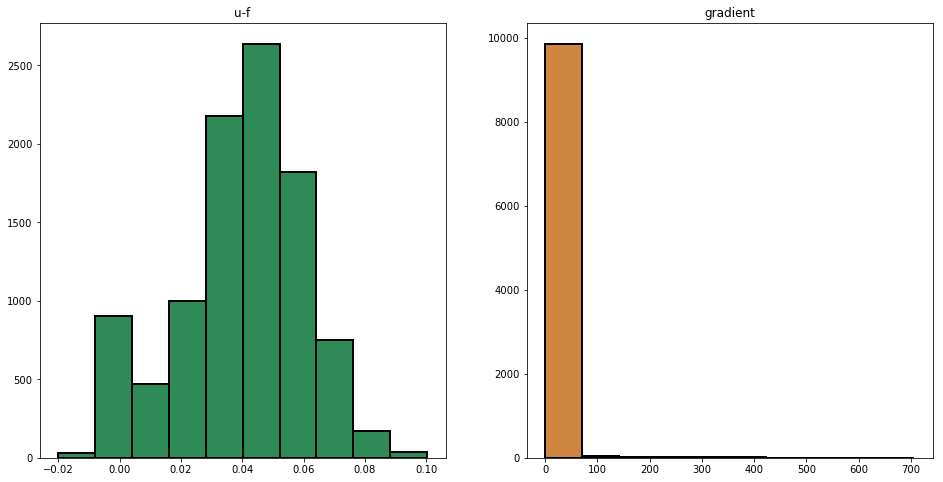

##########################################################################################
Processing 375 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 150100.
nfev: 150111

Residual stats:
Residual RMS: 0.0037906430942563013
Residual Variance: 1.4177838007360702e-05
Flux Lost: 0.007059977415241547
Flux Addition: 0.005013873201452933
psi1(u-f): 0.00045226748711402686
Exceeded Pixels: 446
Sharpness: 45.951385734294625
psi2(grad u): 3.8833650083479108
Total elapsed time: 932.8077178001404 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.035758411101780734
Mean min distance between collocation and

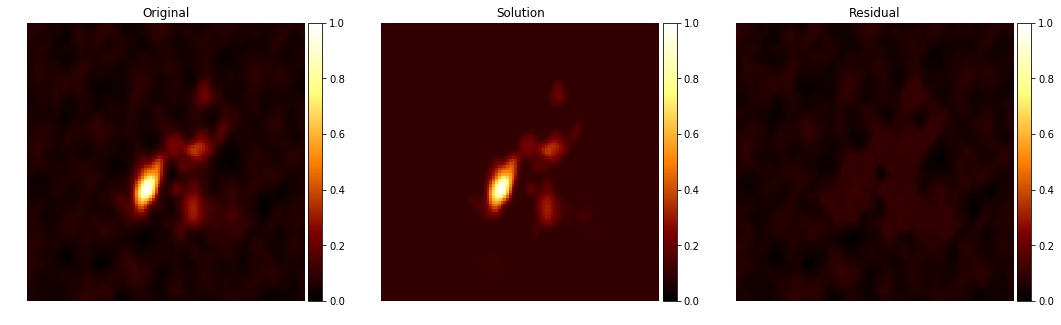

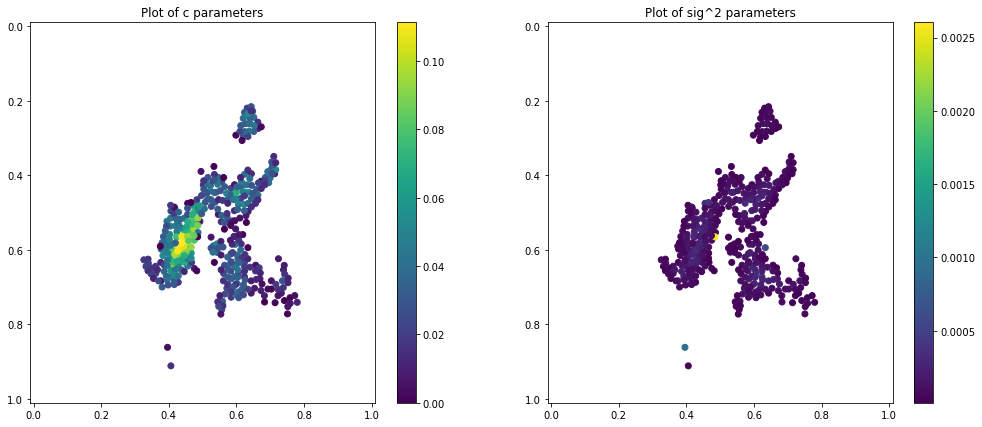

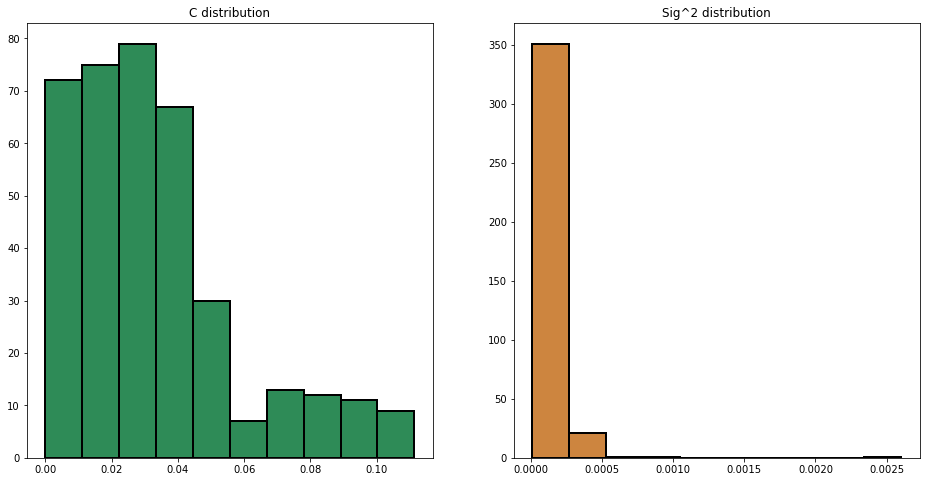

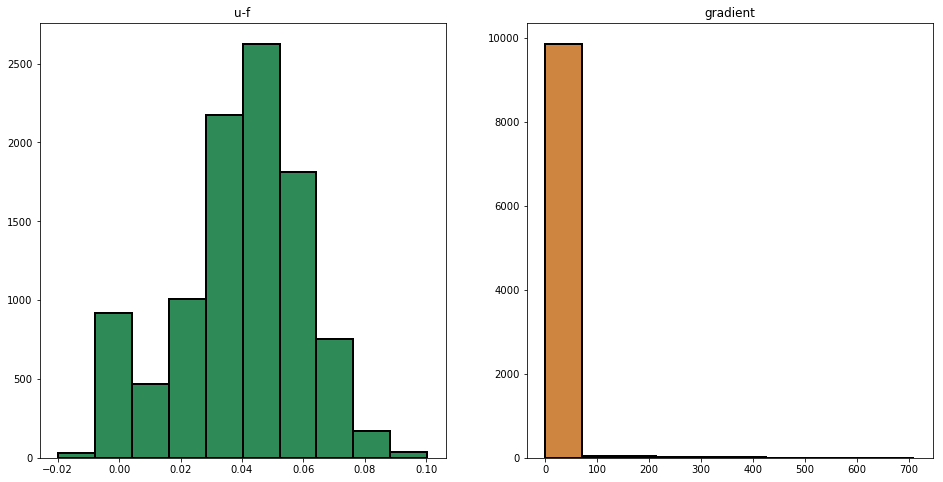

##########################################################################################
Processing 400 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 160100.
nfev: 160112

Residual stats:
Residual RMS: 0.0037246710120857054
Residual Variance: 1.3634918811620454e-05
Flux Lost: 0.007139452095984319
Flux Addition: 0.0048550286083186385
psi1(u-f): 0.00032071159145495776
Exceeded Pixels: 438
Sharpness: 45.966446294257636
psi2(grad u): 3.879766126196647
Total elapsed time: 1149.5392055511475 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.025516112149271034
Mean min distance between collocation an

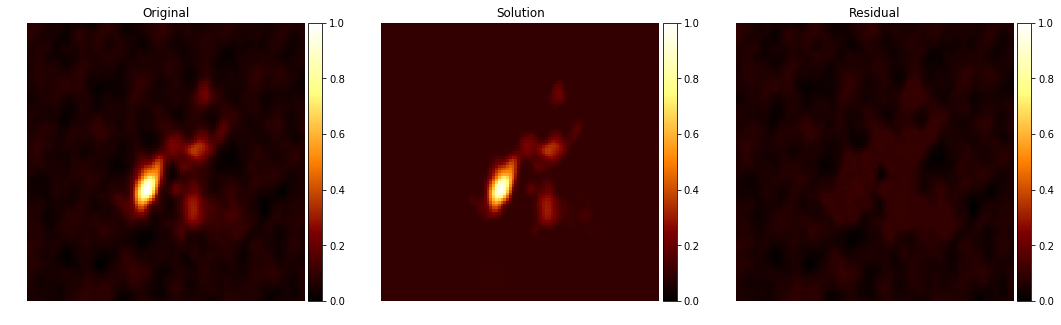

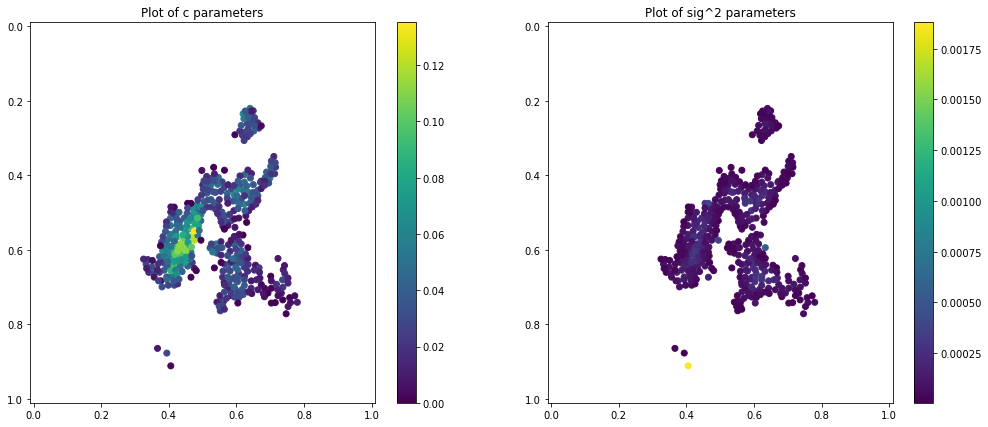

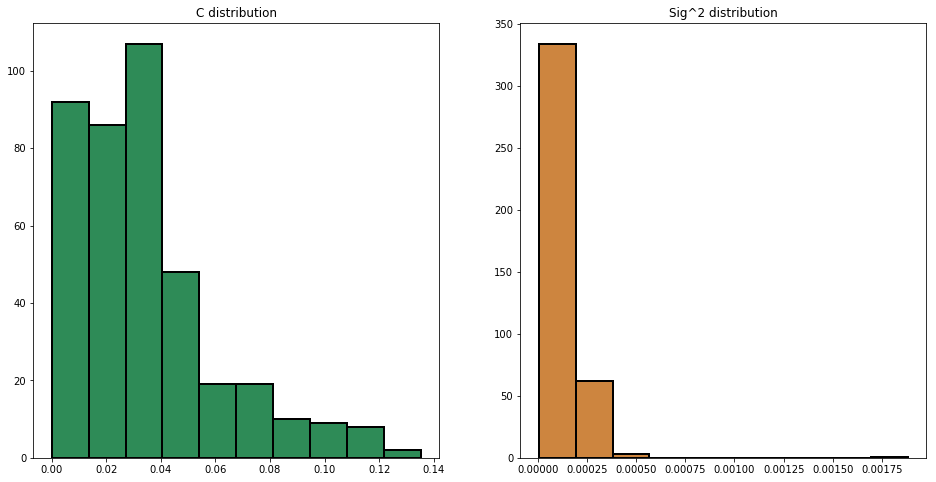

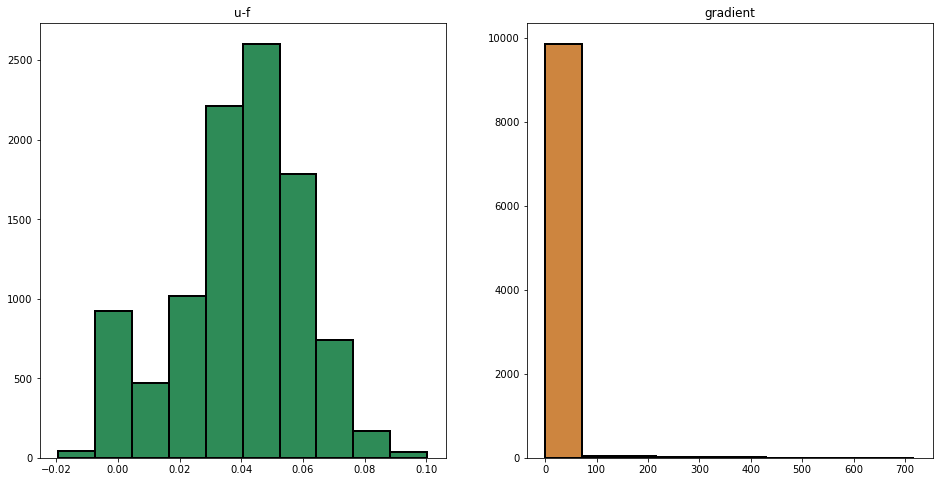

##########################################################################################
Processing 425 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 170100.
nfev: 170109

Residual stats:
Residual RMS: 0.0035819908943285094
Residual Variance: 1.2584136252123545e-05
Flux Lost: 0.006926049297032517
Flux Addition: 0.004602330382740663
psi1(u-f): 0.0003082155957550452
Exceeded Pixels: 427
Sharpness: 45.80059572856919
psi2(grad u): 3.875660027351
Total elapsed time: 1360.9081234931946 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.019427478596423558
Mean min distance between collocation and cent

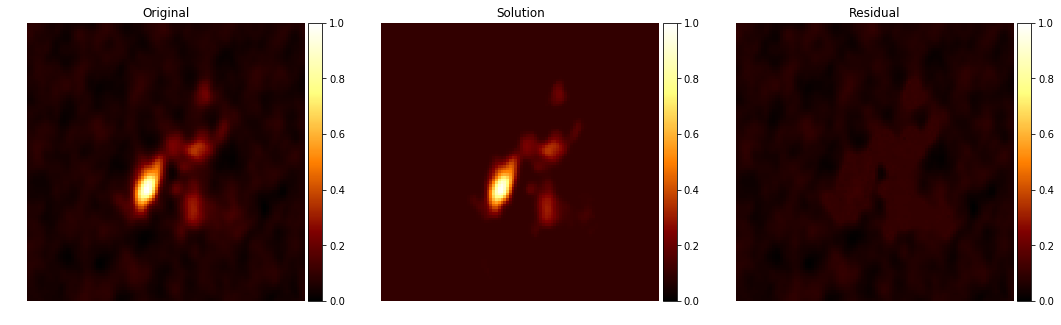

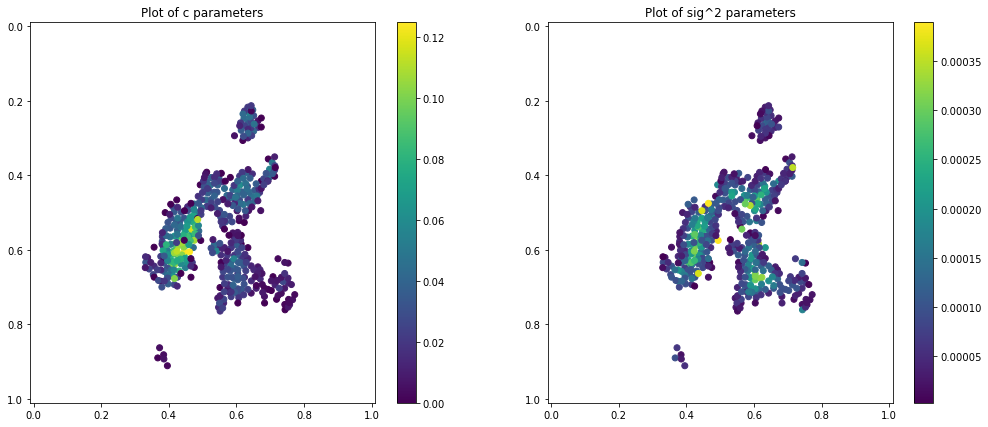

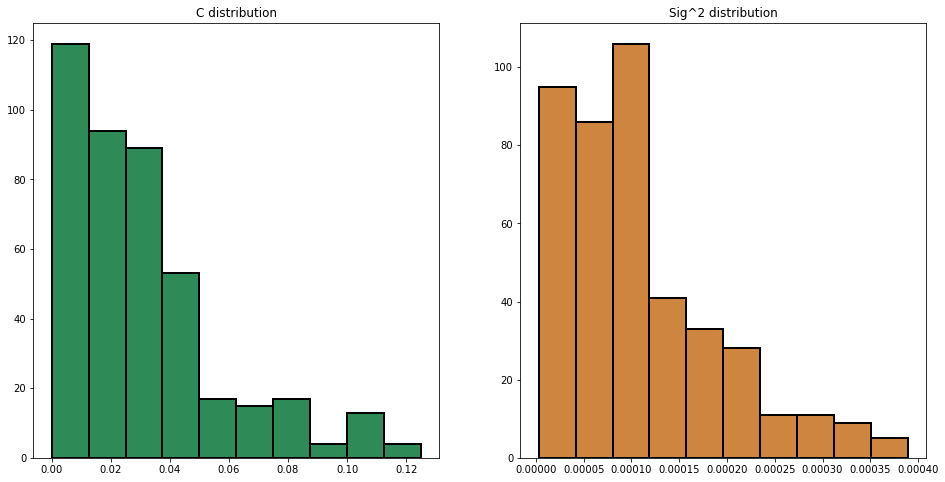

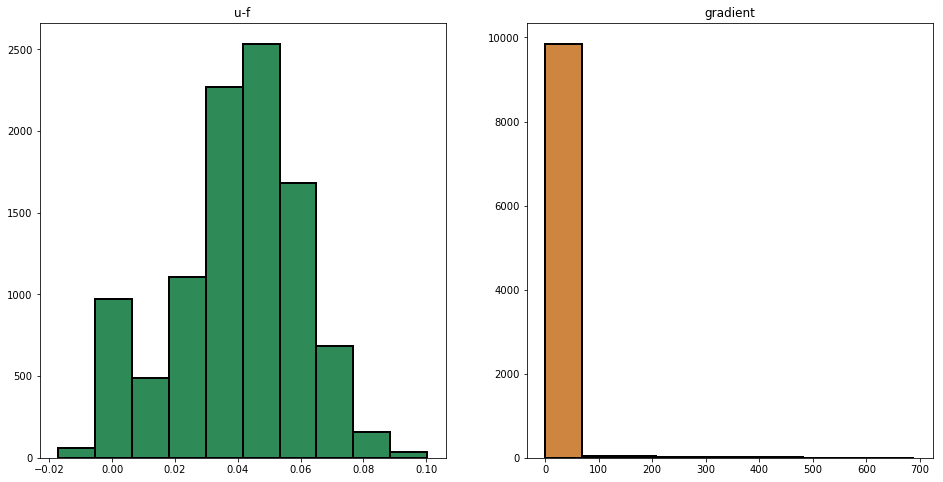

##########################################################################################
Processing 450 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 180100.
nfev: 180115

Residual stats:
Residual RMS: 0.0036358210591169765
Residual Variance: 1.3015712415449446e-05
Flux Lost: 0.006820406461323266
Flux Addition: 0.00470925846426205
psi1(u-f): 0.00041951554900573635
Exceeded Pixels: 429
Sharpness: 45.823379159558066
psi2(grad u): 3.866209662995168
Total elapsed time: 1594.9649710655212 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.01911880265619704
Mean min distance between collocation and c

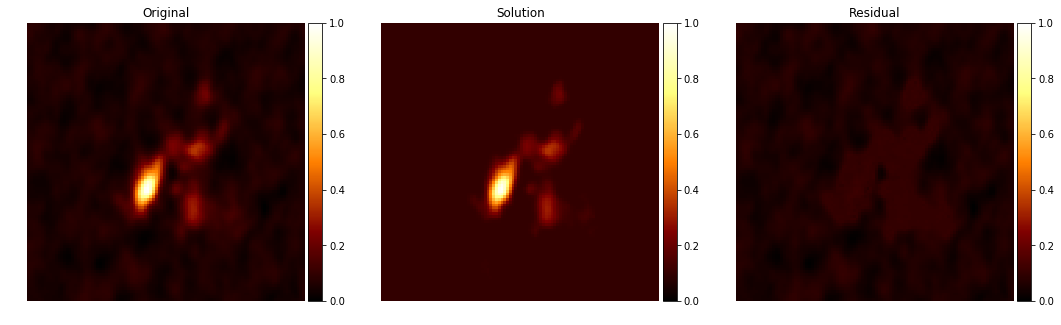

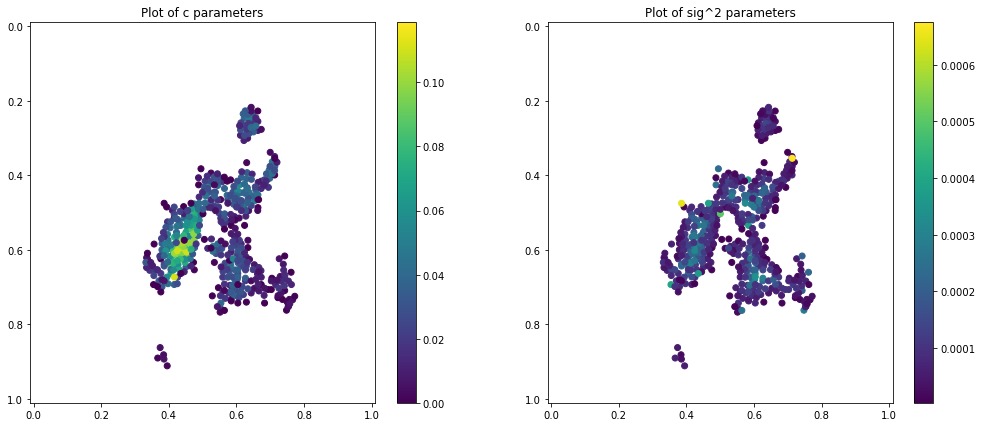

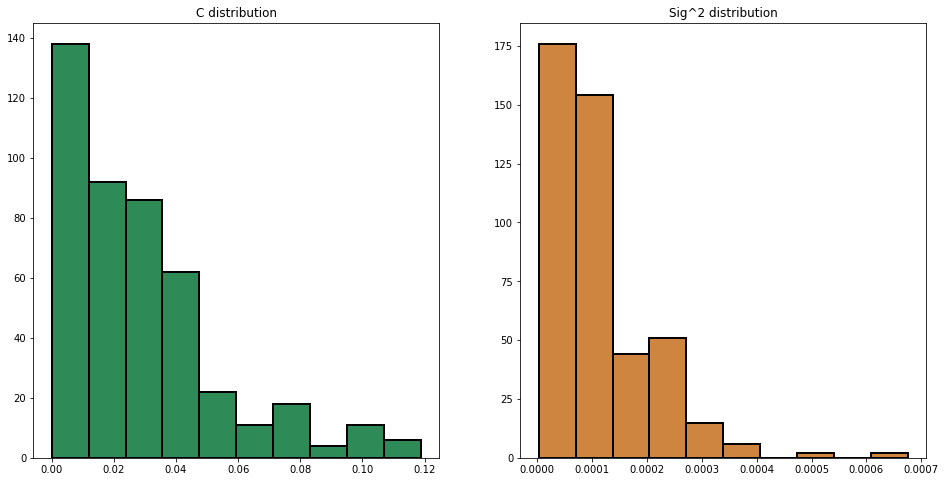

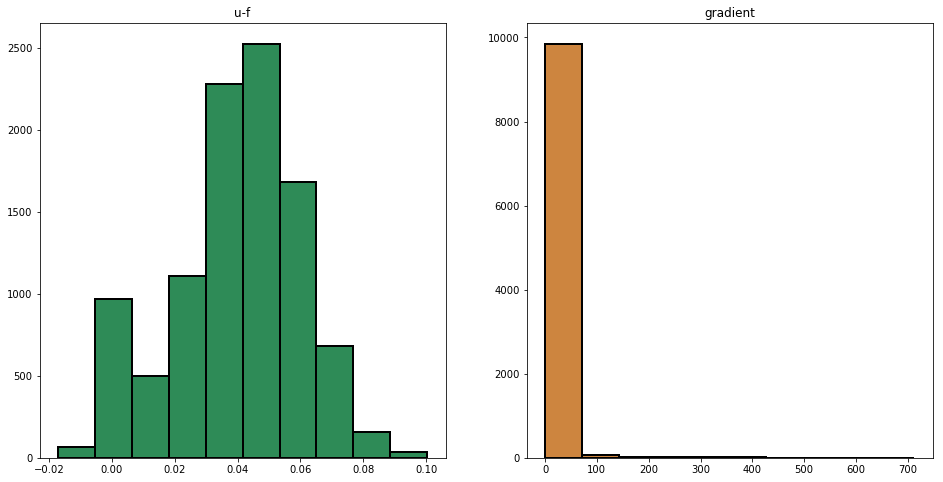

##########################################################################################
Processing 475 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 190100.
nfev: 190109

Residual stats:
Residual RMS: 0.0037942629826235186
Residual Variance: 1.424014653213926e-05
Flux Lost: 0.0066767112907284475
Flux Addition: 0.004826531149919012
psi1(u-f): 0.0008852581876541717
Exceeded Pixels: 457
Sharpness: 45.85105212768261
psi2(grad u): 3.8598131166513387
Total elapsed time: 1770.4839997291565 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.020579625810751755
Mean min distance between collocation and 

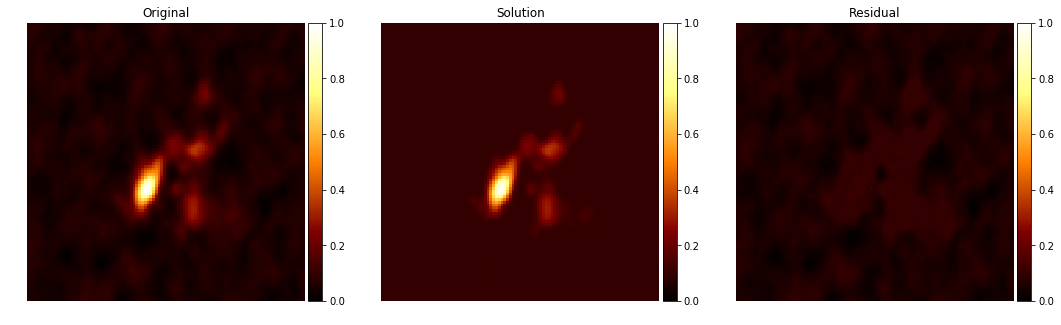

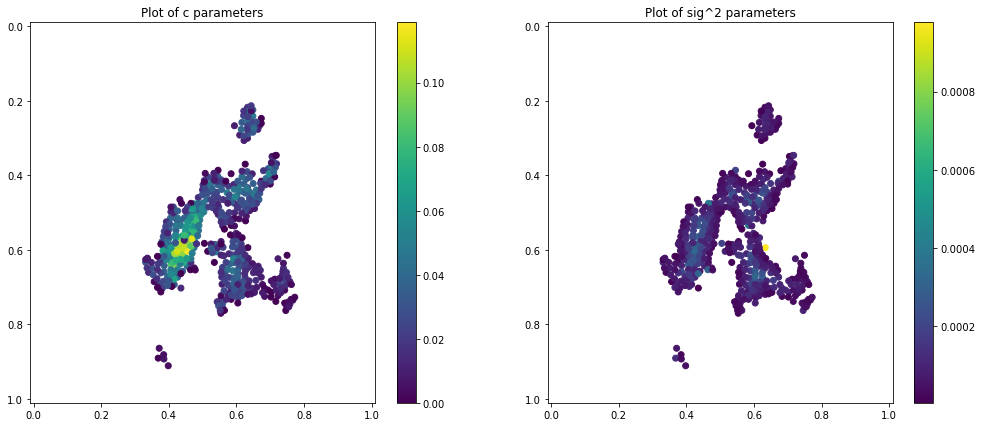

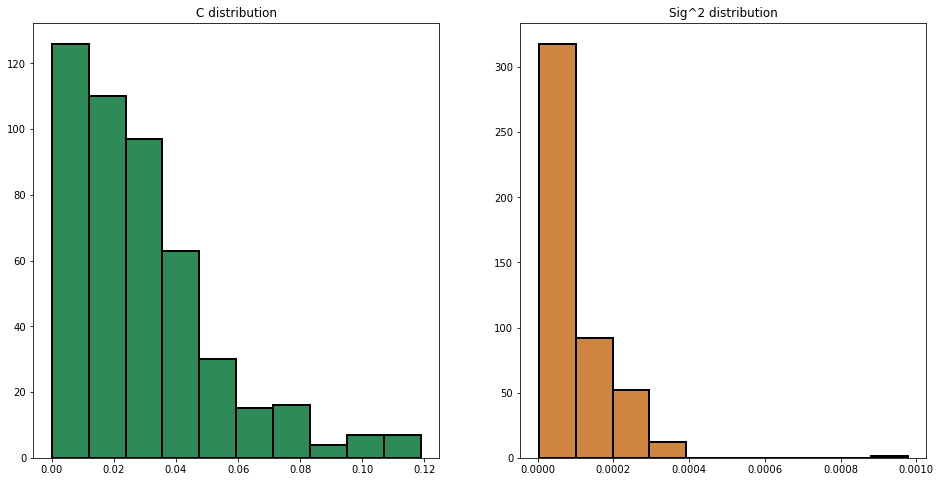

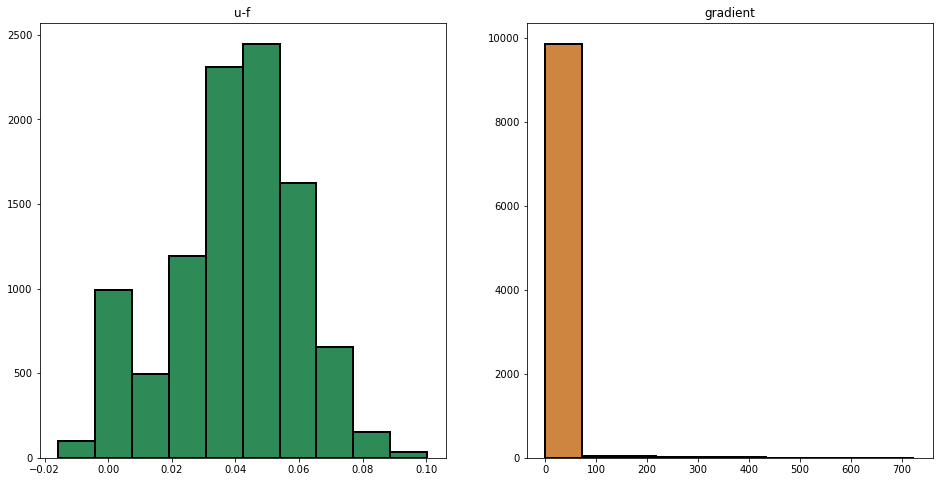

##########################################################################################
Processing 500 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 200100.
nfev: 200115

Residual stats:
Residual RMS: 0.0039751421315725646
Residual Variance: 1.5519429104566087e-05
Flux Lost: 0.006850900868240162
Flux Addition: 0.00436415944151678
psi1(u-f): 0.002384443696760209
Exceeded Pixels: 422
Sharpness: 45.81443822223205
psi2(grad u): 3.858943340779997
Total elapsed time: 1935.4235694408417 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.01846623790447855
Mean min distance between collocation and cent

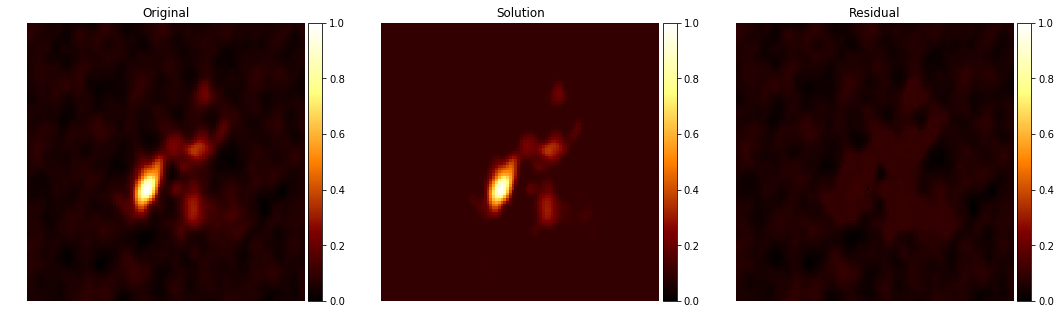

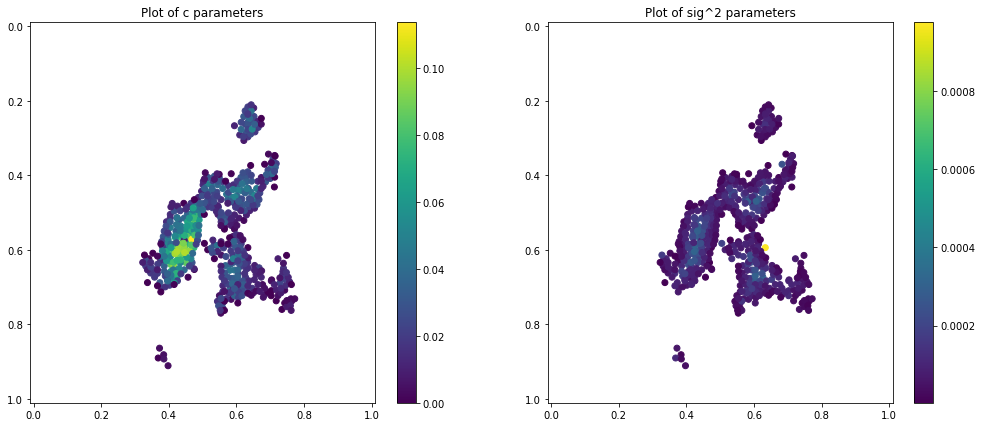

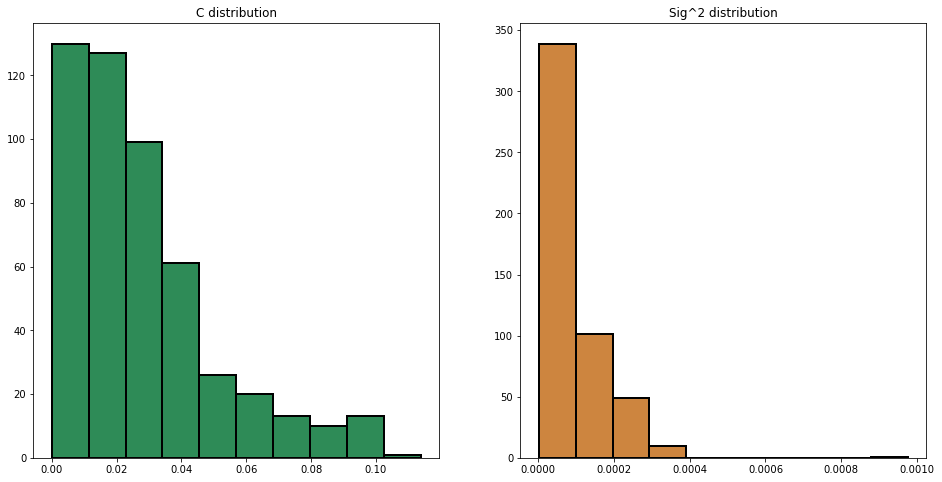

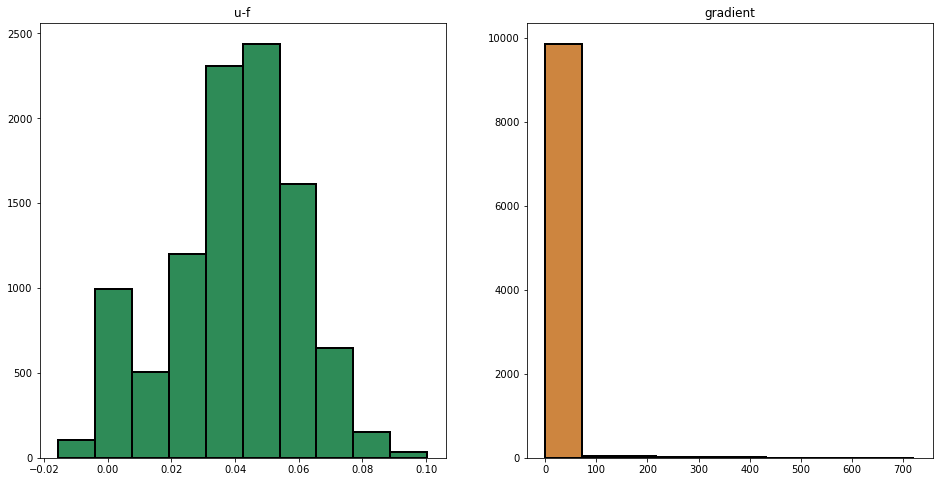

In [5]:
for elm in elm_list:
    print('#'*90)
    print('Processing {0} centers example'.format(len(elm.c)))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    # for memory reasons
    # del elm.data; del elm.mask; del elm.dfunc
    
# pickling results
target = open("../results/exp01_m{0}_orion.pkl".format(method), "wb")
pickle.dump(elm_list, target)
target.close()

In [6]:
# max and min sigma allowed
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

method = 2
elm_list = list()

for Nc in range(50, 501, 25):
    # number of points of each type
    Nb = int(0.2*Nc)
    Ne = 4*Nc - Nb
    
    if method==1:
        # points generation
        center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
        collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
        boundary_points = boundary_points_generation(data, base_level, Nb)
        
    elif method==2:    
        # points generation
        points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
        center_points = points[0:Nc]
        collocation_points = points[0:Ne]
        boundary_points = boundary_points_generation(data, base_level, Nb)
    
    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]
    
#    # visualizing the choosen points
#    points_plot(data, center_points=center_points, title="Center Points")
#    points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


#    solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#    params_plot(c0, sig0, xc, yc)
#    params_distribution_plot(c0, sig0)
    elm_list.append(ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0., b=0., d1psi1=d1psi, 
                    d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1., minsig=minsig, maxsig=maxsig))

##########################################################################################
Processing 50 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 20100.
nfev: 20113

Residual stats:
Residual RMS: 0.04160941763296796
Residual Variance: 0.001731090322385981
Flux Lost: 0.056746805842501614
Flux Addition: 0.05439129909037525
psi1(u-f): 0.5919477190017606
Exceeded Pixels: 482
Sharpness: 41.345464083337056
psi2(grad u): 2.2794920175549445
Total elapsed time: 6.701583385467529 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.06127860012865575
Mean min distance between collocation and center point

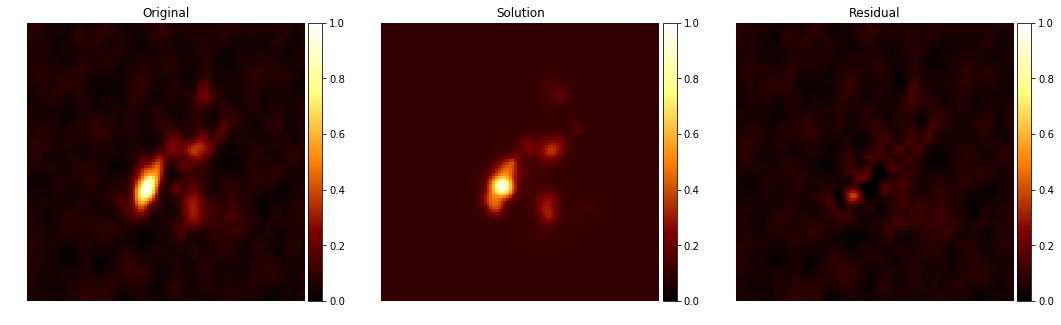

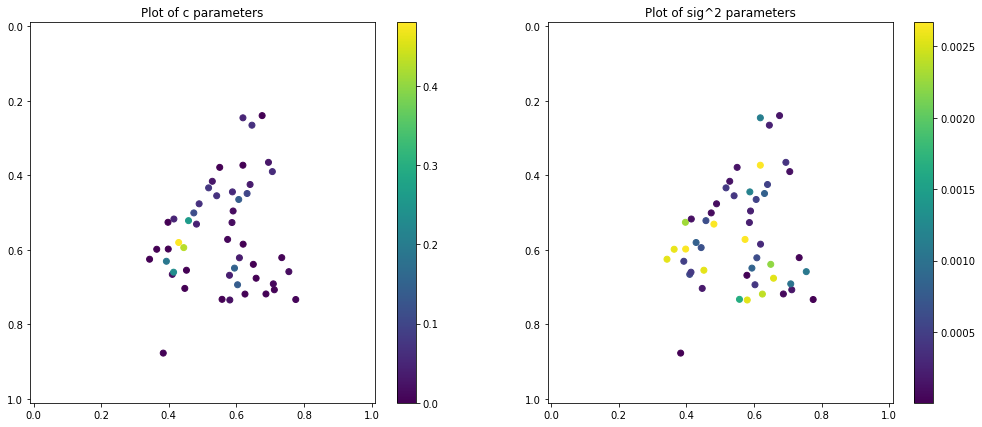

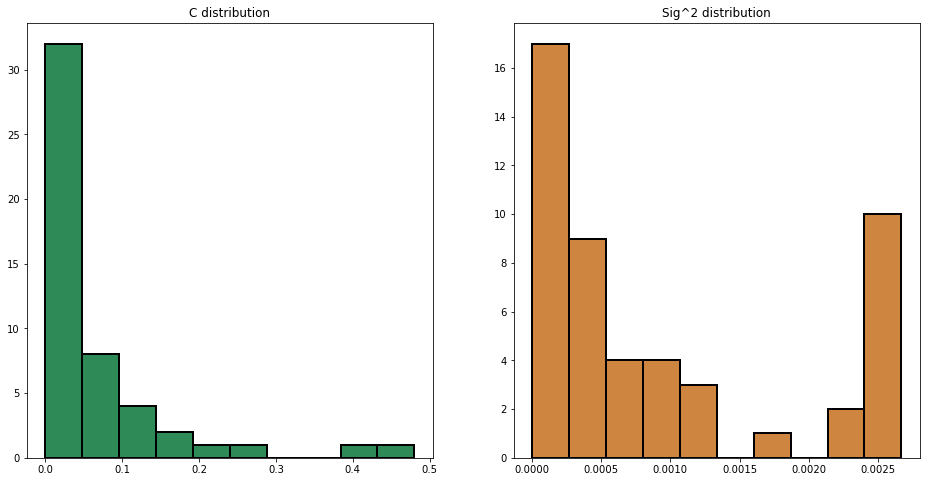

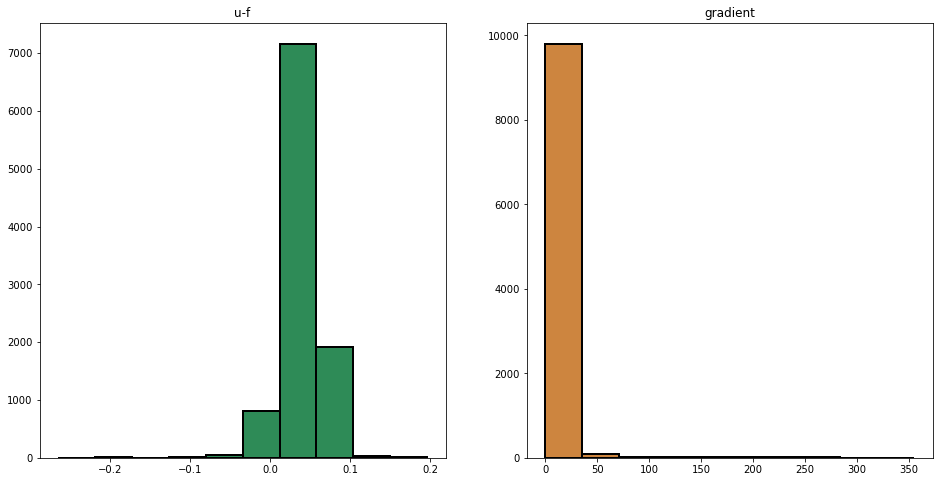

##########################################################################################
Processing 75 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 30100.
nfev: 30114

Residual stats:
Residual RMS: 0.012706841298585748
Residual Variance: 0.00016085787927335056
Flux Lost: 0.02318165265206458
Flux Addition: 0.01953857137638996
psi1(u-f): 0.013483942610986458
Exceeded Pixels: 474
Sharpness: 44.956038113331196
psi2(grad u): 3.7567940981981427
Total elapsed time: 14.095894575119019 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0503700629338492
Mean min distance between collocation and center p

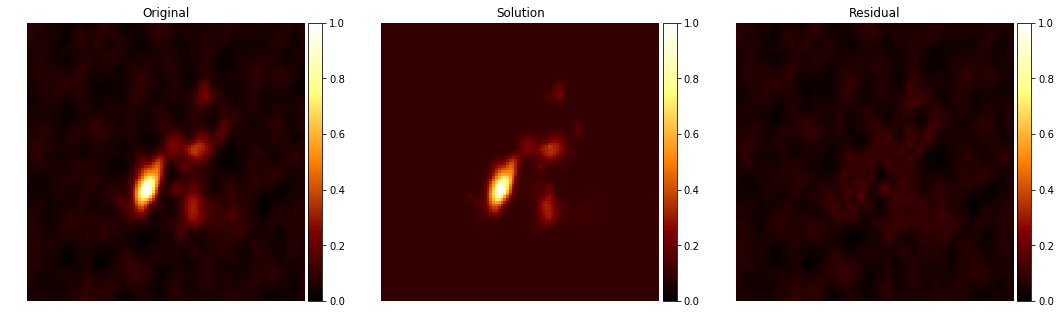

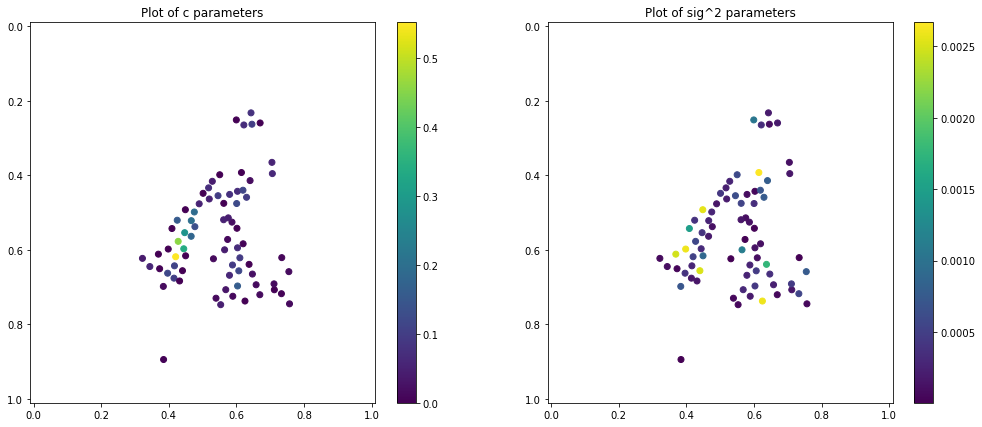

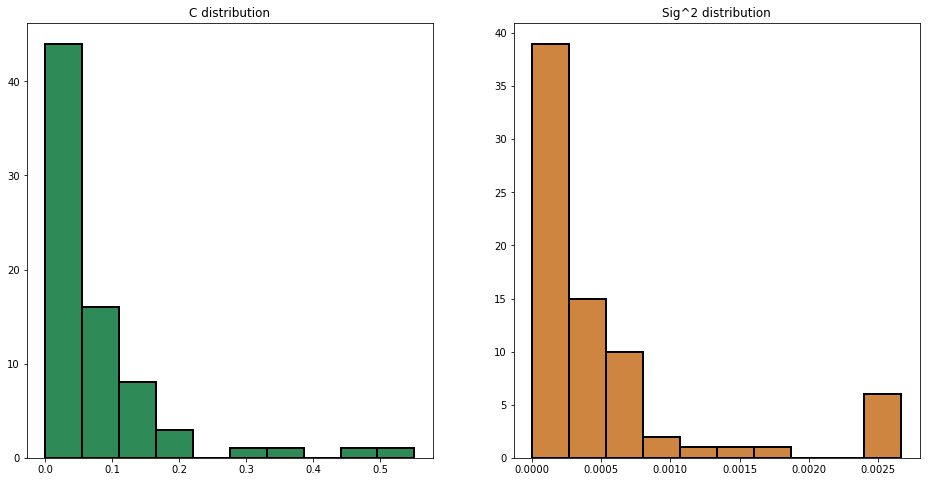

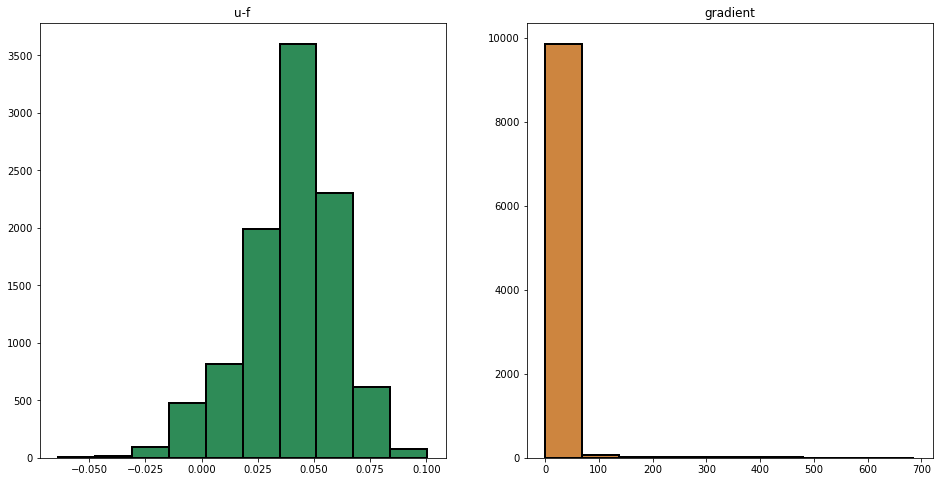

##########################################################################################
Processing 100 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 40100.
nfev: 40110

Residual stats:
Residual RMS: 0.009188204147949382
Residual Variance: 8.3992276825725e-05
Flux Lost: 0.016994125111022697
Flux Addition: 0.013922257178979831
psi1(u-f): 0.006791235734198955
Exceeded Pixels: 454
Sharpness: 45.18883816374387
psi2(grad u): 3.7710041041516025
Total elapsed time: 27.683220148086548 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03748409513003185
Mean min distance between collocation and center p

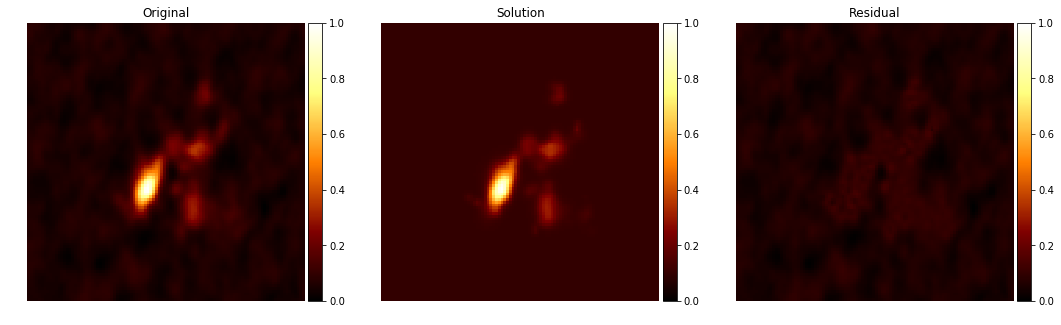

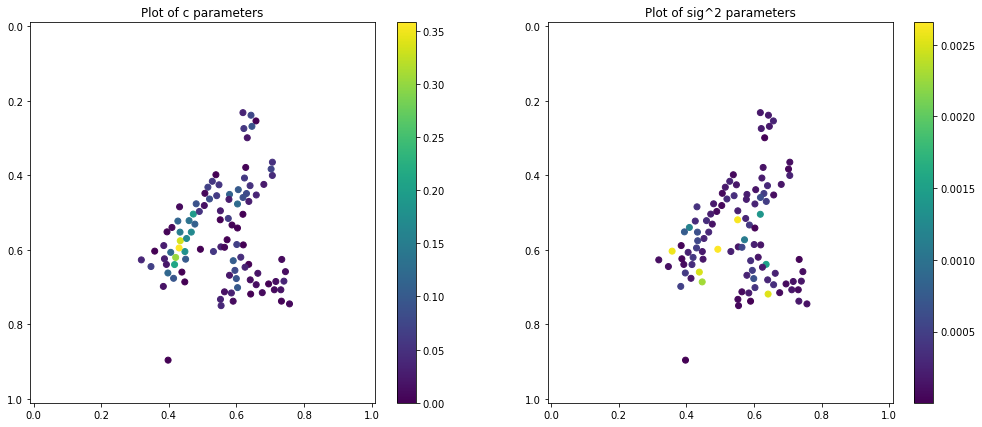

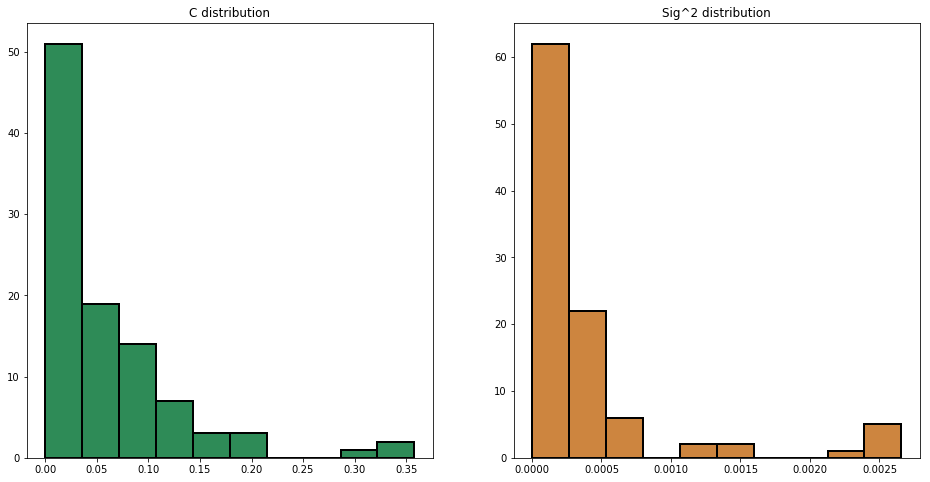

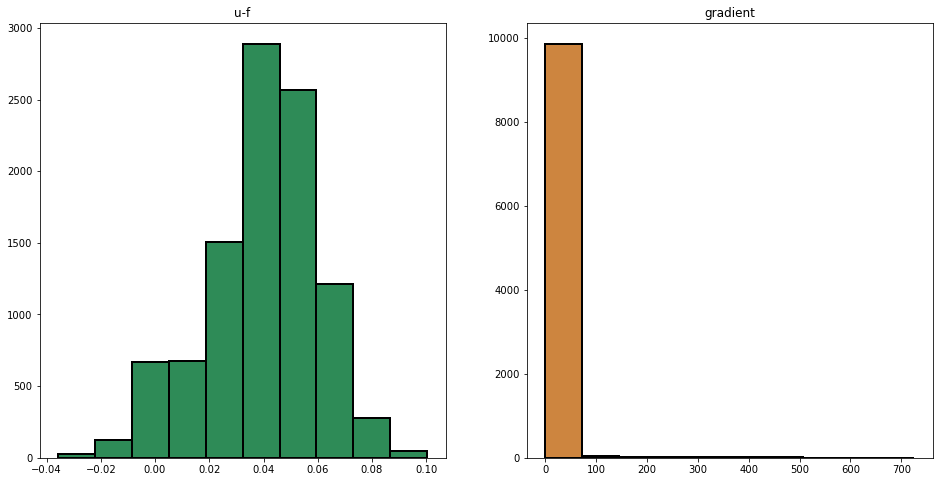

##########################################################################################
Processing 125 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 50100.
nfev: 50111

Residual stats:
Residual RMS: 0.0064811930132122
Residual Variance: 4.180095832418685e-05
Flux Lost: 0.01174044582632257
Flux Addition: 0.009621932990558997
psi1(u-f): 0.0026863445012895388
Exceeded Pixels: 459
Sharpness: 45.86524226498229
psi2(grad u): 3.83164257792688
Total elapsed time: 43.62542104721069 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03268550647991752
Mean min distance between collocation and center poin

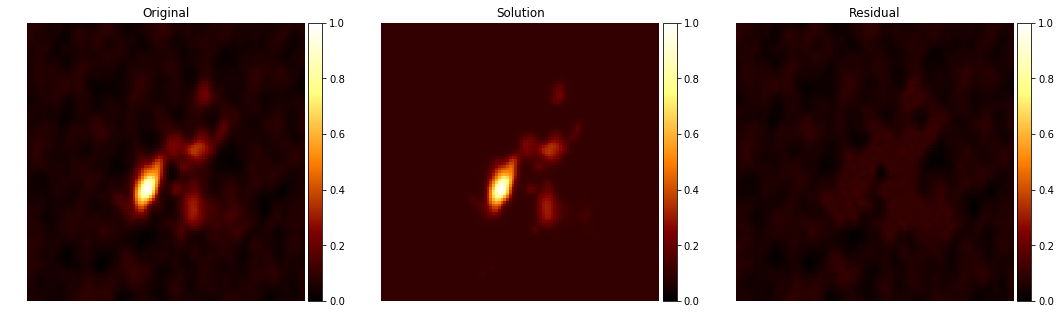

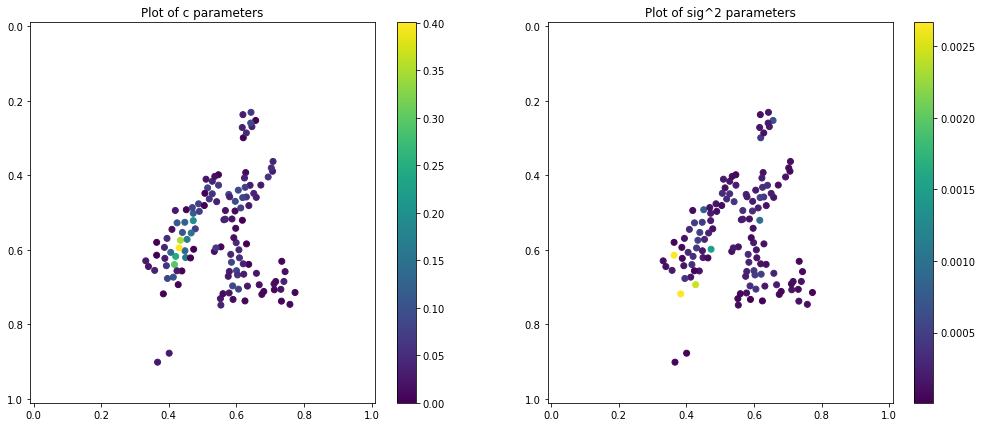

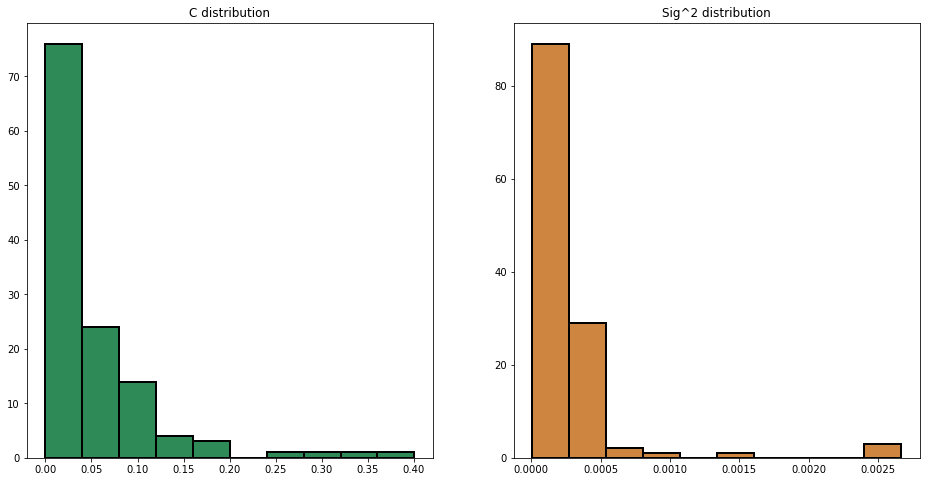

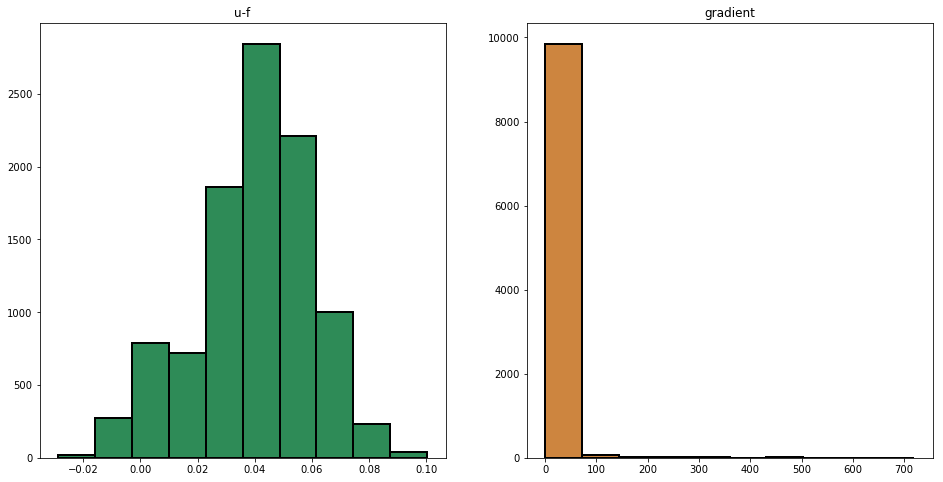

##########################################################################################
Processing 150 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 60100.
nfev: 60116

Residual stats:
Residual RMS: 0.005776115354632634
Residual Variance: 3.3152387022855005e-05
Flux Lost: 0.009984308993849021
Flux Addition: 0.007833897370934787
psi1(u-f): 0.00381443936915497
Exceeded Pixels: 451
Sharpness: 45.87510367691093
psi2(grad u): 3.8926712857393246
Total elapsed time: 71.456209897995 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.029438355540819704
Mean min distance between collocation and center p

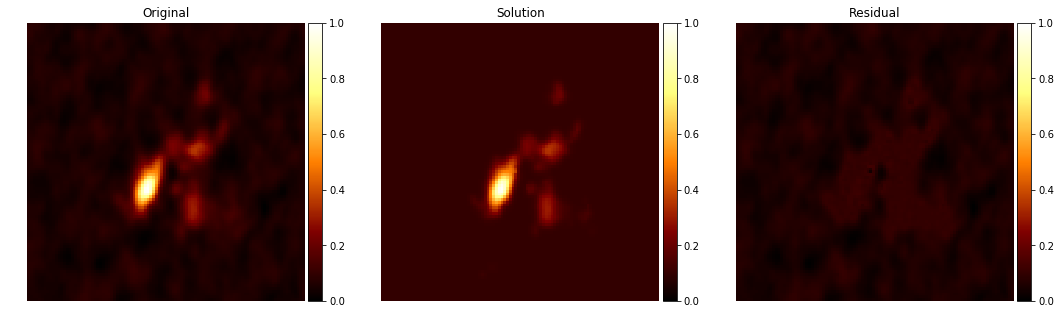

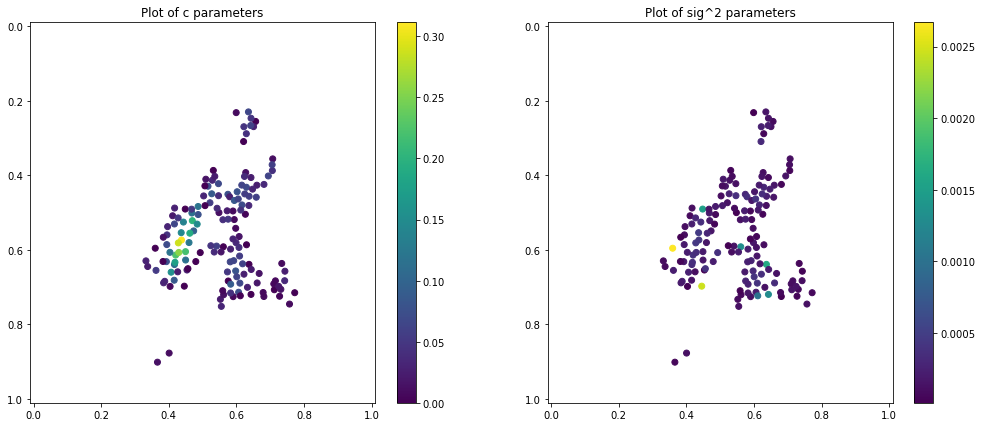

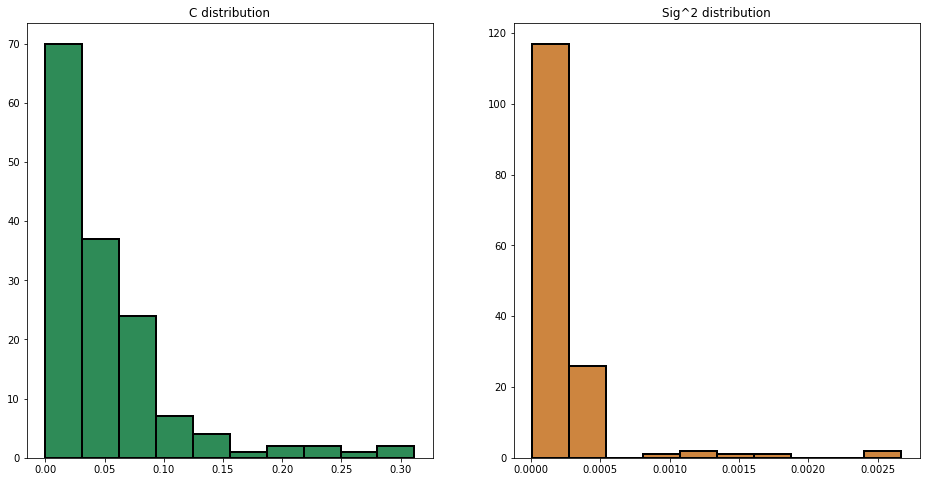

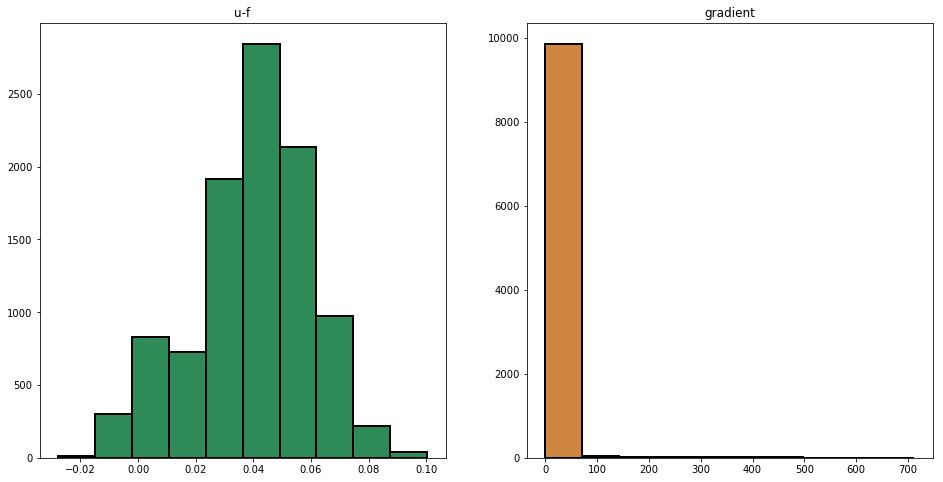

##########################################################################################
Processing 175 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 70100.
nfev: 70112

Residual stats:
Residual RMS: 0.005198025328194337
Residual Variance: 2.6651642344764685e-05
Flux Lost: 0.00968005499438124
Flux Addition: 0.006841639943554687
psi1(u-f): 0.0015537058545052884
Exceeded Pixels: 420
Sharpness: 45.63959780201089
psi2(grad u): 3.869504388153878
Total elapsed time: 109.45241045951843 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02942907025371482
Mean min distance between collocation and center

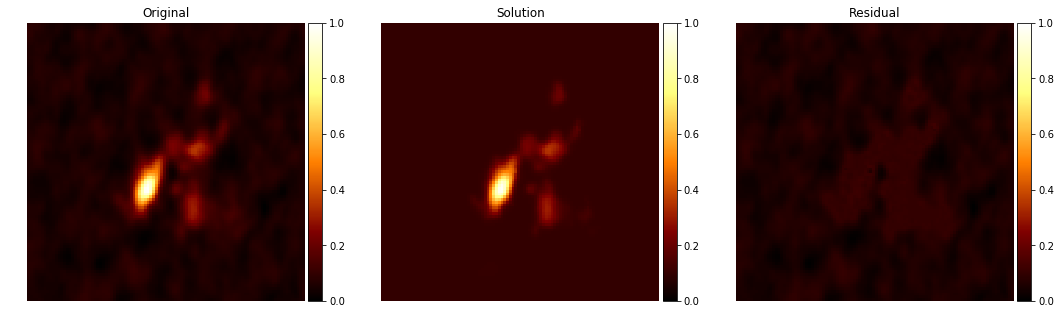

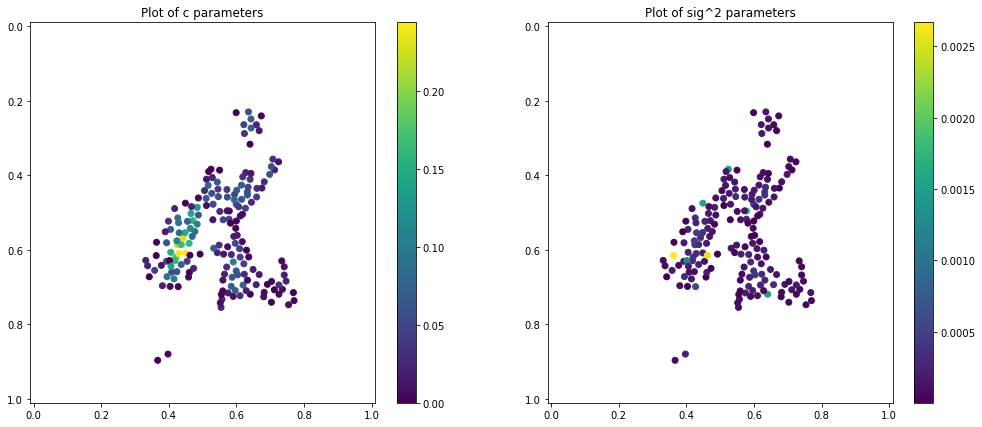

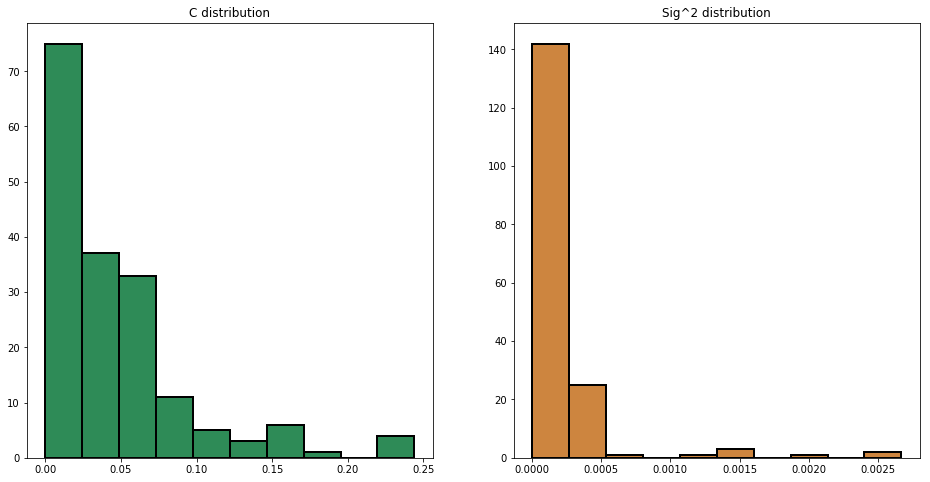

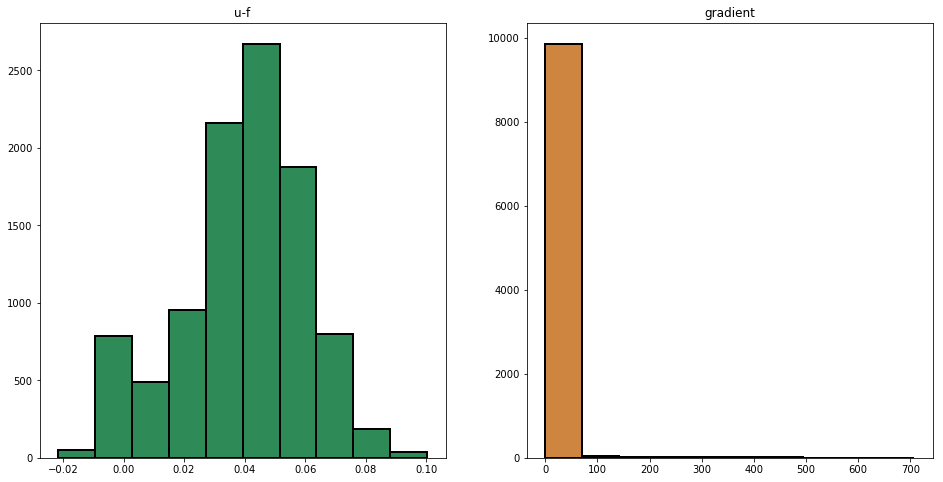

##########################################################################################
Processing 200 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80112

Residual stats:
Residual RMS: 0.005030896505567768
Residual Variance: 2.4950248916094113e-05
Flux Lost: 0.008995069796132994
Flux Addition: 0.006188293186873288
psi1(u-f): 0.0025444092574490366
Exceeded Pixels: 422
Sharpness: 45.86645857002499
psi2(grad u): 3.8845339881537715
Total elapsed time: 154.44917678833008 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.028547369147423222
Mean min distance between collocation and cen

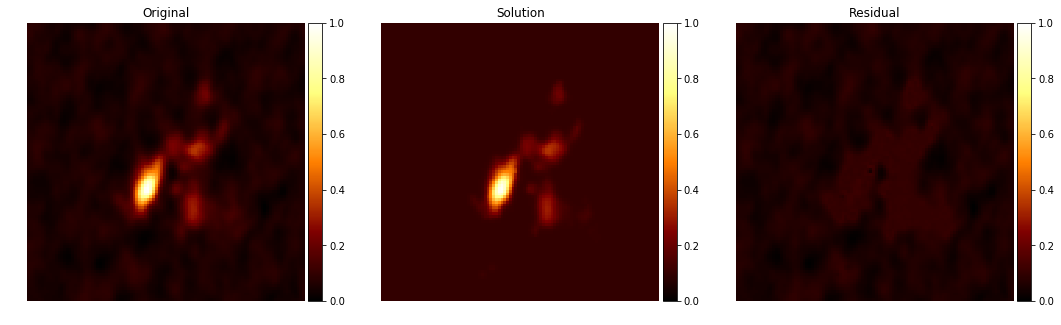

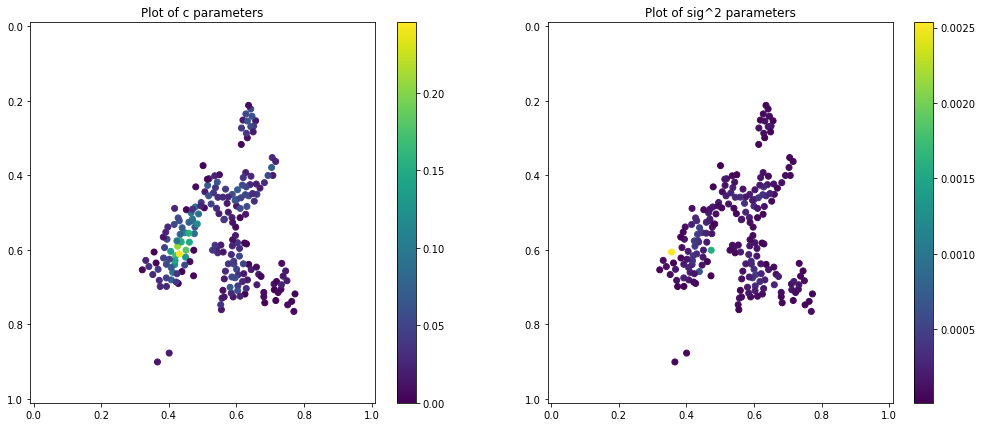

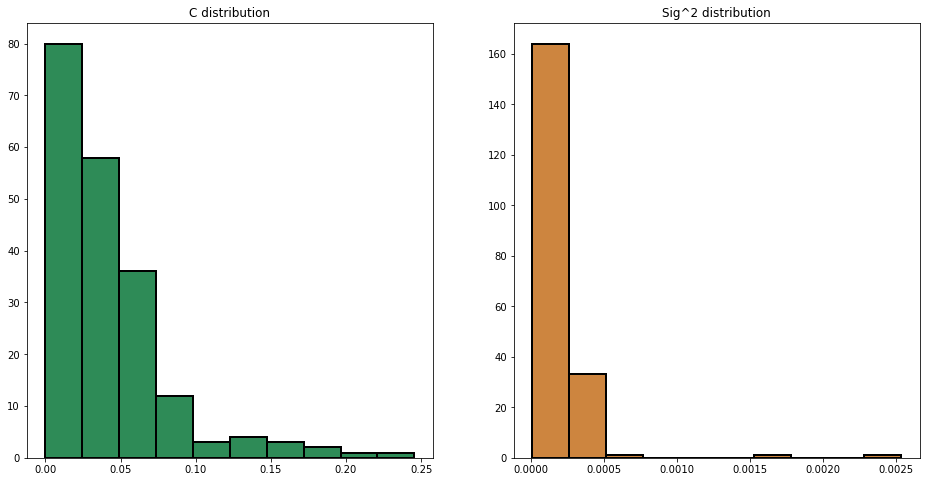

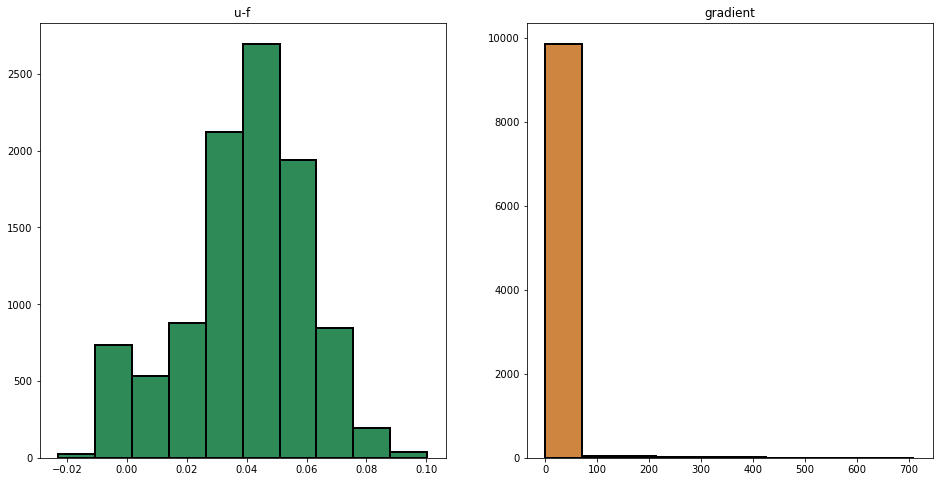

##########################################################################################
Processing 225 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 90100.
nfev: 90115

Residual stats:
Residual RMS: 0.004976172310515816
Residual Variance: 2.456617323012417e-05
Flux Lost: 0.009239628466698709
Flux Addition: 0.007167037406218515
psi1(u-f): 0.001311785863964211
Exceeded Pixels: 430
Sharpness: 45.70969516195734
psi2(grad u): 3.8517932986738477
Total elapsed time: 233.85171914100647 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.027389144651200886
Mean min distance between collocation and cente

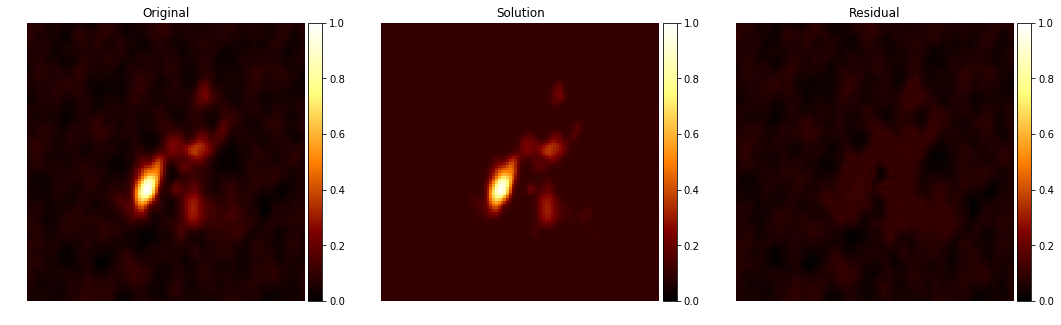

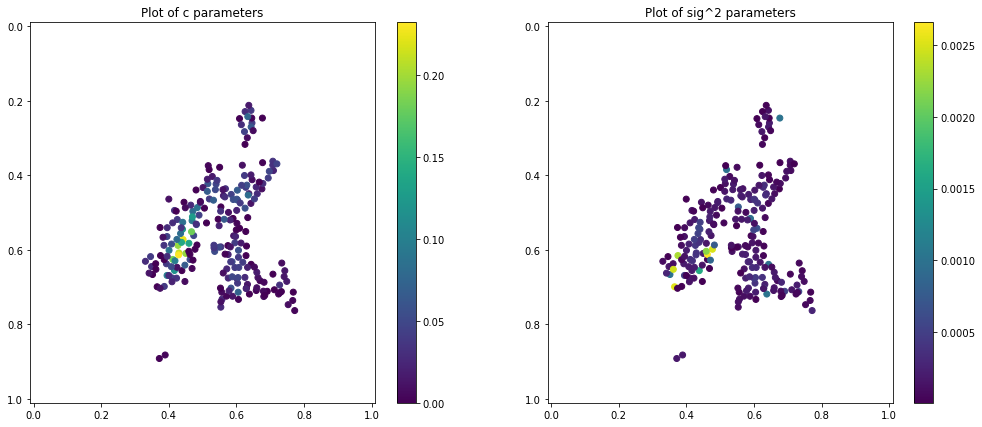

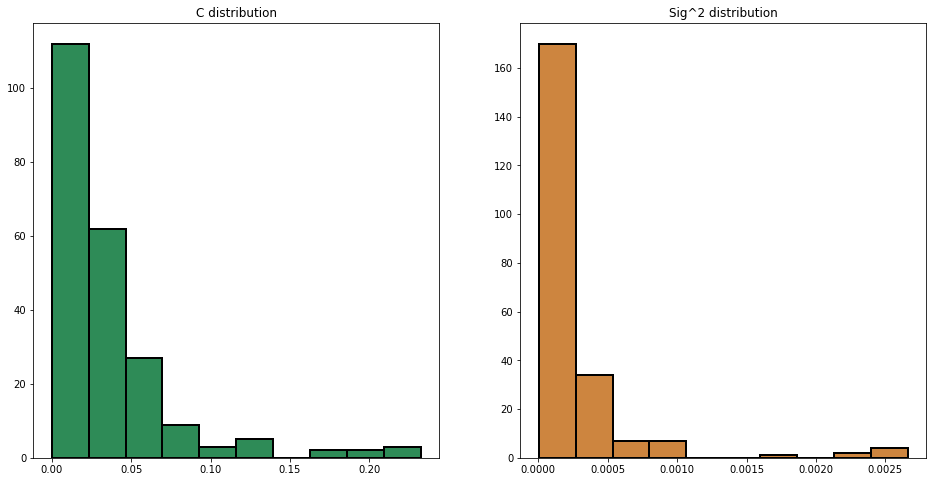

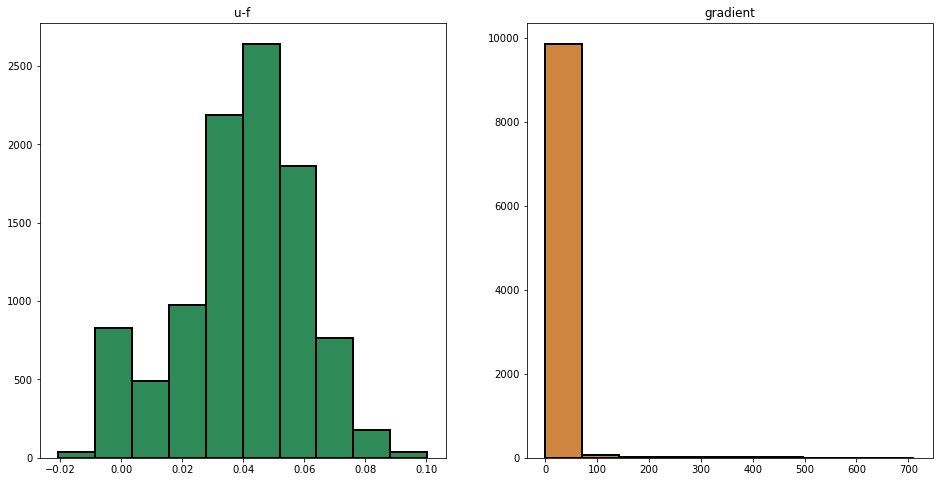

##########################################################################################
Processing 250 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100112

Residual stats:
Residual RMS: 0.00441547794684059
Residual Variance: 1.927416291567407e-05
Flux Lost: 0.008124847784547504
Flux Addition: 0.0059183270341059985
psi1(u-f): 0.0008335480296490477
Exceeded Pixels: 441
Sharpness: 45.706981285550285
psi2(grad u): 3.8527806617138602
Total elapsed time: 304.0782690048218 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02829920492830794
Mean min distance between collocation and cen

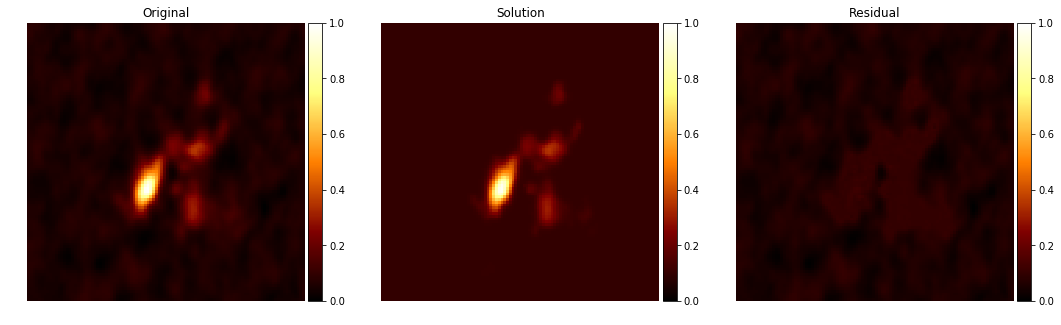

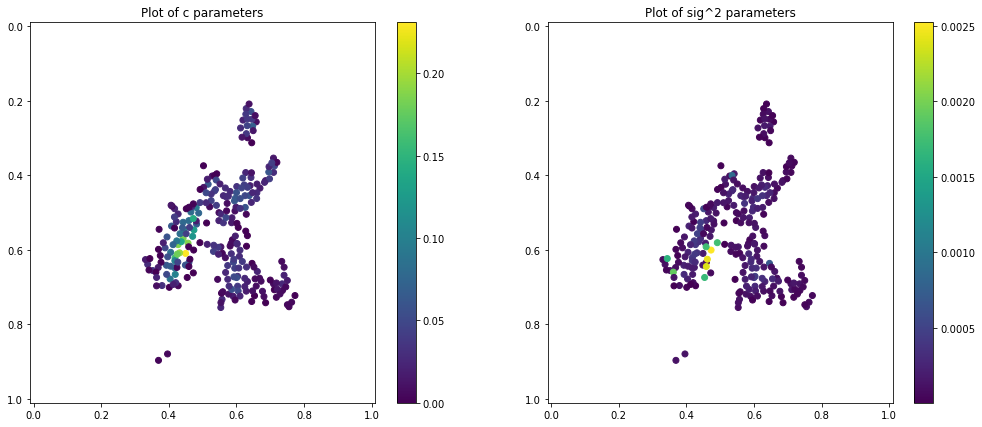

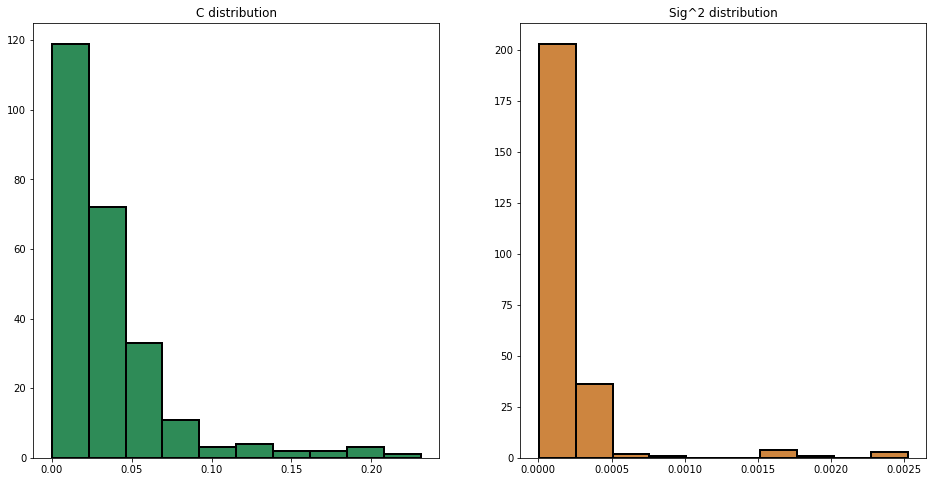

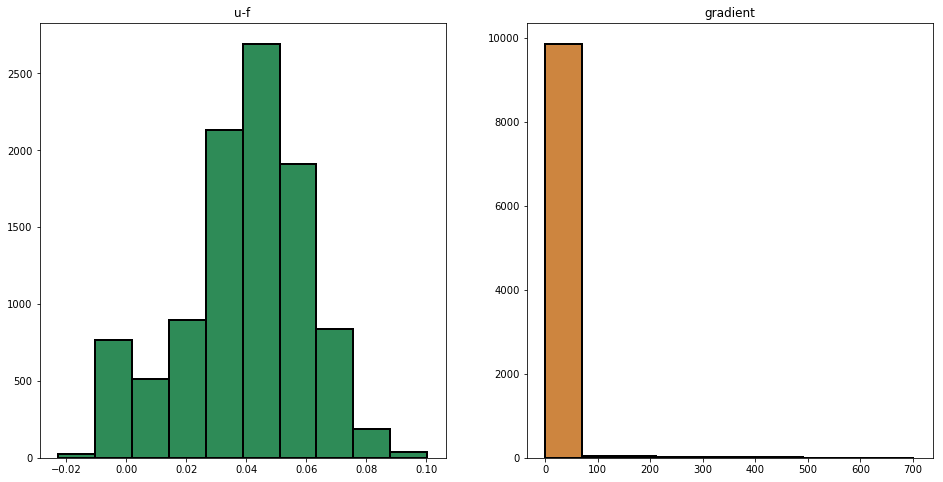

##########################################################################################
Processing 275 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 110100.
nfev: 110111

Residual stats:
Residual RMS: 0.003952240073445276
Residual Variance: 1.5366804141948957e-05
Flux Lost: 0.007604525064047009
Flux Addition: 0.005248627388842513
psi1(u-f): 0.0004685184597517241
Exceeded Pixels: 432
Sharpness: 45.792491829361836
psi2(grad u): 3.8747387542181437
Total elapsed time: 397.24523639678955 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.022210690199069474
Mean min distance between collocation and 

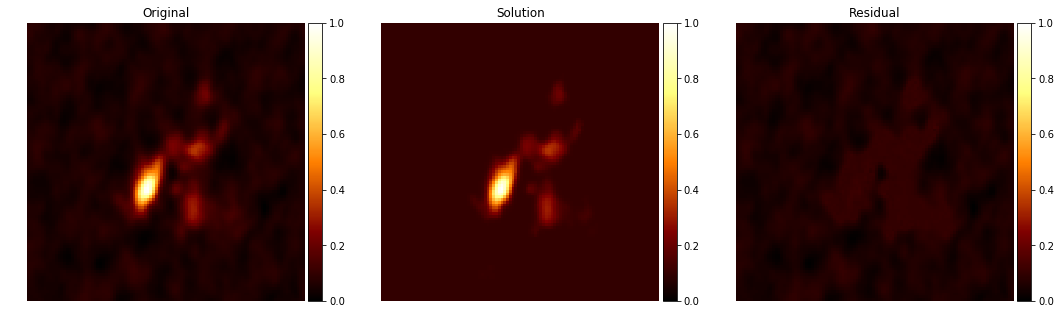

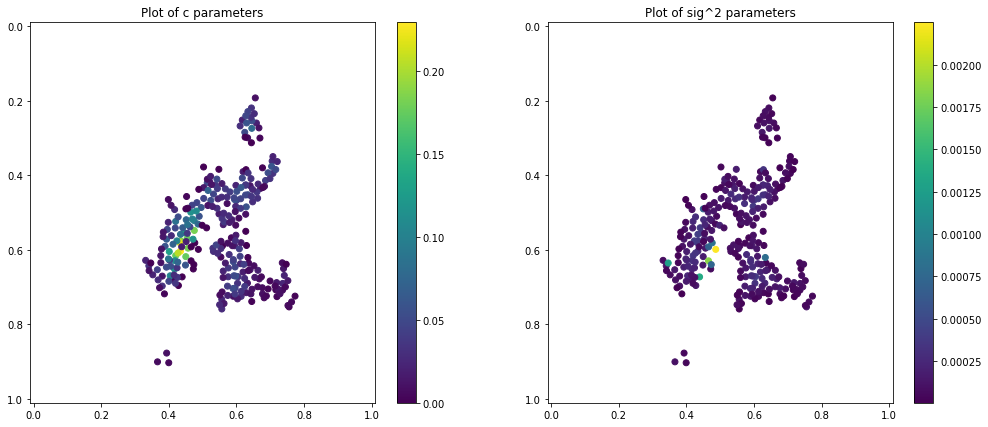

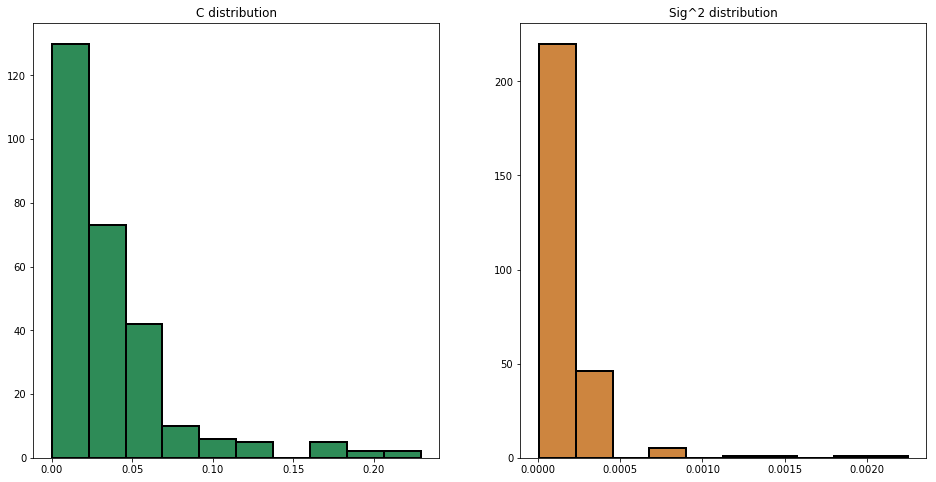

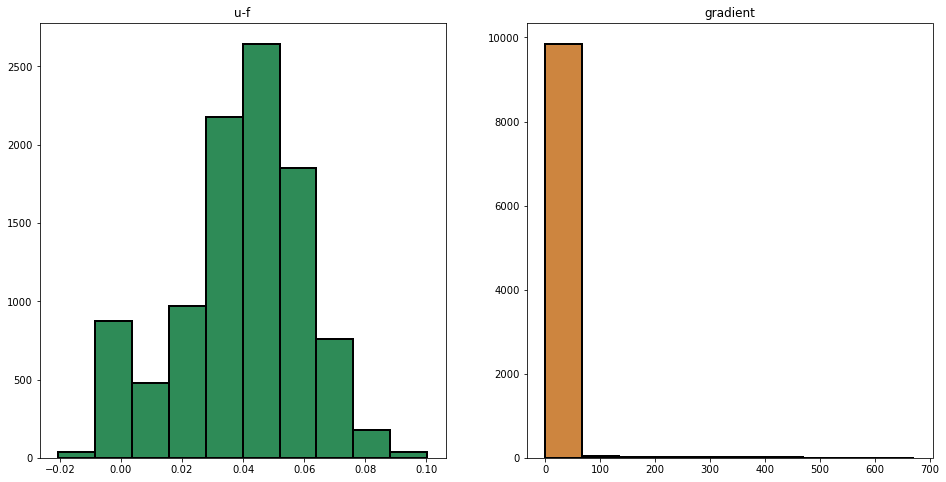

##########################################################################################
Processing 300 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120119

Residual stats:
Residual RMS: 0.004243049191287635
Residual Variance: 1.785683544152058e-05
Flux Lost: 0.007671069078621158
Flux Addition: 0.0058789445100202445
psi1(u-f): 0.0009053402881691934
Exceeded Pixels: 431
Sharpness: 45.85557178285993
psi2(grad u): 3.8741619287772555
Total elapsed time: 501.7993588447571 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.021539566979488285
Mean min distance between collocation and ce

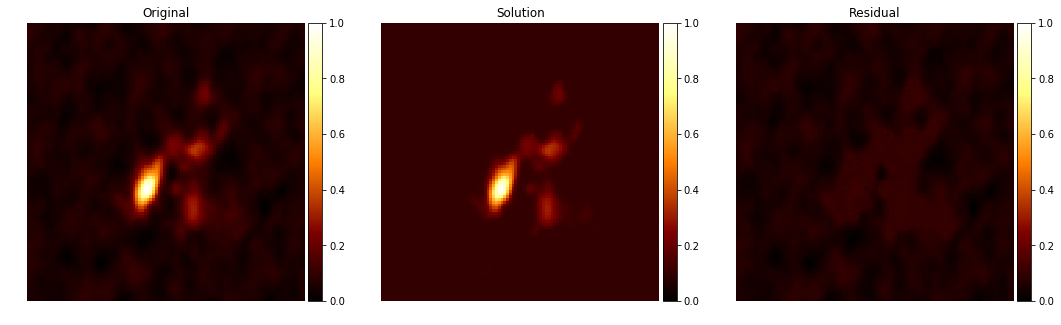

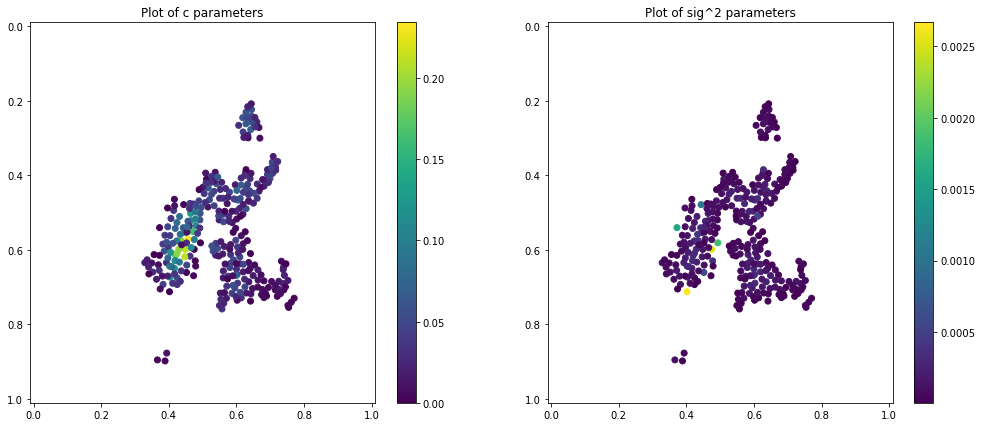

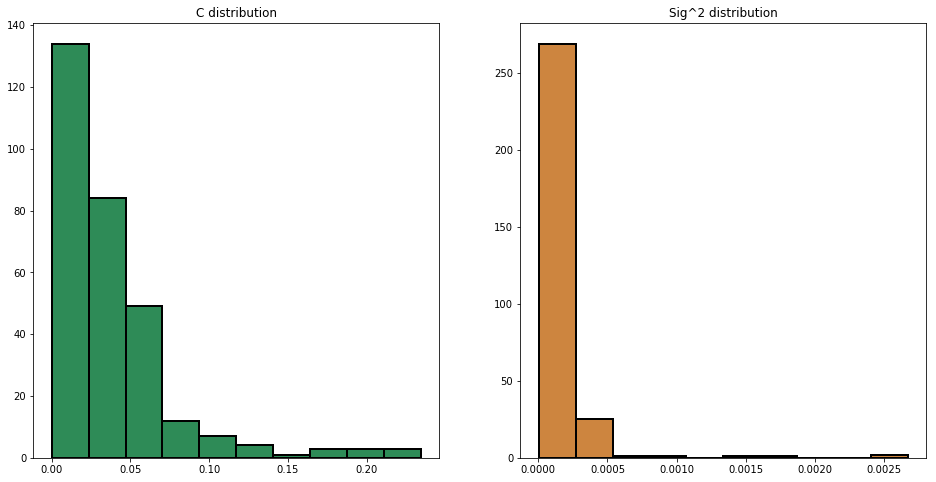

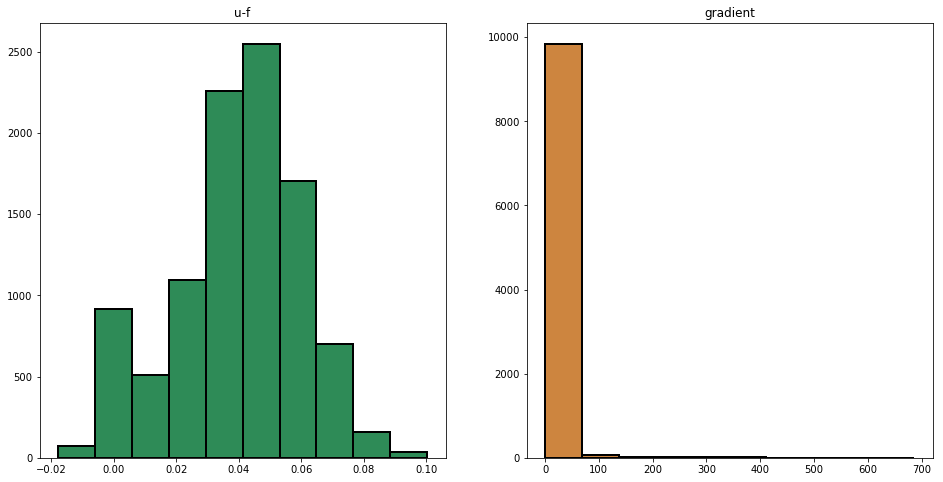

##########################################################################################
Processing 325 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 130100.
nfev: 130111

Residual stats:
Residual RMS: 0.003884853191960365
Residual Variance: 1.4858203369087284e-05
Flux Lost: 0.007305882030221677
Flux Addition: 0.005042526772005494
psi1(u-f): 0.000631593176689241
Exceeded Pixels: 417
Sharpness: 45.8356819009152
psi2(grad u): 3.874929272274206
Total elapsed time: 628.0696475505829 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.021836595267869997
Mean min distance between collocation and cente

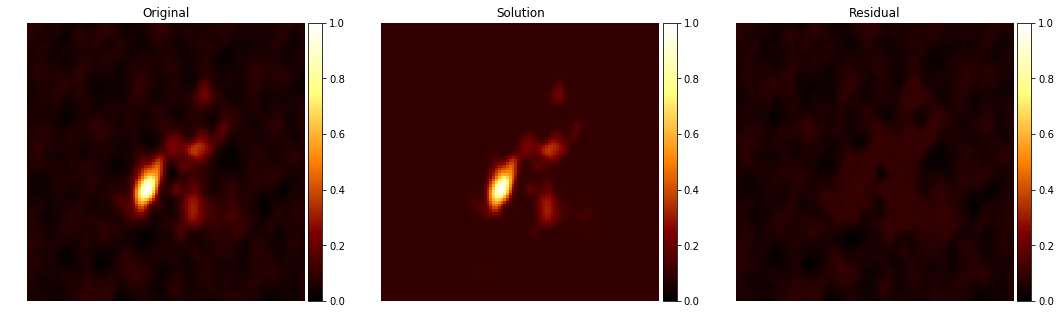

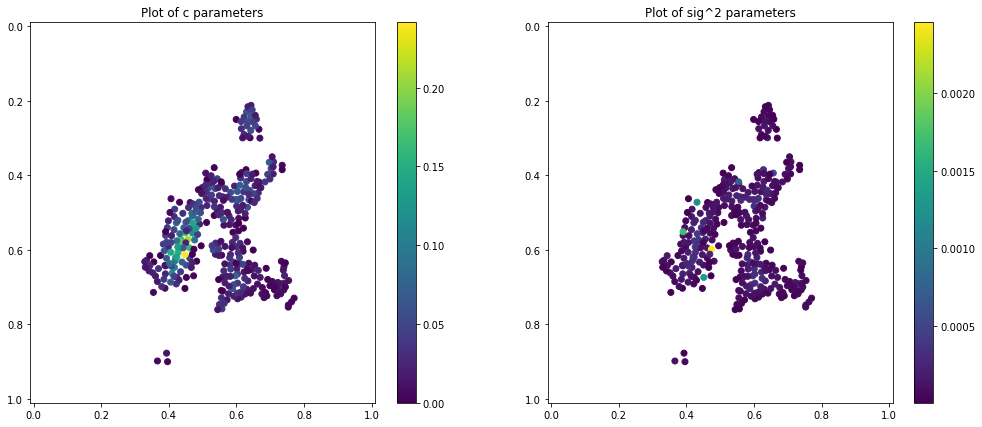

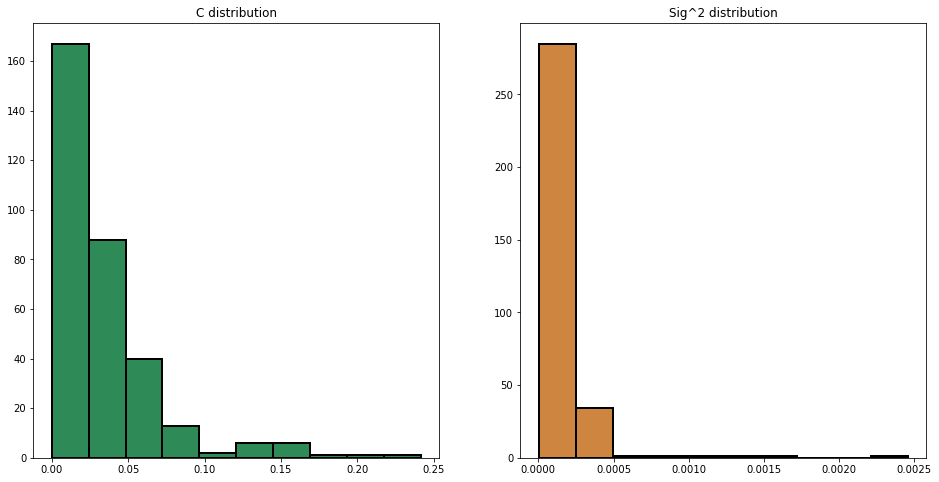

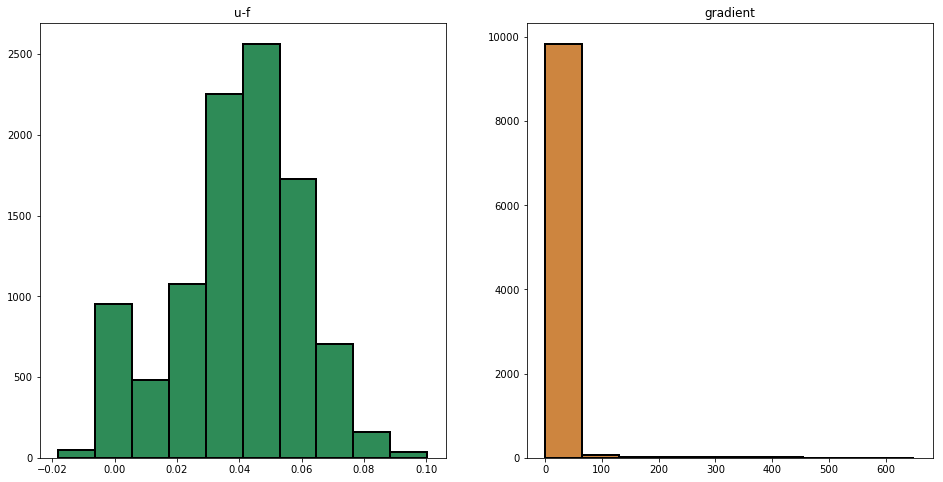

##########################################################################################
Processing 350 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 140100.
nfev: 140111

Residual stats:
Residual RMS: 0.004056966782497791
Residual Variance: 1.627099094592533e-05
Flux Lost: 0.007185036691761524
Flux Addition: 0.005155854827049258
psi1(u-f): 0.0011205271272878934
Exceeded Pixels: 432
Sharpness: 45.85033230242273
psi2(grad u): 3.876831258220289
Total elapsed time: 754.9286253452301 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02012066632733615
Mean min distance between collocation and cente

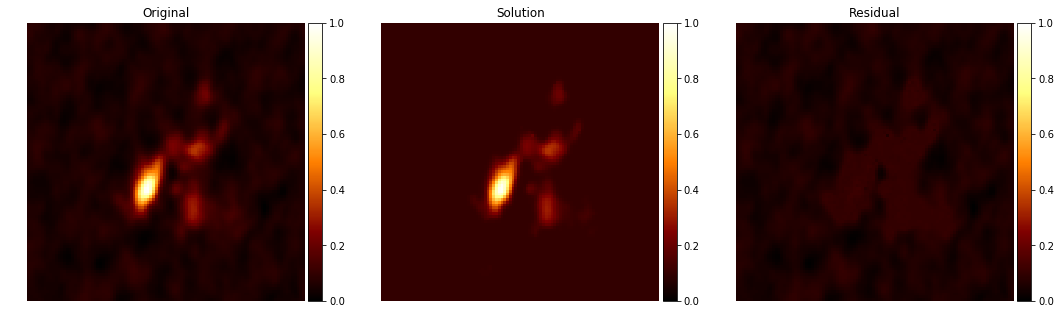

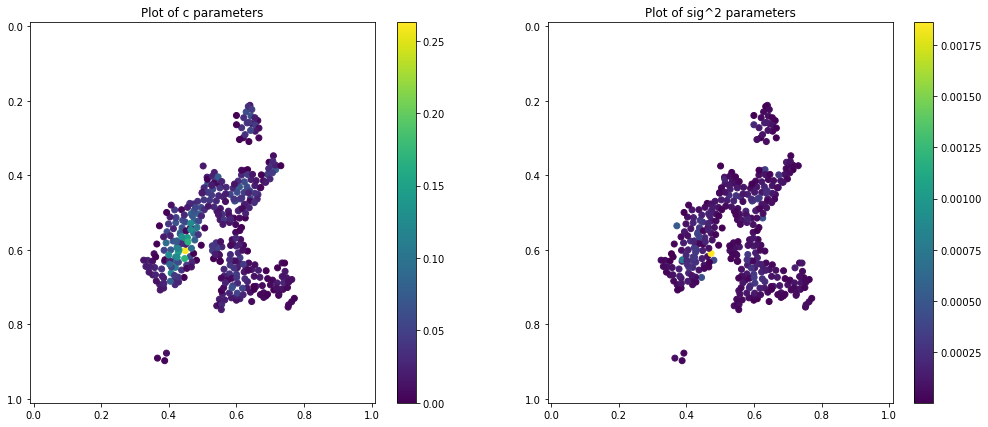

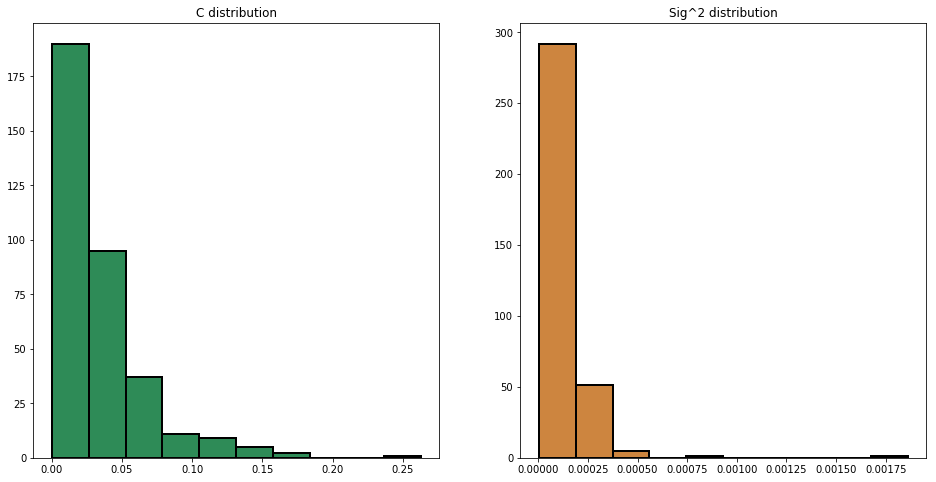

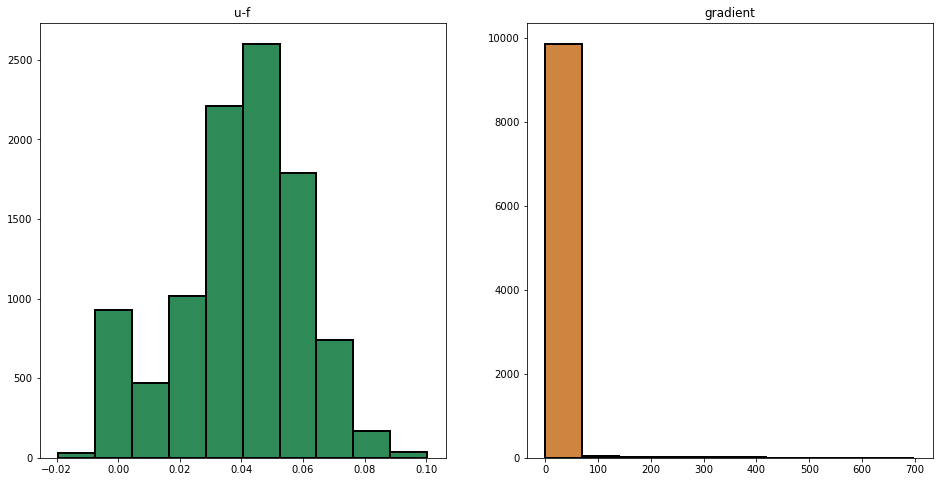

##########################################################################################
Processing 375 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 150100.
nfev: 150113

Residual stats:
Residual RMS: 0.003696979800216595
Residual Variance: 1.3499584469439762e-05
Flux Lost: 0.006902189054693121
Flux Addition: 0.004983489023171262
psi1(u-f): 0.0004174661359516241
Exceeded Pixels: 440
Sharpness: 45.79792254733704
psi2(grad u): 3.881201873427204
Total elapsed time: 913.9657900333405 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.021001330080326057
Mean min distance between collocation and cen

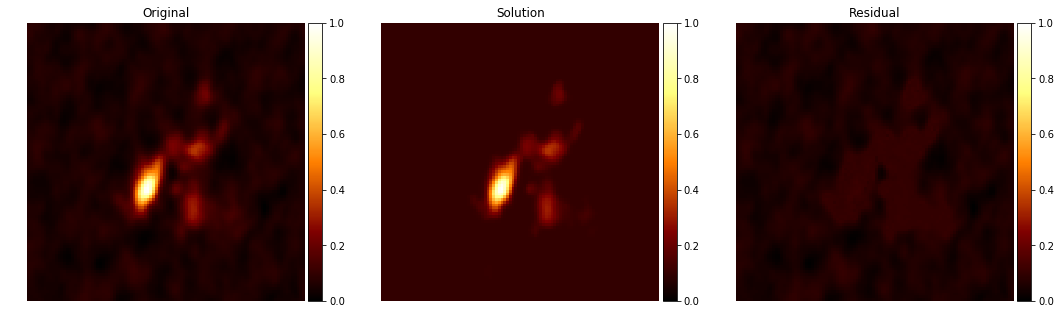

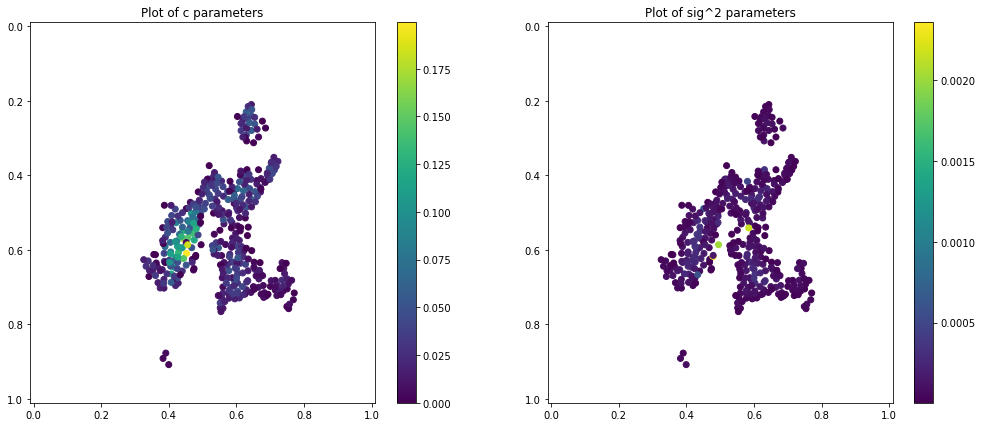

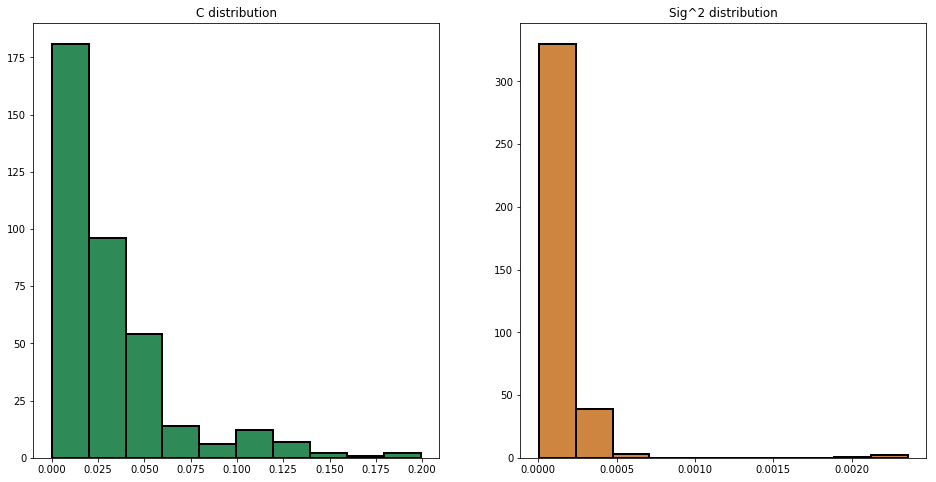

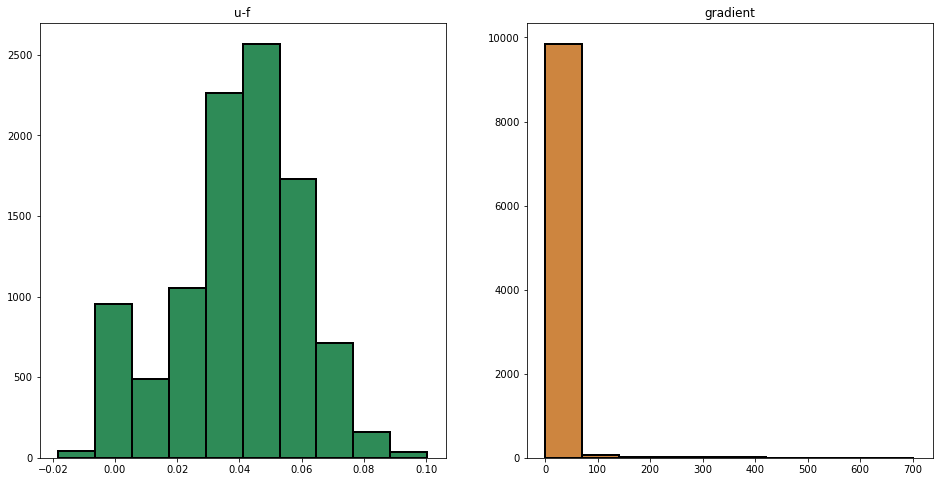

##########################################################################################
Processing 400 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 160100.
nfev: 160112

Residual stats:
Residual RMS: 0.0036915777387527536
Residual Variance: 1.3373450623025945e-05
Flux Lost: 0.007052577024606768
Flux Addition: 0.004692508012978193
psi1(u-f): 0.0003384046670793676
Exceeded Pixels: 429
Sharpness: 45.768758373266515
psi2(grad u): 3.87127651780244
Total elapsed time: 994.1272532939911 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02045053614036713
Mean min distance between collocation and cen

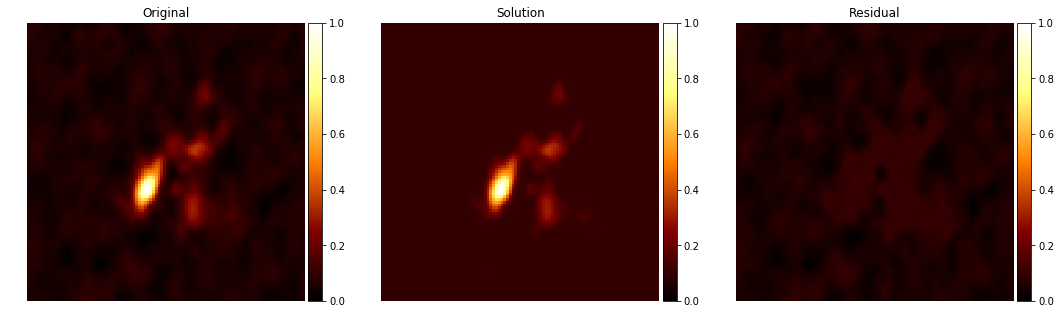

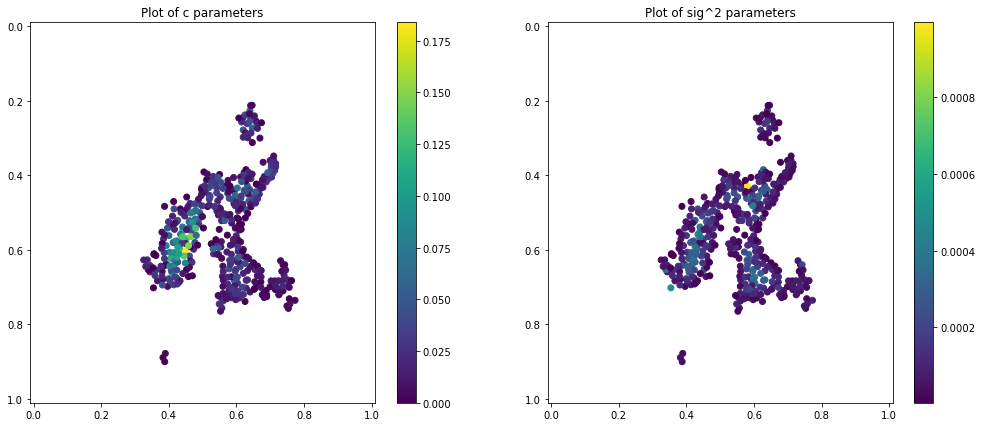

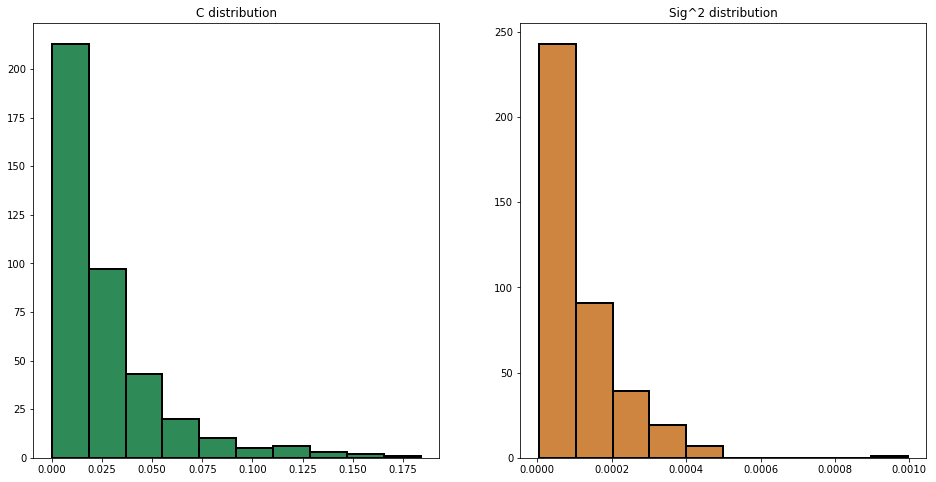

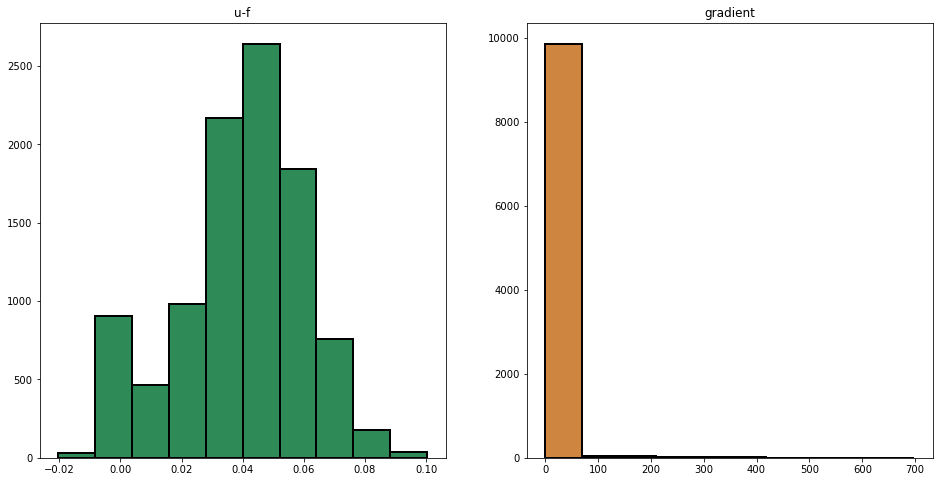

##########################################################################################
Processing 425 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 170100.
nfev: 170111

Residual stats:
Residual RMS: 0.0036829862601930096
Residual Variance: 1.3229352413119084e-05
Flux Lost: 0.00716391725172223
Flux Addition: 0.00445496946946018
psi1(u-f): 0.0003014124454290444
Exceeded Pixels: 413
Sharpness: 45.8088970227793
psi2(grad u): 3.8796327857873125
Total elapsed time: 1178.2398257255554 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.019515120657654414
Mean min distance between collocation and cen

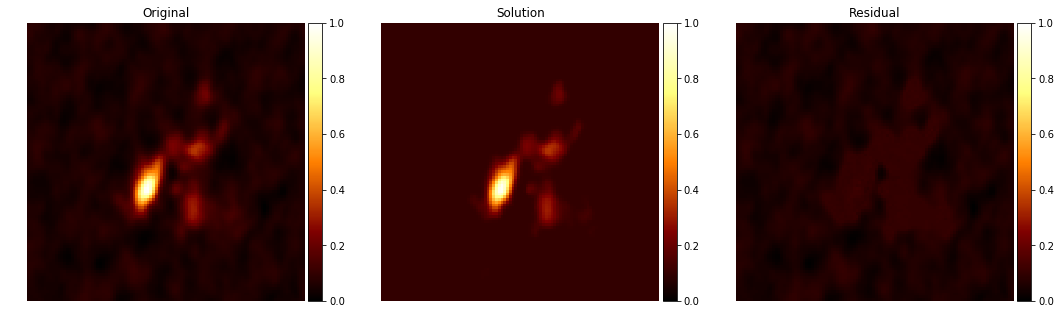

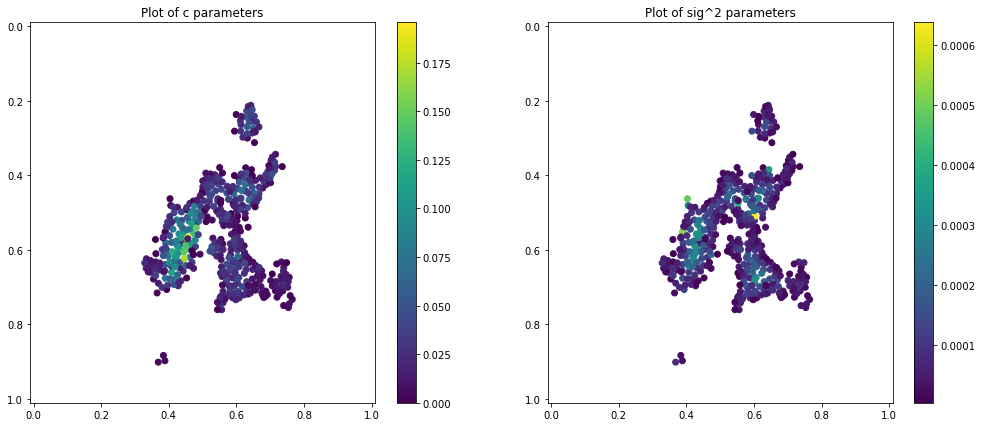

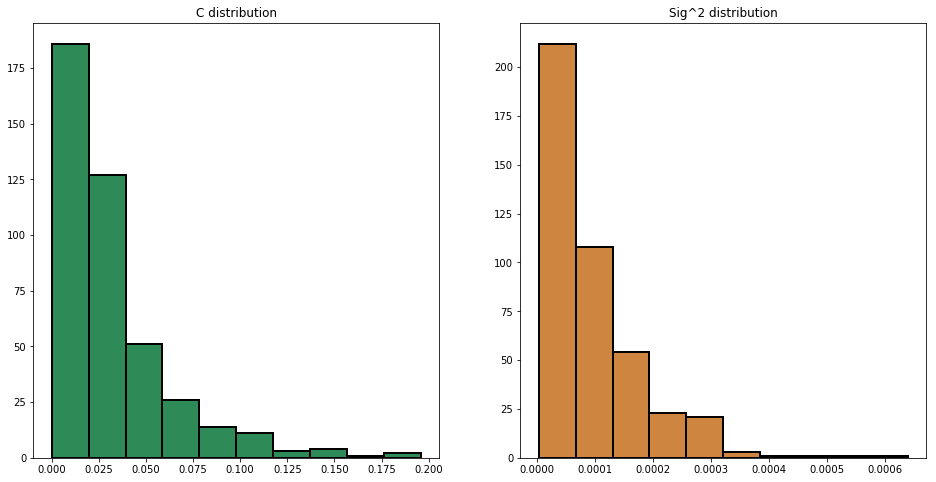

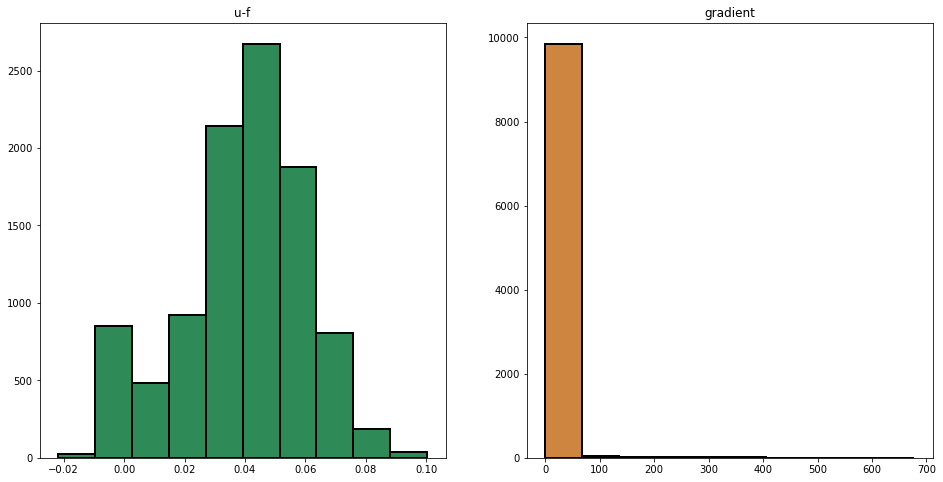

##########################################################################################
Processing 450 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 180100.
nfev: 180110

Residual stats:
Residual RMS: 0.003525410976081787
Residual Variance: 1.2177447138162427e-05
Flux Lost: 0.006830212542365785
Flux Addition: 0.004485134013719328
psi1(u-f): 0.000281141824313235
Exceeded Pixels: 423
Sharpness: 45.894743913901536
psi2(grad u): 3.877547669580978
Total elapsed time: 1360.694406747818 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.01863834315503047
Mean min distance between collocation and cent

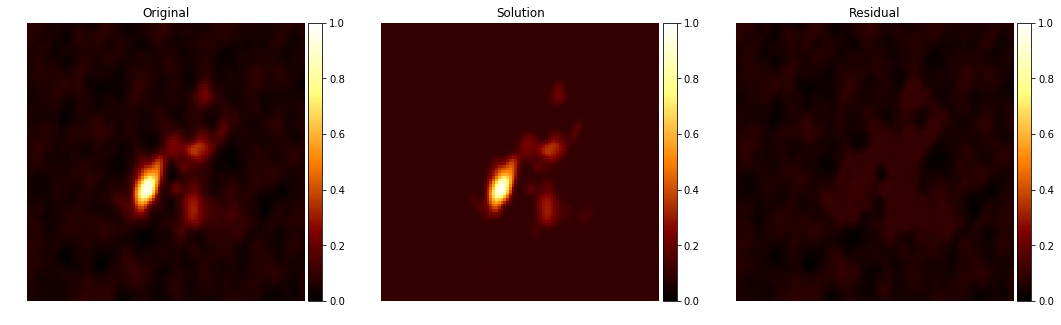

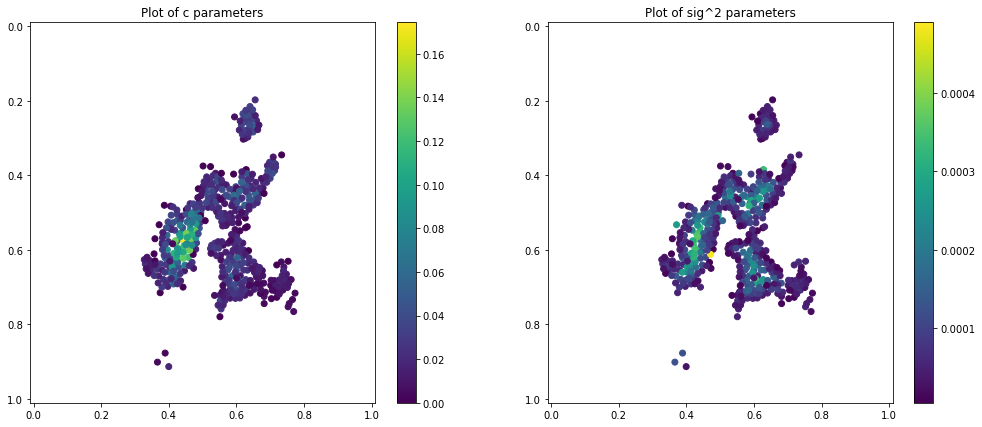

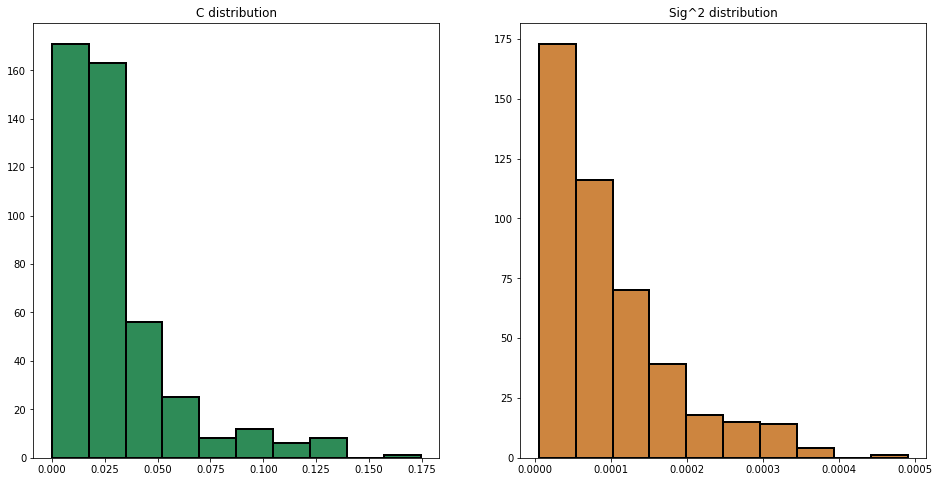

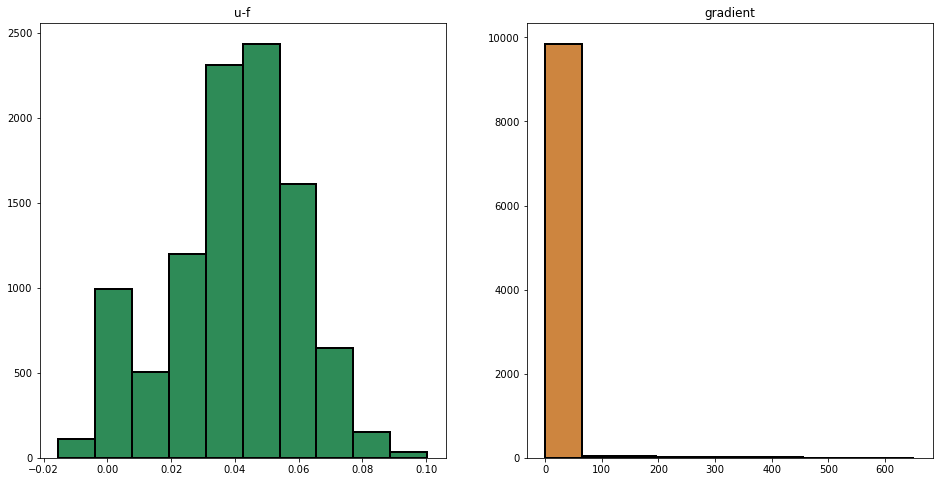

##########################################################################################
Processing 475 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 190100.
nfev: 190110

Residual stats:
Residual RMS: 0.004022817220123123
Residual Variance: 1.5945602156055653e-05
Flux Lost: 0.007004349579350315
Flux Addition: 0.004723760276927062
psi1(u-f): 0.001390553156405422
Exceeded Pixels: 441
Sharpness: 45.81295213272675
psi2(grad u): 3.8760109576509403
Total elapsed time: 1370.7115652561188 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.017174076364112983
Mean min distance between collocation and ce

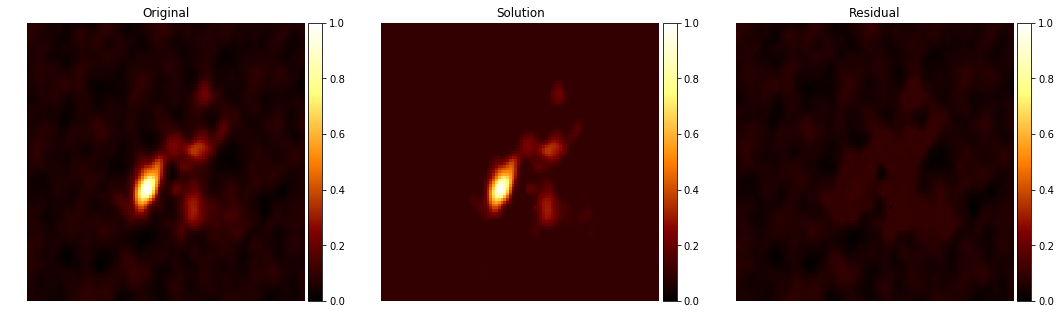

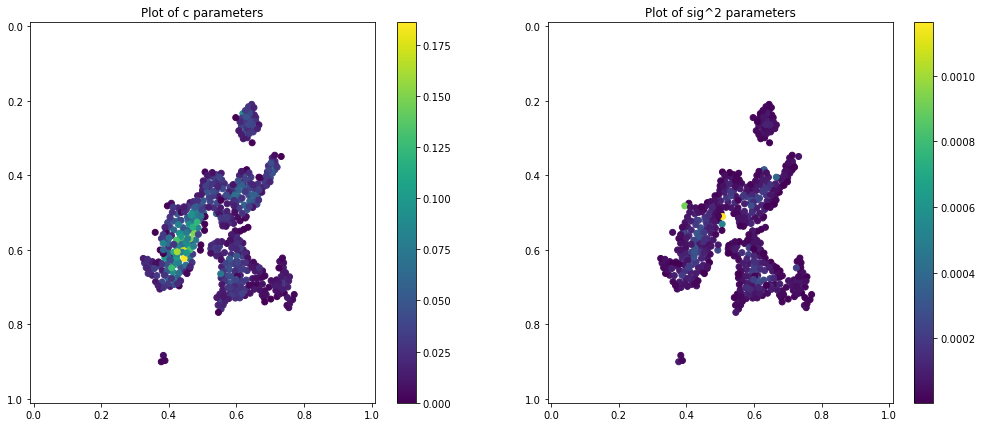

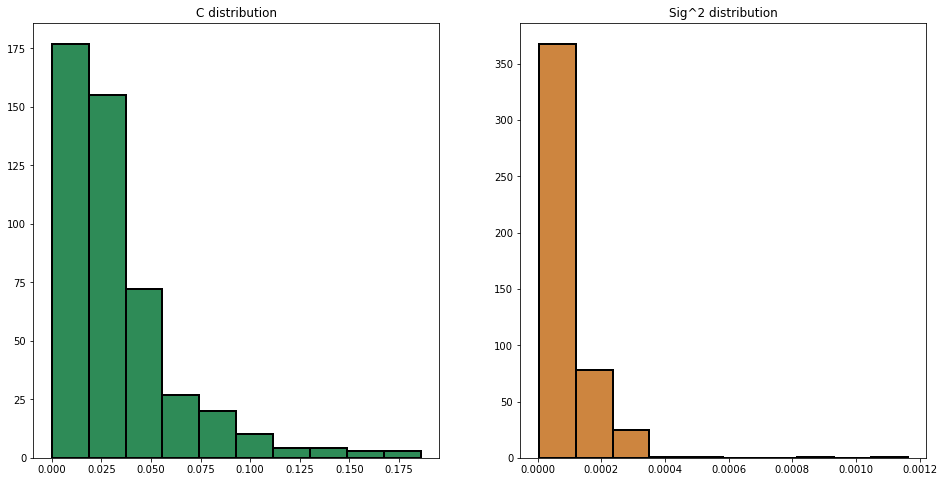

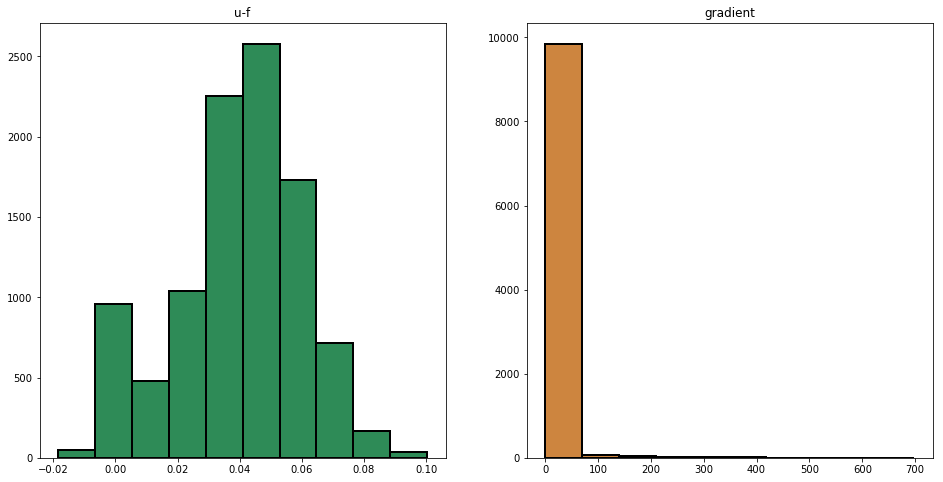

##########################################################################################
Processing 500 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 200100.
nfev: 200119

Residual stats:
Residual RMS: 0.003629404215699106
Residual Variance: 1.2914891314332188e-05
Flux Lost: 0.006849872425315783
Flux Addition: 0.004474133425299791
psi1(u-f): 0.00042719021740419776
Exceeded Pixels: 435
Sharpness: 45.78748459815056
psi2(grad u): 3.8706393318161614
Total elapsed time: 1550.6825461387634 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.016900498913684243
Mean min distance between collocation and 

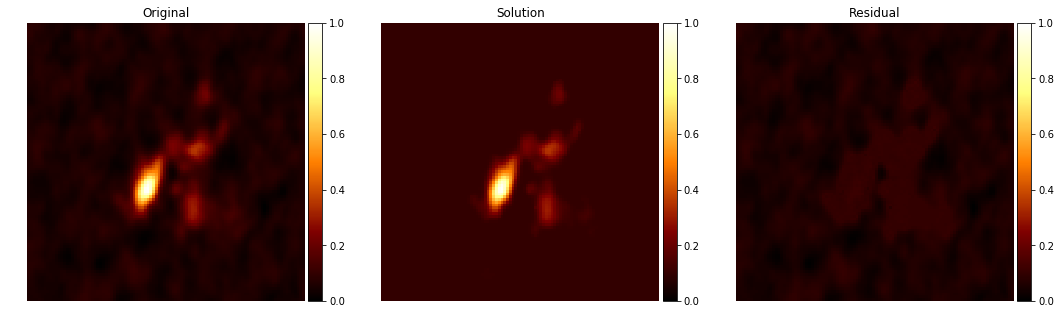

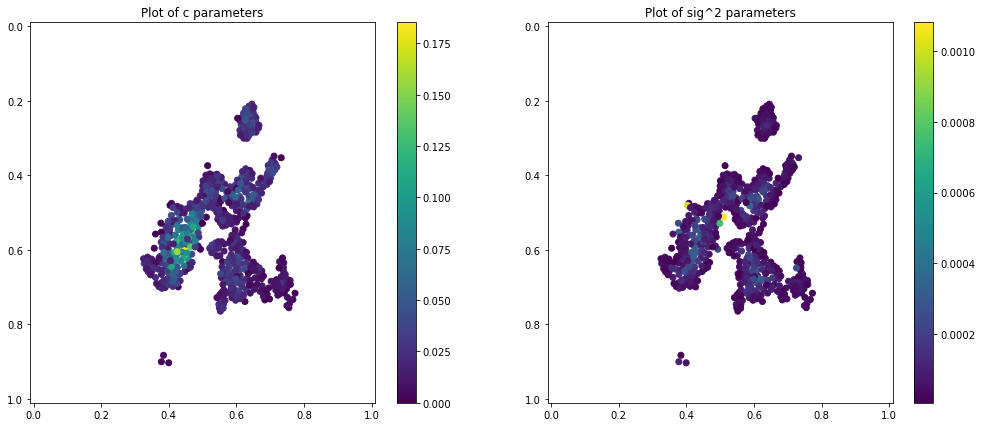

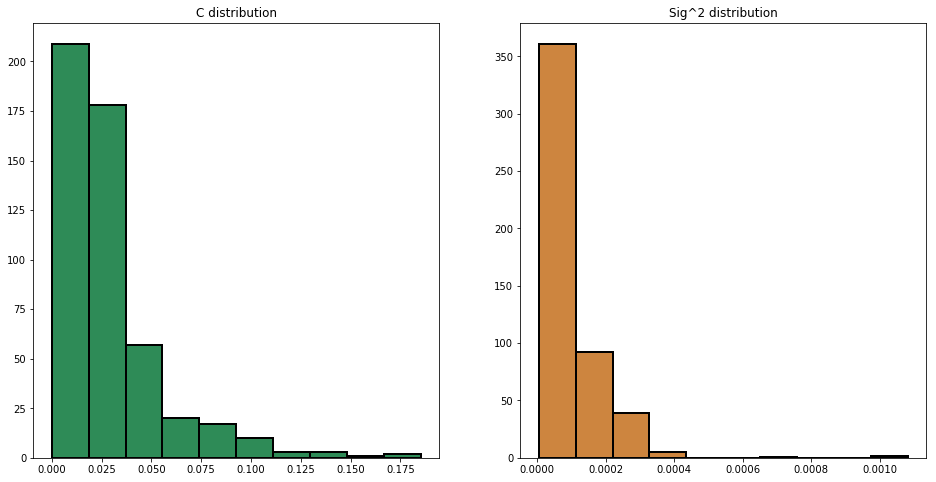

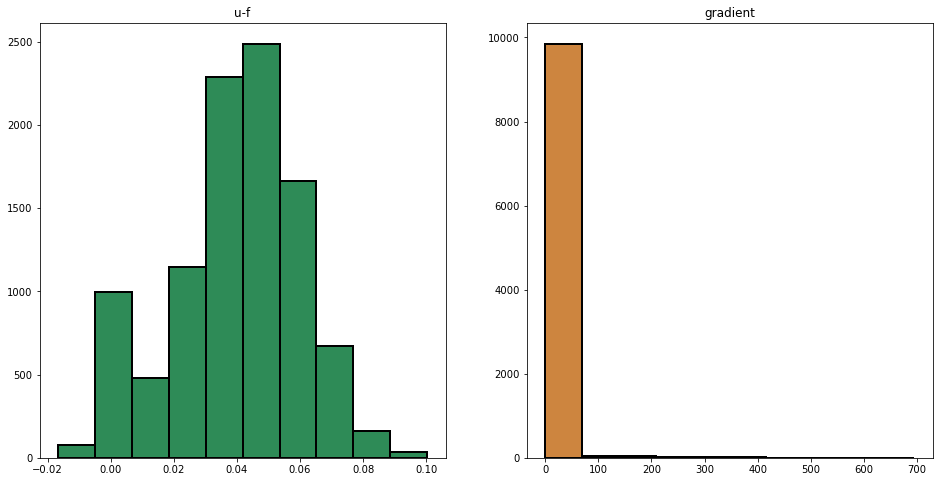

In [7]:
for elm in elm_list:
    print('#'*90)
    print('Processing {0} centers example'.format(len(elm.c)))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    # for memory reasons
    # del elm.data; del elm.mask; del elm.dfunc
    
# pickling results
target = open("../results/exp01_m{0}_orion.pkl".format(method), "wb")
pickle.dump(elm_list, target)
target.close()

## Analysis of results in `Orion KL` (`method=1`)

In [9]:
elm_list = pickle.load( open('../results/exp01_m1_orion.pkl', 'rb') )

n_center = np.array( [len(elm.c) for elm in elm_list] )
r_stats = [elm.residual_stats for elm in elm_list]
times = np.array([elm.elapsed_time for elm in elm_list])

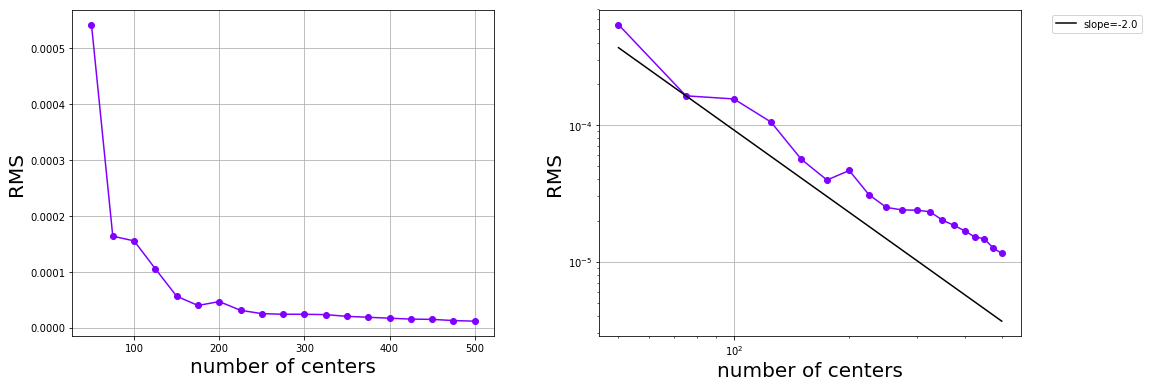

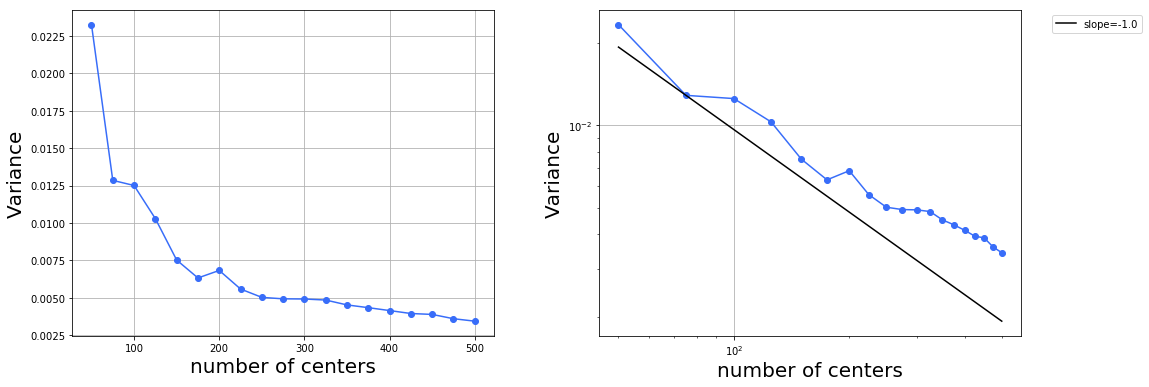

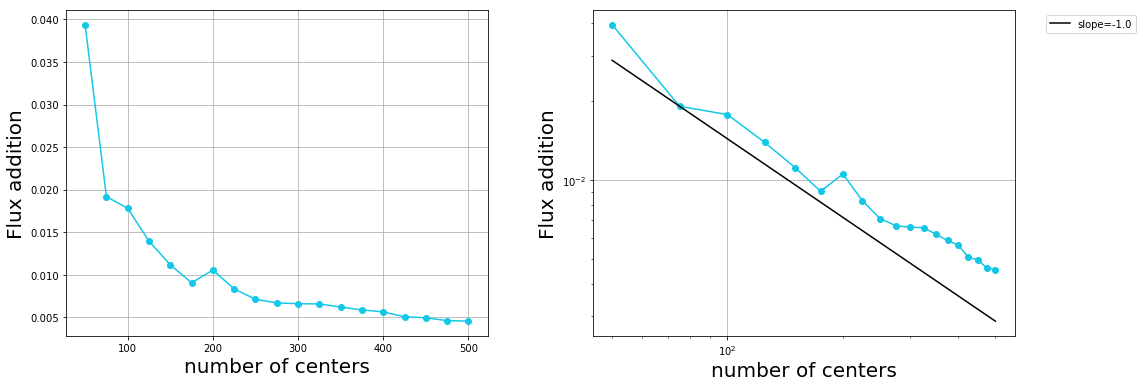

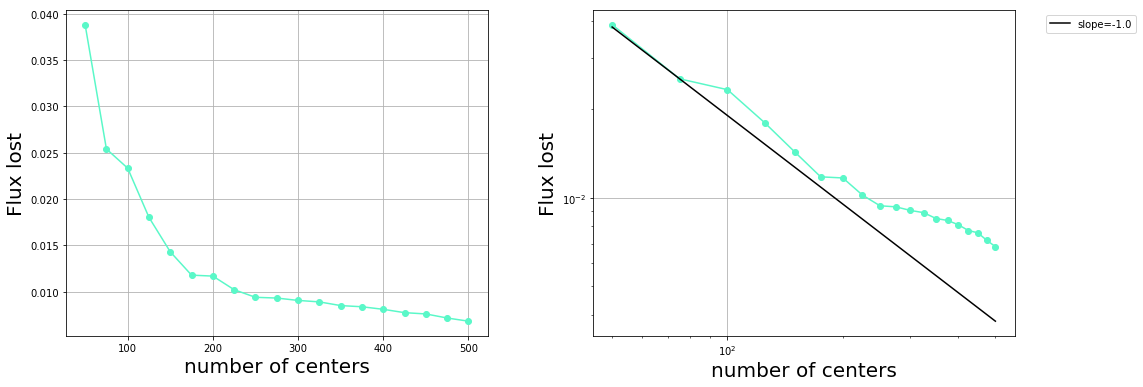

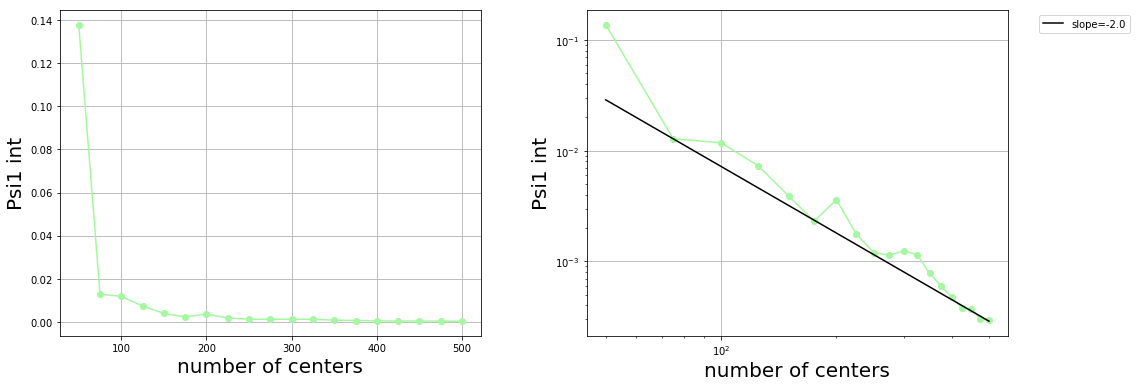

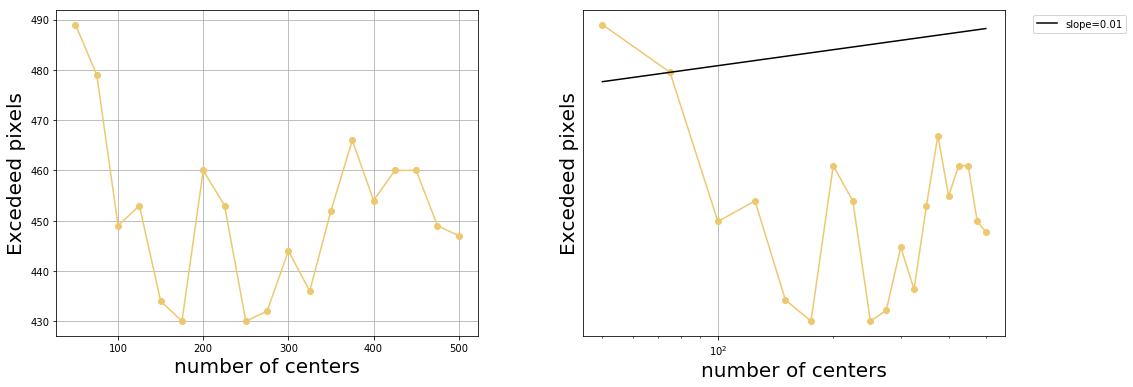

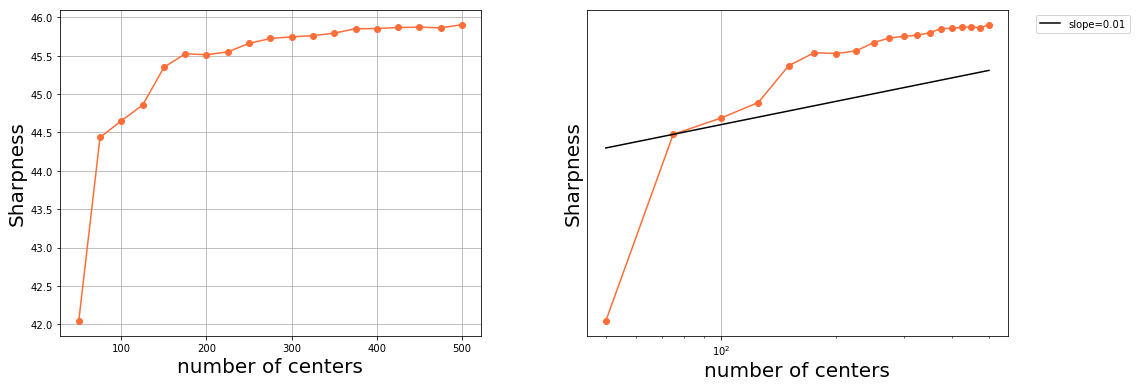

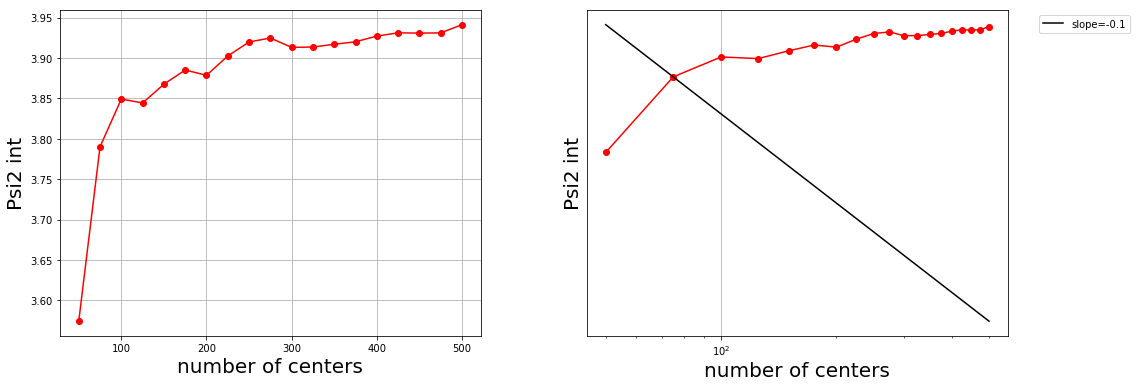

In [11]:
stats_plot(n_center, r_stats, x_label='number of centers', loglog=True, slopes=[-2.,-1.,-1.,-1.,-2.,0.01,0.01,-0.1])

## Analysis of results in `Orion KL` (`method=2`)

In [12]:
elm_list = pickle.load( open('../results/exp01_m2_orion.pkl', 'rb') ) 

n_center = np.array( [len(elm.c) for elm in elm_list] )
r_stats = [elm.residual_stats for elm in elm_list]
times = np.array([elm.elapsed_time for elm in elm_list])

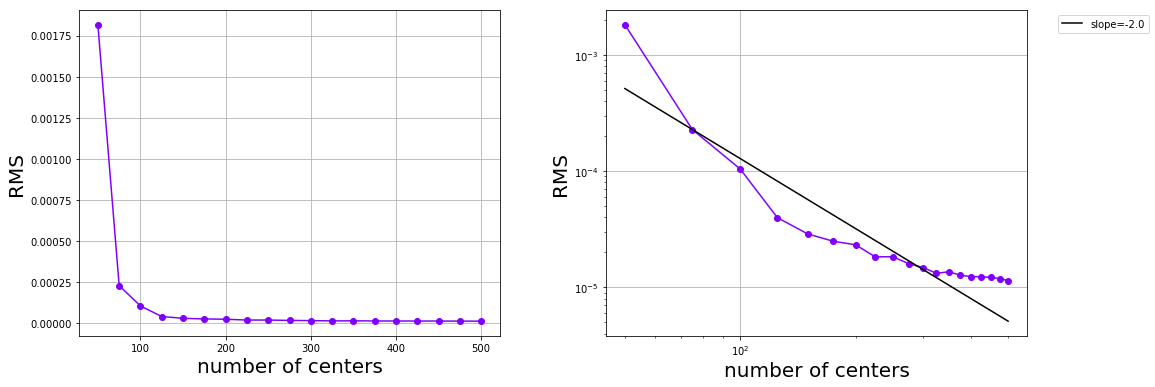

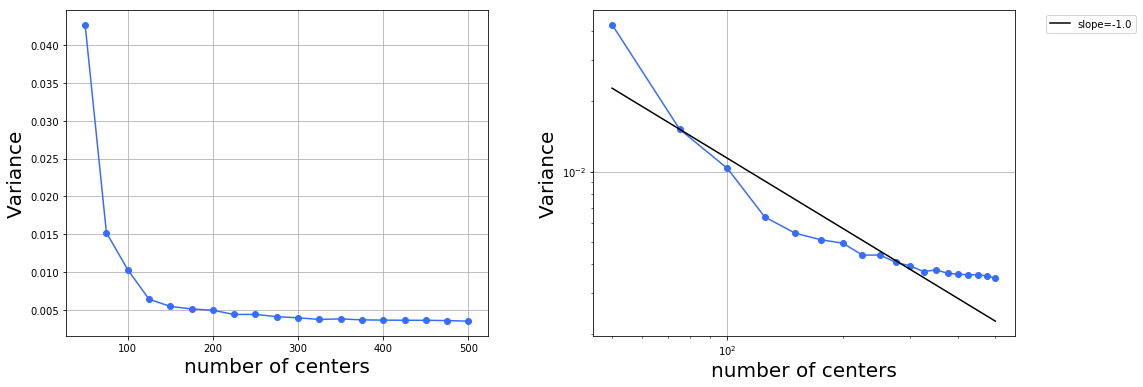

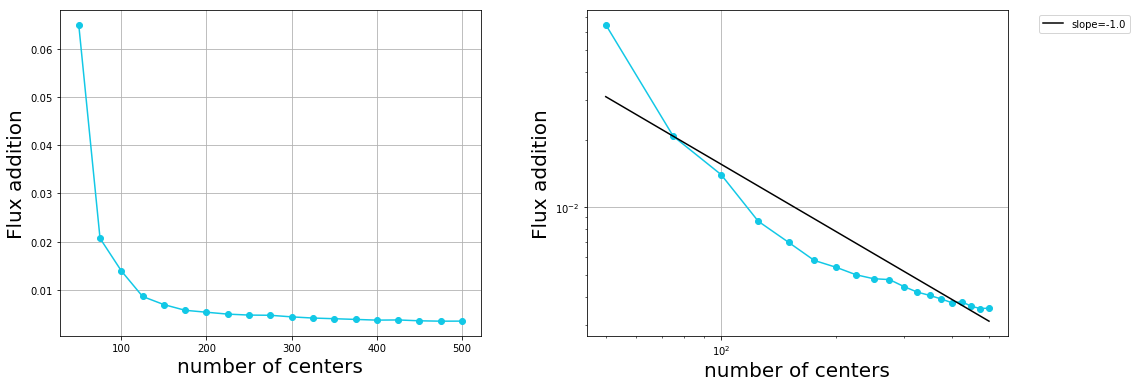

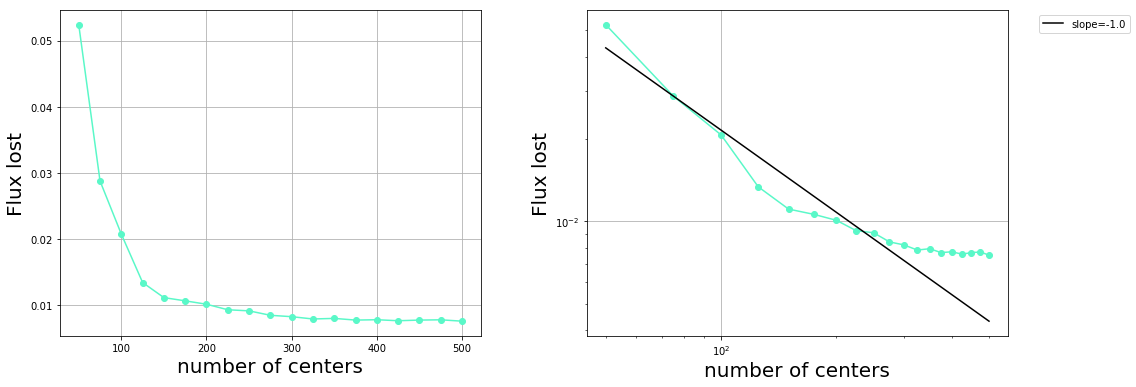

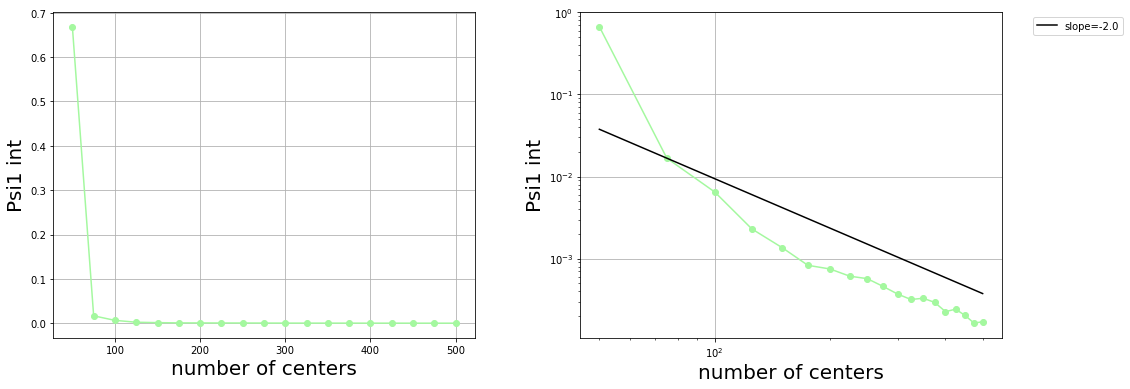

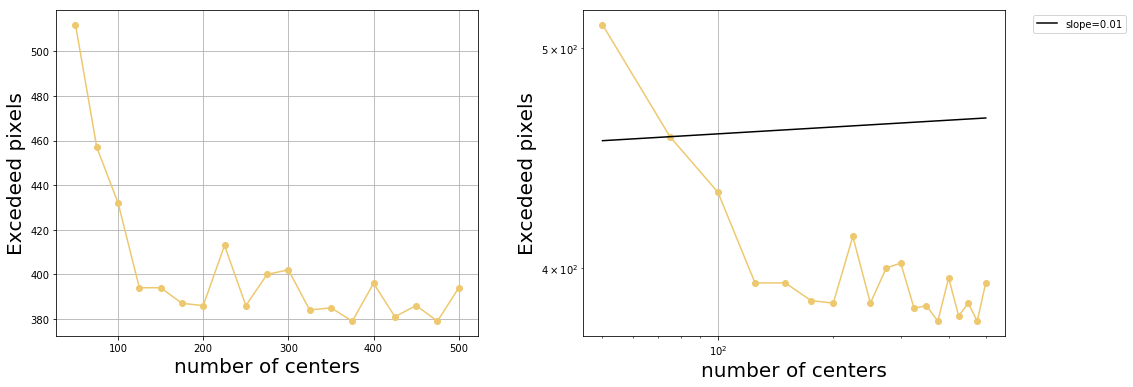

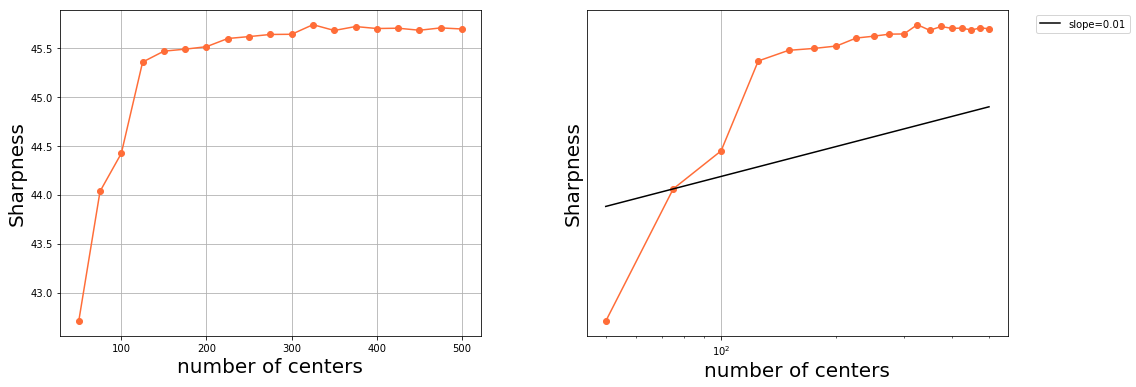

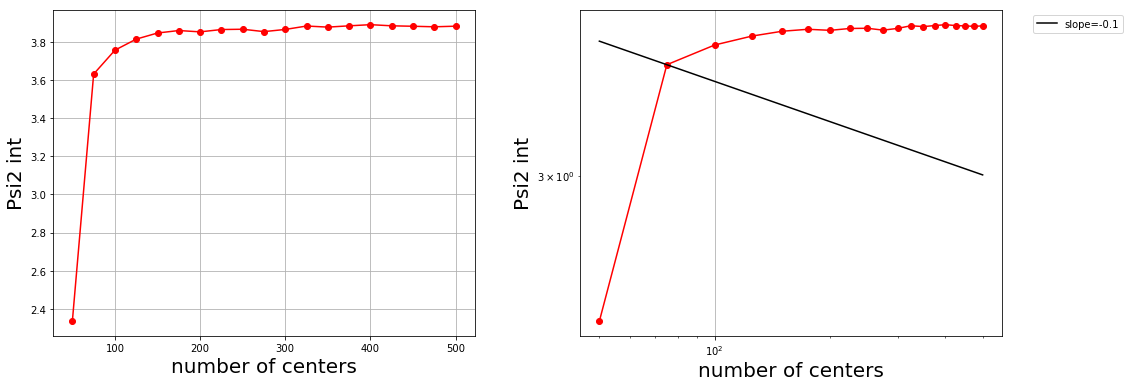

In [13]:
stats_plot(n_center, r_stats, x_label='number of centers', loglog=True, slopes=[-2.,-1.,-1.,-1.,-2.,0.01,0.01,-0.1])